In [8]:
import napari
V = napari.Viewer()
V.close()

import sys
sys.path.append(r'C:\Users\cfg001\Desktop\WTC11\NMERFISH')
from ioMicroBogdanVerified import *

In [9]:
im = read_im(r'W:\Adam\E217_WTC11_day14_Rad21new\H30_DMER_30\Conv_zscan__071.zarr')

V = napari.Viewer()
V.add_image(im)

<Image layer 'im' at 0x1f99e518d00>

In [107]:
V = napari.Viewer()

In [13]:
## map files

In [27]:
all_flds = glob.glob(r'W:\Adam\E217_WTC11_day14_Rad21new\H*DMER*')
all_flds = np.array(all_flds)[np.argsort([get_iH(fld) for fld in all_flds])]
all_flds
print(len(all_flds))
fov = 'Conv_zscan__055.zarr'
save_folder = r'W:\Adam\E217_WTC11_day14_Rad21new\AnalysisDeconvolve_CGBogdanV'
dec = decoder_simple(save_folder,fov,set_='')

51


In [28]:
read_im(all_flds[0]+os.sep+fov).shape

(4, 50, 2800, 2800)

In [29]:
fl_med = r'C:\Users\cfg001\Desktop\WTC11\flat_field\Scope4_med_col_raw3.npz'
np.load(fl_med)['im'].shape

(2800, 2800)

In [30]:
compute_drift_V2(save_folder,fov,all_flds,set_='',redo=False,gpu=True)

[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 3374, 1815]
[array([ 0.00860552,  0.94595903, -2.7236488 ], dtype=float32), array([ 0.00534791, -0.9643249 ,  2.756769  ], dtype=float32), array([-0.03901007, -0.9059396 ,  2.6514795 ], dtype=float32), 2532, 1162]
[array([ 0.04065076, -0.48237   , -3.9638631 ], dtype=float32), array([-0.03340291,  0.470358  ,  3.9714067 ], dtype=float32), array([-0.05654199,  0.50870687,  3.9473238 ], dtype=float32), 2471, 1127]
[array([-0.043995 , -4.5367346, -5.3532963], dtype=float32), array([0.03419364, 4.5370574 , 5.355096  ], dtype=float32), array([0.06497427, 4.536043  , 5.349443  ], dtype=float32), 2408, 1125]
[array([-0.04380573, -7.512654  , -4.020826  ], dtype=float32), array([0.05790199, 7.513258  , 4.030547  ], dtype=float32), array([0.01348757, 7.5113554 , 3.9999168 ], dtype=float32), 2439, 1134]
[array([-2.9006007e-03, -7.0775480e+00, -3.7445202e+00], dtype=float32), array([0.0

In [31]:
###manually check drift
if False:
    ### Check raw data
    dec = decoder_simple(save_folder,fov,set_='')
    drifts,flds,fov,fl_ref=np.load(dec.drift_fl,allow_pickle = True)
    if False:
        plt.plot([drft[0][0] for drft in drifts])
        plt.plot([drft[0][1] for drft in drifts])
        plt.plot([drft[0][2] for drft in drifts])
    from dask import array as da
    ims = [da.roll(read_im(fld+os.sep+fov)[np.newaxis],np.round(drft[0]).astype(int),axis=[-3,-2,-1]) for fld,drft in zip(tqdm(flds),drifts)]
    ims = da.concatenate(ims)
    napari.view_image(ims)

In [32]:
def run_single_fov_decoding(save_folder,fov,set_='',lib_fl = r'C:\Users\cfg001\Desktop\WTC11\codebook_AJBB_51hybe_DNA_V2_blank.csv',redo=False):
    dec = decoder_simple(save_folder,fov,set_=set_)
    if not os.path.exists(dec.decoded_fl) or redo:
        dec.get_XH(dec.fov,set_,ncols=3,nbits=51,th_h=5000,filter_tag = '')#number of colors match 
        dec.XH = dec.XH[dec.XH[:,-4]>0.25] ### keep the spots that are correlated with the expected PSF for 60X
        dec.load_library(lib_fl,nblanks=-1)
        dec.ncols = 3
        get_intersV2(dec,nmin_bits=3,dinstance_th=2,enforce_color=True,enforce_set=17*3,redo=False)
        get_icodesV3(dec,nmin_bits=3,iH=-3) ### saves a decoded....npz
        print("Decoding completed for {}.".format(dec.fov))

In [33]:
run_single_fov_decoding(save_folder,fov,set_='',lib_fl = r'C:\Users\cfg001\Desktop\WTC11\codebook_AJBB_51hybe_DNA_V2_blank.csv',redo=False)
#run_single_fov_decoding(save_folder,fov,set_='',lib_fl = r'C:\Users\cfg001\Desktop\WTC11\Adam_exons_1_27_2024_withBlank.csv',redo=False)
#run_single_fov_decoding(save_folder,fov,set_='',lib_fl = r'C:\Users\cfg001\Desktop\WTC11\Adam_introns_1_27_2024_withBlank.csv',redo=False)

  0%|                                                                                        | 0/51 [00:00<?, ?it/s]

(49266, 8)
(70957, 8)


  2%|█▌                                                                              | 1/51 [00:04<03:26,  4.14s/it]

(164180, 8)
(48778, 8)
(71607, 8)


  4%|███▏                                                                            | 2/51 [00:18<08:18, 10.18s/it]

(74480, 8)
(42549, 8)
(74579, 8)


  6%|████▋                                                                           | 3/51 [00:25<06:53,  8.61s/it]

(84488, 8)
(36404, 8)
(71232, 8)


  8%|██████▎                                                                         | 4/51 [00:28<05:06,  6.52s/it]

(66551, 8)
(35292, 8)
(67205, 8)


 10%|███████▊                                                                        | 5/51 [00:31<04:03,  5.29s/it]

(64150, 8)
(42087, 8)
(80840, 8)


 12%|█████████▍                                                                      | 6/51 [00:34<03:17,  4.40s/it]

(170269, 8)
(34257, 8)
(68052, 8)


 14%|██████████▉                                                                     | 7/51 [00:39<03:18,  4.50s/it]

(76420, 8)
(35036, 8)
(62123, 8)


 16%|████████████▌                                                                   | 8/51 [00:46<03:59,  5.57s/it]

(100529, 8)
(50565, 8)
(69600, 8)


 18%|██████████████                                                                  | 9/51 [00:55<04:28,  6.38s/it]

(148860, 8)
(54115, 8)
(61239, 8)


 20%|███████████████▍                                                               | 10/51 [00:59<04:02,  5.91s/it]

(88831, 8)
(23290, 8)
(48716, 8)


 22%|█████████████████                                                              | 11/51 [01:03<03:31,  5.28s/it]

(129218, 8)
(31094, 8)
(56701, 8)


 24%|██████████████████▌                                                            | 12/51 [01:07<03:10,  4.89s/it]

(87759, 8)
(29519, 8)
(53822, 8)


 25%|████████████████████▏                                                          | 13/51 [01:16<03:47,  5.99s/it]

(48953, 8)
(35468, 8)
(56322, 8)


 27%|█████████████████████▋                                                         | 14/51 [01:24<04:03,  6.57s/it]

(59231, 8)
(36701, 8)
(50463, 8)


 29%|███████████████████████▏                                                       | 15/51 [01:28<03:34,  5.95s/it]

(55688, 8)
(24010, 8)
(43515, 8)


 31%|████████████████████████▊                                                      | 16/51 [01:32<03:01,  5.18s/it]

(54476, 8)
(22221, 8)
(46219, 8)


 33%|██████████████████████████▎                                                    | 17/51 [01:35<02:38,  4.66s/it]

(54901, 8)
(19191, 8)
(48086, 8)


 35%|███████████████████████████▉                                                   | 18/51 [01:45<03:25,  6.24s/it]

(54834, 8)
(11679, 8)
(26147, 8)


 37%|█████████████████████████████▍                                                 | 19/51 [01:52<03:26,  6.47s/it]

(37923, 8)
(15502, 8)
(34754, 8)


 39%|██████████████████████████████▉                                                | 20/51 [01:55<02:50,  5.50s/it]

(34516, 8)
(12104, 8)
(43639, 8)


 41%|████████████████████████████████▌                                              | 21/51 [01:58<02:23,  4.77s/it]

(42091, 8)
(11073, 8)
(48387, 8)


 43%|██████████████████████████████████                                             | 22/51 [02:01<01:55,  4.00s/it]

(36839, 8)
(13122, 8)
(51224, 8)


 45%|███████████████████████████████████▋                                           | 23/51 [02:03<01:37,  3.47s/it]

(49744, 8)
(12600, 8)
(47249, 8)


 47%|█████████████████████████████████████▏                                         | 24/51 [02:08<01:46,  3.96s/it]

(43652, 8)
(14663, 8)
(55205, 8)


 49%|██████████████████████████████████████▋                                        | 25/51 [02:16<02:16,  5.24s/it]

(55840, 8)
(13223, 8)
(47846, 8)


 51%|████████████████████████████████████████▎                                      | 26/51 [02:23<02:21,  5.66s/it]

(46176, 8)
(8360, 8)
(36961, 8)


 53%|█████████████████████████████████████████▊                                     | 27/51 [02:25<01:54,  4.76s/it]

(34958, 8)
(9210, 8)
(38052, 8)


 55%|███████████████████████████████████████████▎                                   | 28/51 [02:29<01:39,  4.31s/it]

(36540, 8)
(7548, 8)
(35406, 8)


 57%|████████████████████████████████████████████▉                                  | 29/51 [02:31<01:23,  3.77s/it]

(33138, 8)
(6573, 8)
(30530, 8)


 59%|██████████████████████████████████████████████▍                                | 30/51 [02:33<01:08,  3.26s/it]

(25049, 8)
(5701, 8)
(36965, 8)


 61%|████████████████████████████████████████████████                               | 31/51 [02:36<01:00,  3.02s/it]

(42638, 8)
(10121, 8)
(44293, 8)


 63%|█████████████████████████████████████████████████▌                             | 32/51 [02:42<01:15,  3.98s/it]

(39357, 8)
(7410, 8)
(32380, 8)


 65%|███████████████████████████████████████████████████                            | 33/51 [02:49<01:27,  4.87s/it]

(35802, 8)
(4065, 8)
(23288, 8)


 67%|████████████████████████████████████████████████████▋                          | 34/51 [02:50<01:05,  3.87s/it]

(28345, 8)
(509, 8)
(3914, 8)


 69%|██████████████████████████████████████████████████████▏                        | 35/51 [02:53<00:54,  3.41s/it]

(4186, 8)
(673, 8)
(3274, 8)


 71%|███████████████████████████████████████████████████████▊                       | 36/51 [02:55<00:44,  2.93s/it]

(4234, 8)
(2487, 8)
(12854, 8)


 73%|█████████████████████████████████████████████████████████▎                     | 37/51 [02:57<00:40,  2.86s/it]

(7020, 8)
(2840, 8)
(12723, 8)


 75%|██████████████████████████████████████████████████████████▊                    | 38/51 [02:58<00:29,  2.31s/it]

(18680, 8)
(1459, 8)
(6169, 8)


 76%|████████████████████████████████████████████████████████████▍                  | 39/51 [03:00<00:24,  2.04s/it]

(6142, 8)
(1355, 8)
(5531, 8)


 78%|█████████████████████████████████████████████████████████████▉                 | 40/51 [03:04<00:31,  2.83s/it]

(7004, 8)
(1848, 8)
(9035, 8)


 80%|███████████████████████████████████████████████████████████████▌               | 41/51 [03:10<00:36,  3.63s/it]

(8970, 8)
(1938, 8)
(6194, 8)


 82%|█████████████████████████████████████████████████████████████████              | 42/51 [03:15<00:36,  4.09s/it]

(9299, 8)
(2309, 8)
(14842, 8)


 84%|██████████████████████████████████████████████████████████████████▌            | 43/51 [03:17<00:28,  3.58s/it]

(11934, 8)
(3897, 8)


 86%|████████████████████████████████████████████████████████████████████▏          | 44/51 [03:19<00:19,  2.83s/it]

(14051, 8)
(19091, 8)
(2167, 8)
(12998, 8)


 88%|█████████████████████████████████████████████████████████████████████▋         | 45/51 [03:21<00:17,  2.84s/it]

(14158, 8)
(1656, 8)
(5886, 8)


 90%|███████████████████████████████████████████████████████████████████████▎       | 46/51 [03:23<00:11,  2.38s/it]

(10426, 8)
(1399, 8)
(5749, 8)


 92%|████████████████████████████████████████████████████████████████████████▊      | 47/51 [03:25<00:09,  2.36s/it]

(6802, 8)
(2463, 8)
(12192, 8)


 94%|██████████████████████████████████████████████████████████████████████████▎    | 48/51 [03:26<00:05,  1.99s/it]

(14693, 8)
(2700, 8)
(11737, 8)


 96%|███████████████████████████████████████████████████████████████████████████▉   | 49/51 [03:29<00:04,  2.14s/it]

(11170, 8)
(5588, 8)
(19986, 8)


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 50/51 [03:35<00:03,  3.30s/it]

(24214, 8)
(1447, 8)
(12700, 8)


100%|███████████████████████████████████████████████████████████████████████████████| 51/51 [03:39<00:00,  4.31s/it]

(9331, 8)



100%|█████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.59s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: W:\Adam\E217_WTC11_day14_Rad21new\AnalysisDeconvolve_CGBogdanV\resNew_Conv_zscan__055--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 0.39108800888061523
Computing score...
Total time computing score: 0.04201006889343262
Computing sorting...
Total time sorting molecules by score: 0.750169038772583
Finding best bits per molecules...
Finding best code...


100%|█████████████████████████████████████████████████████████████████████████████| 165/165 [00:04<00:00, 39.68it/s]


Total time best bits per molecule: 22.7548508644104
Decoding completed for Conv_zscan__055.zarr.


In [34]:
def get_score_withRef(dec,scoresRef,plt_val=False,gene=None,iSs=None,th_min=-np.inf,include_dbits=False):
    H = np.nanmedian(dec.XH_pruned[...,-3],axis=1)
    D = dec.XH_pruned[...,:3]-np.nanmean(dec.XH_pruned[...,:3],axis=1)[:,np.newaxis]
    D = np.nanmean(np.linalg.norm(D,axis=-1),axis=-1)
    if include_dbits:
        db = dec.dist_best
        score = np.array([H,-D,-db]).T
    else:
        score = np.array([H,-D]).T
    
    keep_color = [np.nanmedian(dec.XH_pruned[:,:,-2],axis=1)==icol for icol in np.arange(dec.ncols)]
    scoreA = np.zeros(len(H))
    for icol in range(dec.ncols):
        scoresRef_ = scoresRef[icol]
        score_ = score[keep_color[icol]]
        from scipy.spatial import KDTree
        scoreA_ = np.zeros(len(score_))
        if iSs is None: iSs = np.arange(scoresRef_.shape[-1])
        for iS in iSs:
            dist_,inds_ = KDTree(scoresRef_[:,[iS]]).query(score_[:,[iS]],workers=20)
            scoreA_+=np.log((inds_+1))-np.log(len(scoresRef_))
        scoreA[keep_color[icol]]=scoreA_
    dec.scoreA =scoreA
    if plt_val:
        bad_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' in gn.lower()]
        good_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' not in gn.lower()]
        is_good_gn = np.in1d(dec.icodesN,good_igns)
        
        plt.figure()
        kp = scoreA>th_min
        plt.hist(scoreA[(is_good_gn)&kp],density=True,bins=100,alpha=0.5,label='all genes')
        if gene is not None:
            is_gn = dec.icodesN==(list(dec.gns_names).index(gene))
            plt.hist(scoreA[(is_gn)&kp],density=True,bins=100,alpha=0.5,label=gene)
        plt.hist(scoreA[(~is_good_gn)&kp],density=True,bins=100,alpha=0.5,label='blanks');
        plt.legend()

### build the reference if we do not already have one - ONE PER MODALITY OF THE DATA

W:\Adam\E217_WTC11_day14_Rad21new\AnalysisDeconvolve_CGBogdanV\decodedNew_Conv_zscan__155--.npz
Loaded decoded: -0.8201837539672852


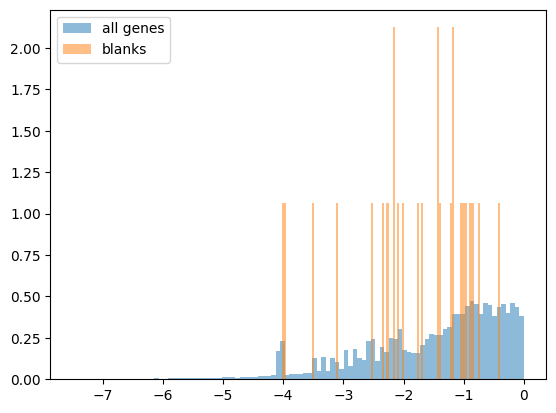

In [35]:
dec = decoder_simple(save_folder,'Conv_zscan__155.zarr',"")
print(dec.decoded_fl)
dec.ncols = 3
dec.load_decoded()
dec.dist_best = np.load(dec.decoded_fl)['dist_best'] #distance to the scores
scoresRef = get_score_per_color(dec,include_dbits=False)
#scoresRef = pickle.load(open(scores_ref_fl,'rb'))
dec.dist_best = np.load(dec.decoded_fl)['dist_best']
get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs = None,th_min=-7.5,include_dbits=False)

#apply_flat_field(dec,tag='Scope4_med_col_raw')
#dec.save_folder= save_folder
#scoresRefT = get_score_per_color(dec)

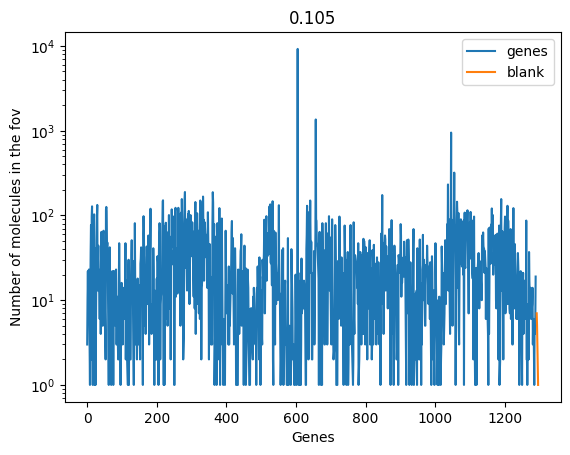

In [36]:
dec.th=-1.5
plot_statistics(dec)

In [37]:
dec.gns_names[dec.icodesN]

array(['chr8_144292244_144677239_0007_10kb__bcm_26478__Stv82',
       'chr12_75004739_75484764_0018_10kb__bcm_22384__Stv82',
       'chr12_75004739_75484764_0018_10kb__bcm_22384__Stv82', ...,
       'chr9_37910438_38580724_0011_10kb__bcm_27089__Stv79',
       'chr9_37910438_38580724_0011_10kb__bcm_27089__Stv79',
       'chr9_37910438_38580724_0011_10kb__bcm_27089__Stv79'], dtype='<U52')

In [38]:
#??plot_statistics
# Plot the top genes, sorted by expression in the given FOV
icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
dec.gns_names[icds[np.argsort(ncds)[::-1]]]

array(['chr2_185057219_185537559_0026_10kb__bcm_24507__Stv79',
       'chr2_28976364_29446381_0031_10kb__bcm_24718__Stv82',
       'chr8_144292244_144677239_0018_10kb__bcm_26517__Stv79', ...,
       'chr12_75004739_75484764_0048_10kb__bcm_22517__Stv1',
       'chr2_185057219_185537559_0023_10kb__bcm_24503__Stv79',
       'blank0006'], dtype='<U52')

### Save the ScoresRef file if we do not already possess one for the modality.

In [26]:
scores_ref_fl = save_folder+os.sep+r'scoresRef.pkl'
pickle.dump(scoresRef,open(scores_ref_fl,'wb'))
print(scores_ref_fl)

W:\Adam\E217_WTC11_day14_Rad21new\AnalysisDeconvolve_CGBogdanV\scoresRef.pkl


In [36]:
plot_multigenes(dec,
    genes=['EEF2', 'MAP2','FLT1','CHAT','NNAT'],
    colors=['r', 'g', 'b', 'm', 'c', 'y', 'w'],
    smin=7,
    smax=10,
    viewer=None,
    drift=[0, 0, 0],
    resc=[1, 1, 1],
)

C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1875: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1898: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1875: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1898: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(


Viewer(camera=Camera(center=(0.0, 255.5, 255.5), zoom=0.9438151041666665, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(254.5, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((-0.5, 511.5, 1.0), (-0.5, 511.5, 1.0), (-0.5, 511.5, 1.0)), current_step=(255, 255, 255), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Points layer 'EEF2' at 0x295de9df040>, <Points layer 'MAP2' at 0x295debdc790>, <Points layer 'FLT1' at 0x295e062f460>, <Points layer 'CHAT' at 0x295ded99a30>, <Points layer 'NNAT' at 0x295e04a6940>], help='use <5> for transform, use <2> for add points, use <3> for select points', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_c

C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1875: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1898: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1875: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1898: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1875: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\cfg001\.conda\envs\napari-env\lib\site-packages\napari\layers\points\points.py:1898: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\Users\cfg001\

In [26]:
dec.gns_names

array(['ABHD17A', 'ACHE', 'ADAM11', 'ADAMTSL5', 'ADAT3', 'ADCK5', 'AGAP6',
       'AIF1L', 'ALDH1B1', 'ALDOC', 'ALK', 'ANKRD18A', 'ANKRD24', 'ANO5',
       'ANTXR2', 'APBA3', 'APC2', 'ARHGAP39', 'ATCAY', 'ATP5F1D',
       'ATP8B3', 'ATP9A', 'AURKA', 'BLCAP', 'BOP1', 'BTBD2', 'C10orf53',
       'C19orf25', 'C1orf53', 'C20orf194', 'C5orf47', 'C8orf82', 'CACNG4',
       'CALD1', 'CAPN6', 'CAPS2', 'CBARP', 'CCDC179', 'CCNA2', 'CCNB2',
       'CCNE1', 'CCNE2', 'CCNF', 'CD22', 'CDH3', 'CDK1', 'CEP19',
       'CFAP299', 'CHAT', 'CHGB', 'CHRNA3', 'CIRBP', 'CLIP4', 'CNN2',
       'CNR1', 'CNTN1', 'CPEB4', 'CPSF1', 'CREB3L3', 'CSMD3', 'CSNK1G2',
       'CTNNA2', 'CTNNBL1', 'CTSC', 'CYC1', 'CYP11B2', 'DAPK3', 'DAZAP1',
       'DCX', 'DENND1B', 'DGAT1', 'DMKN', 'DNMT3B', 'DPPA4', 'DRGX',
       'DSG2', 'EBI3', 'ECT2', 'EEF1D', 'EEF2', 'EFNA2', 'EPB41L1',
       'EPCAM', 'ERCC6', 'EXOSC4', 'FAM174C', 'FAM187B', 'FANCF', 'FBXL6',
       'FBXO45', 'FFAR1', 'FFAR2', 'FFAR3', 'FGF5', 'FLT1', 'FOXH1',
 

In [68]:
def fov_to_dapi_features(fov='Conv_zscan__010',save_folder_ref=r'\\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed',
                         save_folder=r'\\merfish10.ucsd.edu\volume1\RNA_ANALYSIS_D111',tag_new='H1_RMER_Q1',tag_ref = 'H1_DMER_1'):
    fov_ = fov.replace('.zarr','')
    fl = save_folder+os.sep+fov_+'--'+tag_new+'--dapiFeatures.npz'
    fl_ref = save_folder_ref+os.sep+fov_+'--'+tag_ref+'--dapiFeatures.npz'
    return fl,fl_ref
def load_segmentation(dec,segmentation_folder = r'\\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation',segm_tag='H1_DMER_1'):
    fl_segm = segmentation_folder+os.sep+dec.fov.replace('.zarr','')+'--'+segm_tag+'--CYTO_segm.npz'
    segm,shape = np.load(fl_segm)['segm'],np.load(fl_segm)['shape']
    #segm_ = resize(segm,shape)
    dec.im_segm_ = segm
    dec.shape=shape
    dec.segm_tag=segm_tag
def get_dic_drift(dec):
    drifts,flds,fov_,fl_ref = np.load(dec.drift_fl,allow_pickle=True)
    return {os.path.basename(fld):drft[0] for drft,fld in zip(drifts,flds)}
def main_f_fov(save_folder =r'\\merfish10.ucsd.edu\volume1\RNA_ANALYSIS_D111',fov='Conv_zscan__050',set_ = '',ncols=3,
          scores_ref_fl=r'\\merfish10.ucsd.edu\volume1\RNA_ANALYSIS_D111\scoresRefV2.pkl',th=-1.5,force=False,segm_tag='H1_DMER_1',tag_new='H1_RMER_Q1'):
    save_fld_cell = os.path.dirname(save_folder)+os.sep+'best_AdamExonsNew'
    if not os.path.exists(save_fld_cell): os.makedirs(save_fld_cell)
    save_fl = save_fld_cell+os.sep+fov+'__XHfs_finedrft.npz'
    if not os.path.exists(save_fl) or force:
        dec = decoder_simple(save_folder,fov,set_)
        print(dec.decoded_fl)
        dec.ncols = ncols
        dec.load_decoded()
        print(dec.decoded_fl)
        dec.save_fl=save_fl
        #apply_fine_drift(dec,plt_val=True)
        #dec.save_folder= r'C:\Users\cfg001\Desktop\WTC11\flat_field'
        #apply_flat_field(dec,tag='Scope4_med_col_raw')
        #dec.save_folder= save_folder
        #scoresRefT = get_score_per_color(dec)
        scoresRefT = pickle.load(open(scores_ref_fl,'rb'))
        dec.dist_best = np.load(dec.decoded_fl)['dist_best']
        get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None,th_min=-7.5,include_dbits=True)
        dec.th=th
        plot_statistics(dec)
        
        #threshold the combined EM score
        keep = dec.scoreA>dec.th
        dec.XH_prunedf,dec.icodesNf=dec.XH_pruned[keep],dec.icodesN[keep]
        nbits = dec.XH_prunedf.shape[1]
        dec.XH_prunedF = np.concatenate([dec.XH_prunedf,np.repeat(dec.icodesNf,nbits).reshape(-1,nbits)[:,:,np.newaxis]],axis=-1)
        ### get the drift - to correct to the segmentation space
        dec.dic_drift = get_dic_drift(dec)
        
        load_segmentation(dec)
        dec.im_segm_ = expand_segmentation(dec.im_segm_, nexpand=5)
        
        ### Compute drift between the segmentation file and the reference drift file
        fl,fl_ref = fov_to_dapi_features(tag_new=tag_new,tag_ref=segm_tag)
        txyz_segm = get_best_translation_points_dapiFeat(fl,fl_ref,resc=5,th=5)[0]
        tzxy_seg = -txyz_segm#dec.dic_drift[dec.segm_tag] #np.round([dic_drift[key][0] for key in dic_drift if cp.segm_tag in key]).astype(int)
        ### Augment the fitting data with cell id
        resc = dec.im_segm_.shape/dec.shape
        XH_ = dec.XH_prunedF.copy()
        XH_[:,:,:3] = XH_[:,:,:3]-tzxy_seg ### bring fits to cell segmentation space - modified to -
        XC = (np.nanmean(XH_[:,:,:3],axis=1)*resc).astype(int) #rescale to segmentation size
        dec.XC = XC
        keep = np.all(XC>=0,axis=-1)&np.all(XC<dec.im_segm_.shape,axis=-1)
        icells = np.zeros(len(XC))
        icells[keep]=dec.im_segm_[tuple(XC[keep].T)]
        nbits = XH_.shape[1]
        icells = np.repeat(icells,nbits).reshape(-1,nbits)[:,:,np.newaxis]
        XH_f = np.concatenate([XH_,icells],axis=-1)
        dec.XH_f=XH_f
        #XH_fs=keep_best_per_cell_fast(XH_f,nbest=20)
        cell_ids,vols = np.unique(dec.im_segm_,return_counts=True)
        np.savez(dec.save_fl,XH_fs=XH_f)
        return dec


\\merfish10.ucsd.edu\volume1\RNA_ANALYSIS_D111\decodedNew_Conv_zscan__200--.npz
Loaded decoded: -9.625359058380127
\\merfish10.ucsd.edu\volume1\RNA_ANALYSIS_D111\decodedNew_Conv_zscan__200--.npz


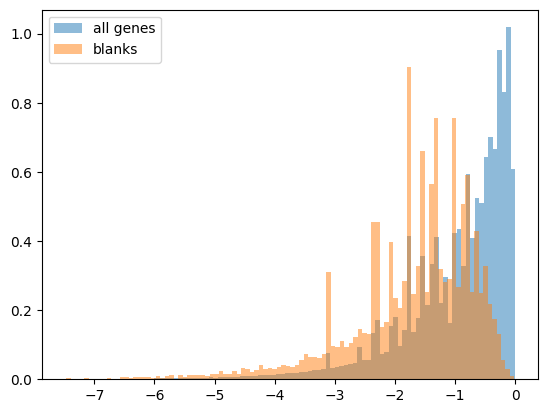

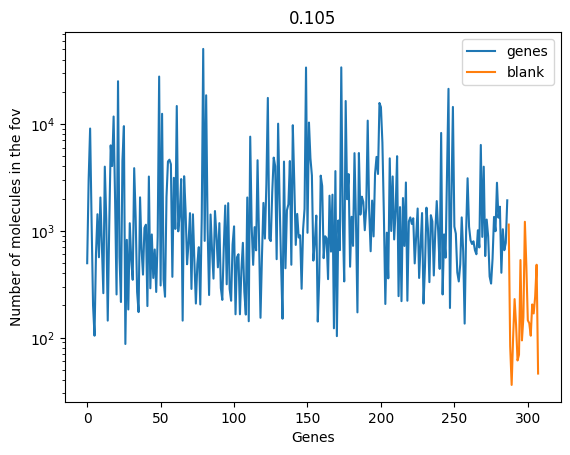

In [72]:
dec = main_f_fov(fov='Conv_zscan__200.zarr',force=True)


\\merfish10.ucsd.edu\volume1\RNA_ANALYSIS_D111\decodedNew_Conv_zscan__104--.npz
Loaded decoded: -4.230020999908447


True

In [60]:
scores_ref_fl=r'\\merfish10.ucsd.edu\volume1\RNA_ANALYSIS_D111\scoresRef.pkl'
scoresRefT = pickle.load(open(scores_ref_fl,'rb'))

In [65]:
scoresRefT = get_score_per_color(dec)

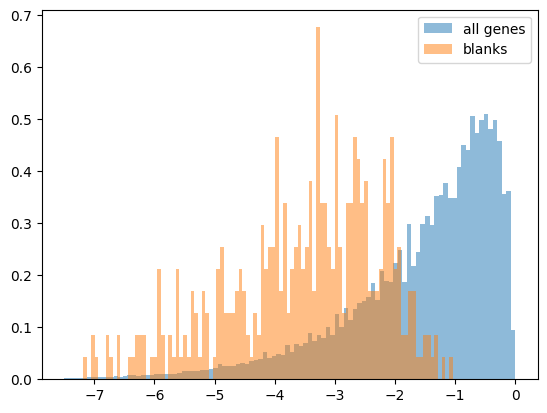

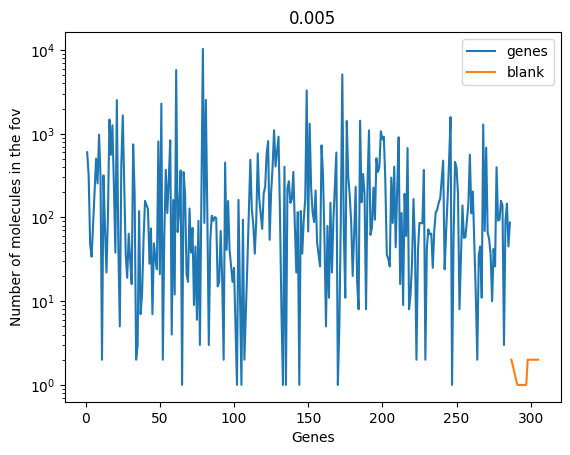

In [61]:

th=-1.5

dec.dist_best = np.load(dec.decoded_fl)['dist_best']
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None,th_min=-7.5,include_dbits=True)
dec.th=th
plot_statistics(dec)

In [71]:
plot_multigenes(dec,genes=['EEF2'],colors=['r','g','b','m','c','y','w'],smin=3,smax=10,viewer = None,
                    drift=[0,0,0],resc=[1,1,1]);

C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1784: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1807: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1784: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1807: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1784: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1807: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\U

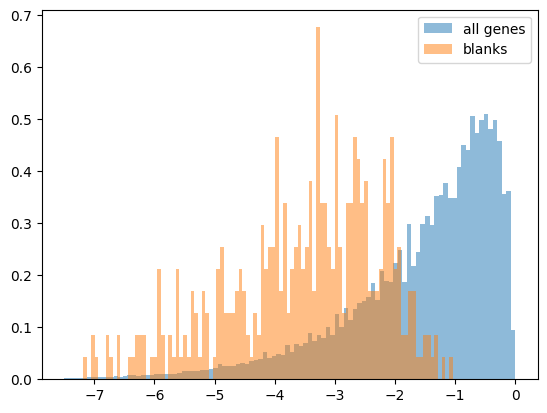

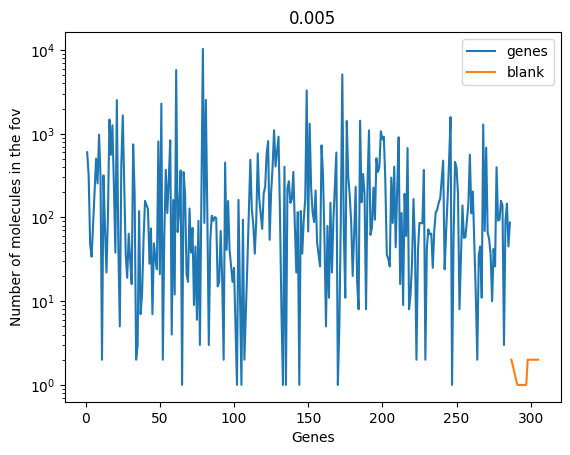

In [53]:

th=-1.5

dec.dist_best = np.load(dec.decoded_fl)['dist_best']
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None,th_min=-7.5,include_dbits=True)
dec.th=th
plot_statistics(dec)

In [26]:
V = napari.view_points(dec.XC,size=2)
V.add_labels(dec.im_segm_);

In [59]:
np.sum(dec.scoreA>-1.5)

194875

In [62]:
np.sum(dec.scoreA>-1.5)

86532

In [ ]:
igenes = dec.XH_f[:,0,-2]
igenes = dec.XH_f[:,0,-2]


In [37]:
np.save('D111_exon_gene_names.npy',dec.gns_names)

In [66]:
def get_dic_drift(dec):
    drifts,flds,fov_,fl_ref = np.load(dec.drift_fl,allow_pickle=True)
    return {os.path.basename(fld):drft[0] for drft,fld in zip(drifts,flds)}
get_dic_drift(dec)

{'H1_RMER_Q1': array([-0., -0., -0.], dtype=float32),
 'H2_RMER_Q2': array([-0.13116789, -1.9775532 , -0.4315123 ], dtype=float32),
 'H3_RMER_Q3': array([-0.19658843, -9.288887  , -4.1483564 ], dtype=float32),
 'H4_RMER_Q4': array([ 0.07555107,  5.9848204 , -7.6587596 ], dtype=float32),
 'H5_RMER_Q5': array([ 0.08629265, -1.8775322 , -8.684439  ], dtype=float32),
 'H6_RMER_Q6': array([-1.5651521e-03,  4.7867041e+00, -8.3693514e+00], dtype=float32),
 'H7_RMER_Q7': array([ 0.0135591 , -0.64896923, -6.971475  ], dtype=float32),
 'H8_RMER_Q8': array([-0.08779734,  0.35403243, -5.051678  ], dtype=float32),
 'H9_RMER_Q9': array([-0.12415876,  2.2491064 , -3.2075596 ], dtype=float32),
 'H10_RMER_Q10': array([-0.11942358,  9.759225  , -4.5549445 ], dtype=float32),
 'H11_RMER_Q11': array([-0.1264145, 12.272102 , -4.347332 ], dtype=float32),
 'H12_RMER_Q12': array([-0.2694708 , -0.45297948, -4.178785  ], dtype=float32),
 'H13_RMER_Q13': array([ 0.05506101,  2.0374303 , -5.0230236 ], dtype=float3

In [22]:
dec.load_decoded()
dec.ncols=3
dec.dist_best = np.load(dec.decoded_fl)['dist_best']
scoresRef = get_score_per_color(dec,include_dbits=True)

Loaded decoded: -7.049890041351318


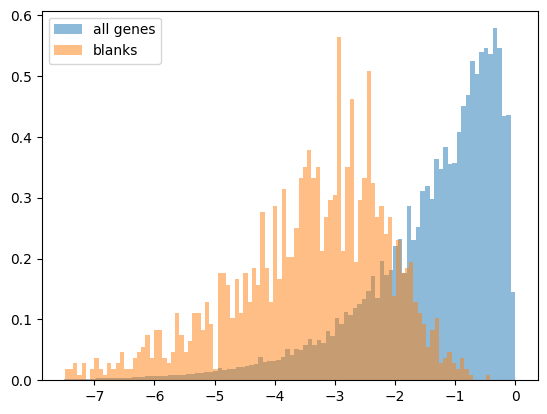

In [23]:
#scoresRef = get_score_per_color(dec,include_dbits=True)
get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs=None,th_min=-7.5,include_dbits=True)

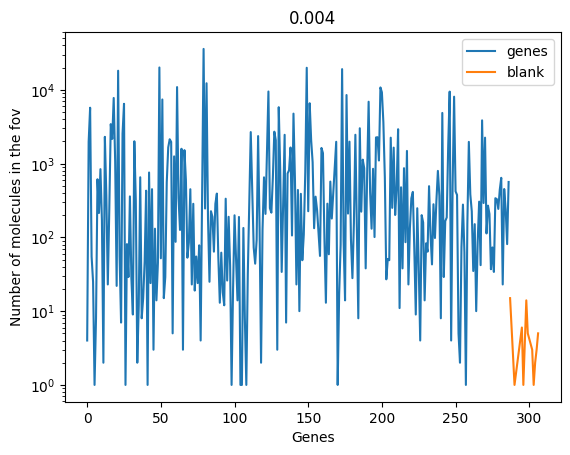

In [27]:
dec.th=-1.5
plot_statistics(dec)

In [43]:
plot_multigenes(dec,genes=['SLC17A6'],colors=['r','g','b','m','c','y','w'],smin=3,smax=10,viewer = None,
                    drift=[0,0,0],resc=[1,1,1]);

C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1784: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1807: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1784: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1807: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1784: RuntimeWarning: invalid value encountered in cast
  shape = np.ceil(
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\napari\layers\points\points.py:1807: RuntimeWarning: invalid value encountered in cast
  coords = np.floor(
C:\U

In [39]:

icds,ncts = np.unique(dec.icodesN[dec.scoreA>-1.5],return_counts=True)
icds = icds[np.argsort(ncts)[::-1]]
np.array(dec.gns_names)[icds][:100]

array(['EEF2', 'CHGB', 'MAP2', 'NNAT', 'ATP9A', 'EPB41L1', 'CTNNA2',
       'PSD', 'IDS', 'STMN2', 'PTPRN', 'NSG2', 'SYT13', 'ATCAY', 'CIRBP',
       'PIP5K1C', 'MAPK8IP2', 'BTBD2', 'KIFC2', 'ADAM11', 'SNAP91',
       'LY6E', 'USF2', 'PWWP3A', 'APC2', 'PCBP4', 'RPN2', 'KCNC2',
       'GNAO1', 'BOP1', 'PAK3', 'LGI4', 'GRAMD1A', 'ANKRD24', 'PPP2R5B',
       'PPP1R16A', 'VPS28', 'REEP1', 'ARHGAP39', 'CPEB4', 'MAPRE3',
       'KIAA0100', 'CACNG4', 'OGDHL', 'NDUFS7', 'ACHE', 'TNFAIP1',
       'CPSF1', 'SRC', 'CNTN1', 'LRRC7', 'REXO1', 'MIDN', 'CYC1', 'DAPK3',
       'SCAMP4', 'MROH1', 'HSF1', 'CSMD3', 'PIAS4', 'PRDM8', 'ATP5F1D',
       'MATK', 'SARM1', 'PIGS', 'POLDIP2', 'ALDOC', 'KLF16', 'LRRC24',
       'SLC4A8', 'MANBAL', 'CCNF', 'PIGZ', 'LRRC14', 'CBARP', 'HGH1',
       'PYCR3', 'ZFR2', 'ITGB8', 'AIF1L', 'LY6H', 'DAZAP1', 'NAPRT',
       'ZNF804A', 'CNR1', 'SYN1', 'SLC17A6', 'RSKR', 'RNF168', 'ZNF623',
       'CDH3', 'GPAA1', 'DGAT1', 'ZFP41', 'LYRM9', 'CCNE1', 'TCF3',
       'SCRT1', 

In [7]:
#run_single_fov_decoding(save_folder,fov,lib_fl = r'D:\Carlos\Scripts\codebook_AJBB_51hybe_DNA_V2_blank.csv')

In [ ]:
fovs = [os.path.basename(fl) for fl in np.sort(glob.glob(all_flds[0]+os.sep+'*.zarr'))]
for fov in fovs:
    print(fov)
    try:
        compute_drift_V2(save_folder,fov,all_flds,set_='',redo=False,gpu=True)
        run_single_fov_decoding(save_folder,fov,set_='',lib_fl = r'D:\Carlos\Scripts\codebook_AJBB_51hybe_DNA_V2_blank.csv')
        dec = main_f(fov=fov,th=-7,force=False)
    except:
        print("Failed",fov)

Conv_zscan__000.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 12789, 12545]
[array([ 0.04634292, -4.325713  , -0.6640655 ], dtype=float32), array([-0.02950991,  4.311834  ,  0.6567301 ], dtype=float32), array([-0.06574624,  4.3417125 ,  0.6725209 ], dtype=float32), 3850, 3340]
[array([  0.17048745, -16.20114   ,  -5.019083  ], dtype=float32), array([-0.13382898, 16.237947  ,  5.0248814 ], dtype=float32), array([-0.21265906, 16.158792  ,  5.012412  ], dtype=float32), 3817, 3318]
[array([ 0.07272331, -9.969539  , -4.7728143 ], dtype=float32), array([-0.0474093, 10.05198  ,  4.773966 ], dtype=float32), array([-0.10199481,  9.874208  ,  4.771483  ], dtype=float32), 3787, 3275]
[array([0.04198159, 0.08075798, 0.04827689], dtype=float32), array([-0.09135445, -0.02317469,  0.02826848], dtype=float32), array([ 0.00492665, -0.1354668 , -0.12100123], dtype=float32), 1751, 1843]
[array([  5.4554133, -19.747711 , -24.238192 ], 

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(96345, 8)
(100529, 8)
(105523, 8)


  2%|█▋                                                                                 | 1/51 [00:00<00:27,  1.80it/s]

(95296, 8)
(100468, 8)
(97001, 8)


  4%|███▎                                                                               | 2/51 [00:01<00:24,  1.98it/s]

(90980, 8)
(109012, 8)


  6%|████▉                                                                              | 3/51 [00:01<00:25,  1.86it/s]

(107653, 8)
(87784, 8)


  8%|██████▌                                                                            | 4/51 [00:01<00:21,  2.23it/s]

(102476, 8)
(94293, 8)
(86838, 8)


 10%|████████▏                                                                          | 5/51 [00:02<00:18,  2.43it/s]

(102055, 8)
(98765, 8)
(95635, 8)
(110322, 8)


 12%|█████████▊                                                                         | 6/51 [00:02<00:17,  2.51it/s]

(112476, 8)
(88459, 8)
(110371, 8)
(109671, 8)


 14%|███████████▍                                                                       | 7/51 [00:03<00:18,  2.35it/s]

(87456, 8)
(102035, 8)


 16%|█████████████                                                                      | 8/51 [00:03<00:17,  2.46it/s]

(104787, 8)
(95747, 8)
(109803, 8)


 18%|██████████████▋                                                                    | 9/51 [00:03<00:16,  2.54it/s]

(114405, 8)
(96265, 8)
(104764, 8)


 20%|████████████████                                                                  | 10/51 [00:04<00:18,  2.16it/s]

(102232, 8)
(81424, 8)


 22%|█████████████████▋                                                                | 11/51 [00:04<00:17,  2.26it/s]

(98169, 8)
(107571, 8)
(89625, 8)
(104879, 8)
(105819, 8)


 24%|███████████████████▎                                                              | 12/51 [00:05<00:15,  2.48it/s]

(83164, 8)
(105223, 8)


 25%|████████████████████▉                                                             | 13/51 [00:05<00:14,  2.58it/s]

(97762, 8)
(77308, 8)
(104682, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:05<00:13,  2.82it/s]

(102566, 8)
(81946, 8)


 29%|████████████████████████                                                          | 15/51 [00:06<00:12,  2.82it/s]

(99206, 8)
(100370, 8)
(77586, 8)
(95983, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:06<00:12,  2.72it/s]

(103356, 8)
(83417, 8)
(104295, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:06<00:12,  2.80it/s]

(103425, 8)
(85026, 8)
(107546, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:07<00:11,  2.90it/s]

(112098, 8)
(93482, 8)
(106341, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:07<00:10,  3.05it/s]

(111481, 8)
(97738, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:07<00:10,  3.10it/s]

(105802, 8)
(108570, 8)
(95113, 8)
(111654, 8)
(113193, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:08<00:10,  2.96it/s]

(96925, 8)
(110611, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:08<00:10,  2.89it/s]

(107865, 8)
(106777, 8)
(114694, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:08<00:09,  2.96it/s]

(116610, 8)
(101400, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:09<00:09,  2.87it/s]

(115629, 8)
(118373, 8)
(102351, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:09<00:09,  2.80it/s]

(114089, 8)
(116029, 8)
(93255, 8)
(112140, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:09<00:08,  2.95it/s]

(114749, 8)
(87053, 8)
(102674, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:10<00:07,  3.17it/s]

(107227, 8)
(87598, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:10<00:07,  3.21it/s]

(104148, 8)
(105837, 8)
(84781, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:10<00:06,  3.27it/s]

(97588, 8)
(101975, 8)
(81028, 8)
(103829, 8)
(101868, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:11<00:06,  3.10it/s]

(80985, 8)
(103470, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:11<00:07,  2.65it/s]

(110903, 8)
(97109, 8)
(114532, 8)
(116380, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:12<00:07,  2.42it/s]

(90348, 8)
(110647, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:12<00:07,  2.55it/s]

(115112, 8)
(113333, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:12<00:06,  2.52it/s]

(126664, 8)
(134208, 8)
(67464, 8)
(92644, 8)
(94162, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:13<00:05,  2.83it/s]

(69952, 8)
(90361, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:13<00:05,  2.88it/s]

(97470, 8)
(73181, 8)
(106601, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:13<00:04,  3.19it/s]

(100480, 8)
(79373, 8)
(106168, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:13<00:03,  3.26it/s]

(117003, 8)
(83100, 8)
(106633, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:14<00:03,  3.36it/s]

(116407, 8)
(96519, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:14<00:03,  3.06it/s]

(101223, 8)
(112846, 8)
(105412, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:14<00:03,  3.11it/s]

(115335, 8)
(112269, 8)
(109691, 8)
(114918, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:15<00:02,  3.02it/s]

(118973, 8)
(114559, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:15<00:02,  2.94it/s]

(130347, 8)
(122592, 8)
(114081, 8)
(122571, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:16<00:02,  2.85it/s]

(123106, 8)
(106245, 8)
(124237, 8)
(121322, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:16<00:02,  2.48it/s]

(116579, 8)
(125951, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:17<00:02,  2.09it/s]

(126970, 8)
(115220, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:17<00:01,  2.36it/s]

(127443, 8)
(123128, 8)
(124023, 8)
(139521, 8)
(137100, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:17<00:01,  2.37it/s]

(121293, 8)
(136832, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:18<00:00,  2.52it/s]

(133342, 8)
(123735, 8)
(136140, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:18<00:00,  2.60it/s]

(138922, 8)
(122371, 8)
(149884, 8)
(134815, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:52<00:00, 17.36s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__000--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 9.090529680252075
Computing score...
Total time computing score: 0.23600387573242188
Computing sorting...
Total time sorting molecules by score: 7.044294834136963
Finding best bits per molecules...
Finding best code...


100%|████████████████████████████████████████████████████████████████████████████████| 765/765 [00:26<00:00, 29.32it/s]


Total time best bits per molecule: 248.96141958236694
Decoding completed for Conv_zscan__000.zarr.
Loaded decoded: -6.868439197540283


D:\Carlos\Scripts\ioMicroPostFits.py:609: RuntimeWarning: invalid value encountered in cast
  CELLs = XH_f_[:,-1].astype(int) #cell index


Failed Conv_zscan__000.zarr
Conv_zscan__001.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 2075, 1758]
[array([-0.00869551, -3.2669296 , -0.81174195], dtype=float32), array([0.01146821, 3.4175272 , 0.860262  ], dtype=float32), array([2.5117951e-03, 2.9310641e+00, 7.0353168e-01], dtype=float32), 930, 417]
[array([  0.10148752, -14.349188  ,  -4.7771473 ], dtype=float32), array([-0.09853832, 14.373512  ,  4.8135133 ], dtype=float32), array([-0.10804768, 14.295083  ,  4.6962543 ], dtype=float32), 912, 410]
[array([ 0.07707427, -8.112929  , -4.6946564 ], dtype=float32), array([-0.08478224,  8.13131   ,  4.721532  ], dtype=float32), array([-0.05959759,  8.071252  ,  4.63372   ], dtype=float32), 882, 389]
[array([  4.0933423, -17.596626 , -20.26523  ], dtype=float32), array([-3.8449383, 17.560446 , 20.266603 ], dtype=float32), array([-4.6646705, 17.67984  , 20.262074 ], dtype=float32), 506, 220]
[array([  3.5667753, -19.15

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(6934, 8)
(7606, 8)


  2%|█▋                                                                                 | 1/51 [00:00<00:16,  3.00it/s]

(6553, 8)
(7289, 8)


  4%|███▎                                                                               | 2/51 [00:00<00:15,  3.23it/s]

(7620, 8)
(6441, 8)
(6380, 8)


  6%|████▉                                                                              | 3/51 [00:00<00:13,  3.59it/s]

(9231, 8)
(7600, 8)
(5842, 8)


  8%|██████▌                                                                            | 4/51 [00:01<00:12,  3.82it/s]

(7319, 8)
(5731, 8)
(18778, 8)
(14888, 8)


 10%|████████▏                                                                          | 5/51 [00:01<00:13,  3.31it/s]

(9151, 8)
(22582, 8)


 12%|█████████▊                                                                         | 6/51 [00:01<00:13,  3.32it/s]

(16681, 8)
(11269, 8)
(19211, 8)


 14%|███████████▍                                                                       | 7/51 [00:02<00:12,  3.44it/s]

(16375, 8)
(11629, 8)
(21654, 8)
(15303, 8)


 16%|█████████████                                                                      | 8/51 [00:02<00:13,  3.09it/s]

(11660, 8)
(23454, 8)
(17416, 8)


 18%|██████████████▋                                                                    | 9/51 [00:02<00:16,  2.57it/s]

(12447, 8)
(24917, 8)


 20%|████████████████                                                                  | 10/51 [00:03<00:16,  2.44it/s]

(16272, 8)
(11278, 8)
(24683, 8)


 22%|█████████████████▋                                                                | 11/51 [00:03<00:16,  2.38it/s]

(15587, 8)
(11586, 8)
(26267, 8)
(16619, 8)


 24%|███████████████████▎                                                              | 12/51 [00:04<00:15,  2.48it/s]

(12765, 8)
(26234, 8)


 25%|████████████████████▉                                                             | 13/51 [00:04<00:14,  2.61it/s]

(17427, 8)
(11881, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:04<00:12,  2.93it/s]

(26283, 8)
(16876, 8)
(12433, 8)
(28003, 8)
(16675, 8)


 29%|████████████████████████                                                          | 15/51 [00:05<00:12,  2.81it/s]

(12679, 8)
(27055, 8)
(16057, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:05<00:11,  2.96it/s]

(12714, 8)
(28379, 8)
(17584, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:05<00:11,  3.05it/s]

(13298, 8)
(30721, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:06<00:11,  2.96it/s]

(18436, 8)
(14560, 8)
(31296, 8)
(18648, 8)
(13666, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:06<00:10,  2.99it/s]

(32488, 8)
(18393, 8)
(13976, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:06<00:09,  3.13it/s]

(30597, 8)
(18824, 8)
(14534, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:07<00:09,  3.16it/s]

(32119, 8)
(18903, 8)
(13555, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:07<00:07,  3.63it/s]

(33363, 8)
(19180, 8)
(14621, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:07<00:07,  3.59it/s]

(33354, 8)
(19741, 8)
(14839, 8)
(31767, 8)
(18506, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:08<00:07,  3.42it/s]

(14260, 8)
(29689, 8)
(18163, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:08<00:06,  3.69it/s]

(14220, 8)
(30206, 8)
(16878, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:08<00:06,  3.67it/s]

(13752, 8)
(30095, 8)
(16482, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:08<00:06,  3.65it/s]

(13157, 8)
(30376, 8)
(16043, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:09<00:05,  3.67it/s]

(13141, 8)
(31747, 8)
(17352, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:09<00:05,  3.88it/s]

(12996, 8)
(31773, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:09<00:05,  3.67it/s]

(16829, 8)
(14158, 8)
(35012, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:10<00:05,  3.69it/s]

(18386, 8)
(14369, 8)
(33079, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:10<00:04,  3.65it/s]

(17712, 8)
(14065, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:10<00:04,  3.67it/s]

(39559, 8)
(21761, 8)
(17034, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:10<00:04,  3.67it/s]

(31147, 8)
(17300, 8)
(12576, 8)
(31292, 8)
(16726, 8)
(12871, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:11<00:04,  3.34it/s]

(30439, 8)
(18179, 8)
(13072, 8)
(30519, 8)
(17927, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:12<00:06,  2.05it/s]

(15181, 8)
(30770, 8)
(17641, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:12<00:05,  2.34it/s]

(15156, 8)
(32602, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:13<00:04,  2.48it/s]

(17457, 8)
(14603, 8)
(33196, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:13<00:03,  2.75it/s]

(18640, 8)
(14053, 8)
(33690, 8)
(18943, 8)
(14888, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:13<00:02,  3.02it/s]

(34357, 8)
(20775, 8)
(15371, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:14<00:02,  3.16it/s]

(33387, 8)
(18625, 8)
(15598, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:14<00:01,  3.42it/s]

(32246, 8)
(19624, 8)
(14919, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:14<00:01,  3.64it/s]

(32763, 8)
(19425, 8)
(15519, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:14<00:01,  3.73it/s]

(32205, 8)
(19097, 8)
(14662, 8)
(32818, 8)
(21306, 8)
(17003, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:15<00:00,  3.62it/s]

(33178, 8)
(21289, 8)
(16386, 8)
(32416, 8)
(20653, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:15<00:00,  3.53it/s]

(16886, 8)
(31767, 8)
(23064, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:16<00:00,  3.17it/s]

(16110, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.64s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__001--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 1.6107871532440186
Computing score...
Total time computing score: 0.12199950218200684
Computing sorting...
Total time sorting molecules by score: 1.1441280841827393
Finding best bits per molecules...
Finding best code...


100%|████████████████████████████████████████████████████████████████████████████████| 136/136 [00:04<00:00, 29.67it/s]


Total time best bits per molecule: 35.779866218566895
Decoding completed for Conv_zscan__001.zarr.
Loaded decoded: -0.7528681755065918
Failed Conv_zscan__001.zarr
Conv_zscan__002.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 2864, 2646]
[array([ 0.04439276, -2.288649  , -1.4012558 ], dtype=float32), array([-0.05469614,  2.5812378 ,  1.5569817 ], dtype=float32), array([-0.02141951,  1.6362697 ,  1.0540367 ], dtype=float32), 631, 283]
[array([ -0.04350292, -14.409885  ,  -4.5067506 ], dtype=float32), array([ 0.02618336, 14.424111  ,  4.4881873 ], dtype=float32), array([ 0.09107397, 14.3708105 ,  4.5577383 ], dtype=float32), 618, 225]
[array([ 0.06514898, -9.118424  , -4.18154   ], dtype=float32), array([-0.0977815,  9.130364 ,  4.1380086], dtype=float32), array([0.02374651, 9.085899  , 4.300125  ], dtype=float32), 632, 232]
[array([  1.3404205, -18.659172 , -21.03166  ], dtype=float32), array([-1.2798064, 18.625113 , 

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(4131, 8)
(4906, 8)


  2%|█▋                                                                                 | 1/51 [00:00<00:09,  5.06it/s]

(3715, 8)
(4215, 8)
(4522, 8)
(3657, 8)


  4%|███▎                                                                               | 2/51 [00:00<00:09,  5.41it/s]

(3947, 8)
(5838, 8)


  6%|████▉                                                                              | 3/51 [00:00<00:07,  6.19it/s]

(4366, 8)
(3257, 8)
(4344, 8)
(3070, 8)


  8%|██████▌                                                                            | 4/51 [00:00<00:07,  6.67it/s]

(2287, 8)
(4648, 8)
(2903, 8)
(2962, 8)
(4759, 8)
(3292, 8)


 14%|███████████▍                                                                       | 7/51 [00:01<00:06,  7.21it/s]

(2074, 8)
(4721, 8)
(3727, 8)
(2336, 8)


 16%|█████████████                                                                      | 8/51 [00:01<00:06,  6.78it/s]

(3755, 8)
(3251, 8)
(2828, 8)
(5045, 8)


 20%|████████████████                                                                  | 10/51 [00:01<00:06,  5.86it/s]

(3654, 8)
(3344, 8)
(4366, 8)
(2809, 8)


 22%|█████████████████▋                                                                | 11/51 [00:01<00:06,  5.97it/s]

(2397, 8)
(3270, 8)
(2733, 8)
(2838, 8)
(3744, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:02<00:04,  8.41it/s]

(3293, 8)
(2309, 8)
(4550, 8)
(2858, 8)
(1892, 8)
(4104, 8)
(3099, 8)


 29%|████████████████████████                                                          | 15/51 [00:02<00:04,  8.65it/s]

(2037, 8)
(3585, 8)
(3033, 8)
(1844, 8)
(3283, 8)
(2891, 8)
(2008, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:02<00:03,  9.80it/s]

(3816, 8)
(3285, 8)
(2430, 8)
(4117, 8)
(3798, 8)
(2607, 8)
(4378, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:02<00:03, 10.33it/s]

(3867, 8)
(3420, 8)
(4392, 8)
(3555, 8)
(2983, 8)
(4486, 8)
(4014, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:02<00:02, 10.22it/s]

(2389, 8)
(4231, 8)
(3130, 8)
(3082, 8)
(4662, 8)
(3769, 8)
(2918, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:03<00:02, 10.46it/s]

(4727, 8)
(3945, 8)
(2355, 8)
(4291, 8)
(3668, 8)
(2493, 8)
(4486, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:03<00:02, 10.42it/s]

(3774, 8)
(2623, 8)
(3998, 8)
(3707, 8)
(2336, 8)
(3636, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:03<00:02, 10.91it/s]

(3290, 8)
(2034, 8)
(3123, 8)
(3218, 8)
(2311, 8)
(3966, 8)
(3104, 8)
(2129, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:03<00:01, 11.43it/s]

(3510, 8)
(3446, 8)
(2536, 8)
(3749, 8)
(3016, 8)
(1835, 8)
(3210, 8)
(3125, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:03<00:01, 10.86it/s]

(2025, 8)
(3577, 8)
(3769, 8)
(706, 8)
(2657, 8)
(1757, 8)
(1158, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:04<00:01, 10.50it/s]

(2386, 8)
(2048, 8)
(975, 8)
(3341, 8)
(2197, 8)
(1030, 8)
(2938, 8)
(3335, 8)
(1706, 8)
(3026, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:05<00:02,  4.85it/s]

(3389, 8)
(1938, 8)
(2783, 8)
(2926, 8)
(2327, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:05<00:01,  5.29it/s]

(3354, 8)
(2563, 8)
(2105, 8)
(3836, 8)
(3003, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:05<00:01,  5.89it/s]

(2758, 8)
(5008, 8)
(3101, 8)
(2548, 8)
(4132, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:05<00:01,  6.38it/s]

(3635, 8)
(2081, 8)
(4718, 8)
(3115, 8)
(2296, 8)
(4533, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:06<00:00,  7.13it/s]

(3225, 8)
(1963, 8)
(3736, 8)
(2587, 8)
(2716, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:06<00:00,  6.50it/s]

(5121, 8)
(3943, 8)
(1971, 8)
(5143, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:06<00:00,  6.34it/s]

(3701, 8)
(2160, 8)
(4926, 8)
(3913, 8)
(2078, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:06<00:00,  7.43it/s]


(6618, 8)
(3273, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.31it/s]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__002--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 0.07163619995117188
Computing score...
Total time computing score: 0.0034856796264648438
Computing sorting...
Total time sorting molecules by score: 0.11375761032104492
Finding best bits per molecules...
Finding best code...


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24.50it/s]


Total time best bits per molecule: 1.1314244270324707
Decoding completed for Conv_zscan__002.zarr.
Loaded decoded: -0.04538154602050781


C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\carlos\anaconda3\envs\cellpose2\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Failed Conv_zscan__002.zarr
Conv_zscan__003.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 13590, 12825]
[array([ 0.08645974, -2.9985223 , -1.4579353 ], dtype=float32), array([-0.08947733,  3.019321  ,  1.4854045 ], dtype=float32), array([-0.08301022,  2.974746  ,  1.4265342 ], dtype=float32), 5854, 5121]
[array([ -0.01540782, -14.633296  ,  -4.73344   ], dtype=float32), array([7.8212246e-03, 1.4634767e+01, 4.7195997e+00], dtype=float32), array([ 0.02410288, 14.631613  ,  4.749303  ], dtype=float32), 5538, 4832]
[array([ 0.01212578, -9.586941  , -4.3550334 ], dtype=float32), array([-0.01128422,  9.588851  ,  4.350313  ], dtype=float32), array([-0.01308769,  9.584758  ,  4.360429  ], dtype=float32), 5507, 4818]
[array([  0.39129263, -18.763145  , -20.61997   ], dtype=float32), array([-0.38707542, 18.742151  , 20.610743  ], dtype=float32), array([-0.39611706, 18.787163  , 20.630527  ], dtype=float32), 5506, 4813]
[arra

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(381290, 8)
(379073, 8)
(495198, 8)


  2%|█▋                                                                                 | 1/51 [00:01<01:18,  1.57s/it]

(376487, 8)
(369647, 8)
(379071, 8)


  4%|███▎                                                                               | 2/51 [00:03<01:19,  1.61s/it]

(324028, 8)
(402372, 8)


  6%|████▉                                                                              | 3/51 [00:04<01:11,  1.49s/it]

(426119, 8)
(316314, 8)
(376931, 8)


  8%|██████▌                                                                            | 4/51 [00:05<01:08,  1.46s/it]

(346069, 8)
(308878, 8)
(368953, 8)


 10%|████████▏                                                                          | 5/51 [00:06<00:58,  1.28s/it]

(379931, 8)
(339495, 8)
(414120, 8)
(493072, 8)


 12%|█████████▊                                                                         | 6/51 [00:08<00:56,  1.27s/it]

(310992, 8)
(378530, 8)


 14%|███████████▍                                                                       | 7/51 [00:09<00:56,  1.28s/it]

(397555, 8)
(317811, 8)
(337304, 8)


 16%|█████████████                                                                      | 8/51 [00:11<01:06,  1.56s/it]

(382291, 8)
(348145, 8)
(370966, 8)
(456094, 8)


 18%|██████████████▋                                                                    | 9/51 [00:12<00:59,  1.43s/it]

(349887, 8)
(347047, 8)


 20%|████████████████                                                                  | 10/51 [00:14<00:56,  1.37s/it]

(363179, 8)
(295901, 8)
(320339, 8)


 22%|█████████████████▋                                                                | 11/51 [00:15<00:52,  1.32s/it]

(420640, 8)
(326885, 8)
(347914, 8)
(378850, 8)


 24%|███████████████████▎                                                              | 12/51 [00:16<00:52,  1.35s/it]

(305125, 8)
(344859, 8)


 25%|████████████████████▉                                                             | 13/51 [00:17<00:48,  1.29s/it]

(336802, 8)
(291345, 8)
(346647, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:18<00:44,  1.22s/it]

(368681, 8)
(308309, 8)
(321527, 8)


 29%|████████████████████████                                                          | 15/51 [00:20<00:44,  1.22s/it]

(343520, 8)
(291787, 8)
(304473, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:21<00:46,  1.33s/it]

(366729, 8)
(309408, 8)
(338085, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:22<00:43,  1.27s/it]

(351533, 8)
(319553, 8)
(356842, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:23<00:40,  1.23s/it]

(405779, 8)
(348936, 8)
(349919, 8)
(396717, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:25<00:39,  1.24s/it]

(370687, 8)
(347884, 8)
(382500, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:26<00:41,  1.33s/it]

(358237, 8)
(376248, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:27<00:38,  1.28s/it]

(403933, 8)
(340430, 8)
(360550, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:29<00:36,  1.25s/it]

(375787, 8)
(385637, 8)
(379844, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:30<00:36,  1.31s/it]

(422835, 8)
(361821, 8)
(394201, 8)
(435562, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:32<00:37,  1.40s/it]

(362258, 8)
(368444, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:33<00:36,  1.39s/it]

(415946, 8)
(343293, 8)
(371857, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:34<00:33,  1.32s/it]

(410551, 8)
(347405, 8)
(350790, 8)
(402375, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:36<00:35,  1.47s/it]

(344044, 8)
(352138, 8)
(389306, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:37<00:32,  1.41s/it]

(335355, 8)
(322599, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:38<00:29,  1.36s/it]

(369011, 8)
(317479, 8)
(343973, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:40<00:27,  1.31s/it]

(360220, 8)
(321530, 8)
(337071, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:41<00:26,  1.33s/it]

(412176, 8)
(361288, 8)
(371184, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:43<00:28,  1.48s/it]

(407409, 8)
(336060, 8)
(355994, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:45<00:28,  1.57s/it]

(405844, 8)
(354283, 8)
(377442, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:47<00:28,  1.69s/it]

(451116, 8)
(267762, 8)
(292237, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:48<00:25,  1.59s/it]

(306918, 8)
(280070, 8)
(293745, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:49<00:23,  1.55s/it]

(327483, 8)
(282614, 8)
(348377, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:51<00:22,  1.62s/it]

(334588, 8)
(304495, 8)
(341242, 8)
(406036, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:52<00:19,  1.50s/it]

(304287, 8)
(344247, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:54<00:16,  1.41s/it]

(407664, 8)
(351717, 8)
(328974, 8)
(386217, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:55<00:15,  1.43s/it]

(381729, 8)
(380393, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:57<00:16,  1.69s/it]

(384312, 8)
(382726, 8)
(372344, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:59<00:14,  1.62s/it]

(412718, 8)
(399019, 8)
(432817, 8)
(434173, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [01:00<00:12,  1.59s/it]

(400425, 8)
(409979, 8)
(442789, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [01:02<00:10,  1.48s/it]

(372507, 8)
(417717, 8)
(437600, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [01:03<00:09,  1.50s/it]

(393158, 8)
(411782, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [01:05<00:07,  1.47s/it]

(449265, 8)
(388675, 8)
(419101, 8)
(427376, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [01:06<00:06,  1.54s/it]

(423201, 8)
(477226, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [01:08<00:04,  1.47s/it]

(497013, 8)
(407523, 8)
(454385, 8)
(468841, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [01:09<00:02,  1.48s/it]

(417480, 8)
(463439, 8)
(503830, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [01:11<00:01,  1.52s/it]

(406859, 8)
(512238, 8)
(474078, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:12<00:00, 64.06s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__003--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 29.28173017501831
Computing score...
Total time computing score: 0.5512499809265137
Computing sorting...
Total time sorting molecules by score: 20.540589094161987
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 2943/2943 [01:38<00:00, 29.86it/s]


Total time best bits per molecule: 905.8889672756195
Decoding completed for Conv_zscan__003.zarr.
Loaded decoded: -27.69747304916382
Failed Conv_zscan__003.zarr
Conv_zscan__004.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9533, 5734]
[array([-0.04555379, -2.9351184 , -1.358349  ], dtype=float32), array([0.04239741, 2.9479291 , 1.3612127 ], dtype=float32), array([0.05111684, 2.9125397 , 1.3533016 ], dtype=float32), 5543, 3145]
[array([ -0.10857813, -14.991113  ,  -4.7837515 ], dtype=float32), array([ 0.10776381, 14.987668  ,  4.7847505 ], dtype=float32), array([ 0.10999583, 14.997109  ,  4.7820125 ], dtype=float32), 5350, 3073]
[array([-0.07442218, -8.980388  , -4.6043873 ], dtype=float32), array([0.06708132, 8.965645  , 4.6115465 ], dtype=float32), array([0.08731022, 9.00627   , 4.5918183 ], dtype=float32), 5353, 3049]
[array([ -0.09089904, -18.853205  , -20.46807   ], dtype=float32), array([ 0.08890423, 18.8427   

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(730504, 8)
(685031, 8)
(875082, 8)


  2%|█▋                                                                                 | 1/51 [00:02<01:41,  2.03s/it]

(707477, 8)
(671278, 8)
(671055, 8)


  4%|███▎                                                                               | 2/51 [00:03<01:34,  1.93s/it]

(601593, 8)
(733019, 8)
(764003, 8)


  6%|████▉                                                                              | 3/51 [00:05<01:29,  1.87s/it]

(586267, 8)
(670275, 8)
(597133, 8)


  8%|██████▌                                                                            | 4/51 [00:07<01:22,  1.76s/it]

(516431, 8)
(633811, 8)
(635070, 8)


 10%|████████▏                                                                          | 5/51 [00:08<01:13,  1.59s/it]

(573865, 8)
(717164, 8)
(829350, 8)


 12%|█████████▊                                                                         | 6/51 [00:10<01:16,  1.70s/it]

(509653, 8)
(644036, 8)
(670505, 8)


 14%|███████████▍                                                                       | 7/51 [00:12<01:19,  1.80s/it]

(509650, 8)
(558084, 8)
(630639, 8)


 16%|█████████████                                                                      | 8/51 [00:13<01:09,  1.62s/it]

(579761, 8)
(621189, 8)
(748062, 8)


 18%|██████████████▋                                                                    | 9/51 [00:15<01:09,  1.65s/it]

(580172, 8)
(575285, 8)
(595265, 8)


 20%|████████████████                                                                  | 10/51 [00:17<01:09,  1.68s/it]

(444533, 8)
(508752, 8)
(656018, 8)


 22%|█████████████████▋                                                                | 11/51 [00:18<01:05,  1.64s/it]

(504510, 8)
(559558, 8)
(608623, 8)


 24%|███████████████████▎                                                              | 12/51 [00:20<01:00,  1.56s/it]

(457345, 8)
(555901, 8)
(521370, 8)


 25%|████████████████████▉                                                             | 13/51 [00:21<00:57,  1.52s/it]

(419017, 8)
(549458, 8)
(573919, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:23<00:57,  1.55s/it]

(453288, 8)
(500089, 8)
(540706, 8)


 29%|████████████████████████                                                          | 15/51 [00:24<00:54,  1.51s/it]

(407391, 8)
(462819, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:25<00:48,  1.39s/it]

(567788, 8)
(443005, 8)
(523459, 8)
(538312, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:27<00:46,  1.37s/it]

(464396, 8)
(564406, 8)
(647791, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:28<00:48,  1.47s/it]

(520872, 8)
(547294, 8)
(622308, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:30<00:47,  1.49s/it]

(561930, 8)
(534062, 8)
(586077, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:31<00:45,  1.45s/it]

(527898, 8)
(586854, 8)
(627998, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:33<00:46,  1.55s/it]

(490383, 8)
(553444, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:34<00:44,  1.52s/it]

(556102, 8)
(589678, 8)
(592334, 8)
(662298, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:36<00:41,  1.50s/it]

(538039, 8)
(625913, 8)
(686453, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:38<00:47,  1.77s/it]

(531223, 8)
(566831, 8)
(638485, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:40<00:45,  1.75s/it]

(493156, 8)
(572983, 8)
(626882, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:41<00:41,  1.64s/it]

(498283, 8)
(531157, 8)
(616034, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:43<00:41,  1.71s/it]

(493336, 8)
(532886, 8)
(583914, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:45<00:37,  1.61s/it]

(457279, 8)
(457802, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:46<00:32,  1.46s/it]

(524532, 8)
(408703, 8)
(494494, 8)
(498013, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:47<00:30,  1.45s/it]

(416252, 8)
(482745, 8)
(602130, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:49<00:29,  1.49s/it]

(480015, 8)
(527978, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:50<00:29,  1.53s/it]

(587793, 8)
(424336, 8)
(487472, 8)
(569630, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:51<00:25,  1.41s/it]

(434149, 8)
(504077, 8)
(644847, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:53<00:22,  1.35s/it]

(257274, 8)
(327916, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:53<00:18,  1.17s/it]

(343750, 8)
(274976, 8)
(318001, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:54<00:15,  1.06s/it]

(368412, 8)
(284063, 8)
(422803, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:55<00:14,  1.01s/it]

(384282, 8)
(310138, 8)
(395181, 8)
(520946, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:56<00:13,  1.00s/it]

(320887, 8)
(403365, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:57<00:12,  1.02s/it]

(521309, 8)
(404907, 8)
(362885, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:58<00:11,  1.02s/it]

(470524, 8)
(461640, 8)
(468532, 8)
(459997, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:59<00:11,  1.11s/it]

(458105, 8)
(429556, 8)
(512976, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [01:01<00:10,  1.19s/it]

(494906, 8)
(563758, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [01:02<00:09,  1.22s/it]

(547888, 8)
(500613, 8)
(517963, 8)
(573469, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [01:04<00:09,  1.29s/it]

(429463, 8)
(520687, 8)
(546843, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [01:05<00:07,  1.25s/it]

(475987, 8)
(502457, 8)
(571427, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [01:06<00:06,  1.26s/it]

(453899, 8)
(506893, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [01:07<00:04,  1.21s/it]

(507910, 8)
(525325, 8)
(625375, 8)
(656568, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [01:09<00:04,  1.47s/it]

(475059, 8)
(559399, 8)
(577883, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [01:11<00:03,  1.53s/it]

(508230, 8)
(589150, 8)
(672391, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [01:12<00:01,  1.55s/it]

(474576, 8)
(691417, 8)
(584180, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:47<00:00, 75.78s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__004--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 27.76785159111023
Computing score...
Total time computing score: 0.5199968814849854
Computing sorting...
Total time sorting molecules by score: 17.665072441101074
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 3436/3436 [01:55<00:00, 29.82it/s]


Total time best bits per molecule: 1042.5499646663666
Decoding completed for Conv_zscan__004.zarr.
Loaded decoded: -37.17357349395752
Failed Conv_zscan__004.zarr
Conv_zscan__005.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9467, 5239]
[array([ 0.0260594, -4.3705115, -1.4575198], dtype=float32), array([-0.02715766,  4.3662305 ,  1.4367609 ], dtype=float32), array([-0.02389703,  4.378941  ,  1.4983921 ], dtype=float32), 5383, 2734]
[array([  0.02290212, -15.226198  ,  -4.7146425 ], dtype=float32), array([-0.02615839, 15.203398  ,  4.7016487 ], dtype=float32), array([-0.0165375, 15.270763 ,  4.7400403], dtype=float32), 5207, 2664]
[array([ 0.06038514, -8.514489  , -4.673867  ], dtype=float32), array([-0.05254903,  8.508996  ,  4.64844   ], dtype=float32), array([-0.07582889,  8.525313  ,  4.7239823 ], dtype=float32), 5205, 2641]
[array([ -0.12646788, -18.42663   , -20.28635   ], dtype=float32), array([ 0.13586763, 18.

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(658500, 8)
(628770, 8)
(850899, 8)


  2%|█▋                                                                                 | 1/51 [00:02<01:52,  2.24s/it]

(649390, 8)
(612497, 8)
(633559, 8)


  4%|███▎                                                                               | 2/51 [00:03<01:30,  1.85s/it]

(552154, 8)
(666676, 8)
(709085, 8)


  6%|████▉                                                                              | 3/51 [00:05<01:30,  1.89s/it]

(538498, 8)
(625017, 8)
(569285, 8)


  8%|██████▌                                                                            | 4/51 [00:07<01:24,  1.80s/it]

(490912, 8)
(589924, 8)
(609400, 8)


 10%|████████▏                                                                          | 5/51 [00:08<01:14,  1.61s/it]

(535886, 8)
(659487, 8)
(804446, 8)


 12%|█████████▊                                                                         | 6/51 [00:10<01:21,  1.82s/it]

(481520, 8)
(596310, 8)
(634407, 8)


 14%|███████████▍                                                                       | 7/51 [00:12<01:16,  1.73s/it]

(488031, 8)
(529232, 8)
(608276, 8)


 16%|█████████████                                                                      | 8/51 [00:13<01:09,  1.62s/it]

(546627, 8)
(583019, 8)
(733446, 8)


 18%|██████████████▋                                                                    | 9/51 [00:15<01:06,  1.59s/it]

(545831, 8)
(540959, 8)
(578283, 8)


 20%|████████████████                                                                  | 10/51 [00:17<01:10,  1.72s/it]

(436347, 8)
(490235, 8)
(656751, 8)


 22%|█████████████████▋                                                                | 11/51 [00:18<01:06,  1.66s/it]

(487373, 8)
(539828, 8)
(598737, 8)


 24%|███████████████████▎                                                              | 12/51 [00:20<01:05,  1.68s/it]

(445626, 8)
(537274, 8)
(524609, 8)


 25%|████████████████████▉                                                             | 13/51 [00:21<00:59,  1.58s/it]

(418786, 8)
(533885, 8)
(578194, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:23<00:59,  1.61s/it]

(445214, 8)
(484967, 8)
(535205, 8)


 29%|████████████████████████                                                          | 15/51 [00:25<00:56,  1.58s/it]

(404907, 8)
(455325, 8)
(567314, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:26<00:56,  1.62s/it]

(438106, 8)
(513433, 8)
(538121, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:28<00:56,  1.66s/it]

(456398, 8)
(545320, 8)
(631184, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:30<00:54,  1.64s/it]

(509080, 8)
(537498, 8)
(619121, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:31<00:53,  1.67s/it]

(546932, 8)
(526051, 8)
(586567, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:33<00:53,  1.73s/it]

(521570, 8)
(575181, 8)
(626693, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:35<00:51,  1.73s/it]

(483555, 8)
(543675, 8)
(564046, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:37<00:52,  1.82s/it]

(564008, 8)
(572850, 8)
(649144, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:39<00:51,  1.84s/it]

(523337, 8)
(603016, 8)
(673800, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:42<00:58,  2.15s/it]

(519842, 8)
(553282, 8)
(632943, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:44<00:55,  2.15s/it]

(489312, 8)
(560077, 8)
(627126, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:46<00:53,  2.13s/it]

(496601, 8)
(523856, 8)
(617221, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:48<00:49,  2.08s/it]

(493162, 8)
(527574, 8)
(591913, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:50<00:50,  2.17s/it]

(462553, 8)
(466500, 8)
(546224, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:52<00:42,  1.94s/it]

(419751, 8)
(496708, 8)
(517469, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:54<00:40,  1.91s/it]

(428881, 8)
(483132, 8)
(610459, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:56<00:39,  1.97s/it]

(483371, 8)
(526047, 8)
(593988, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:58<00:36,  1.90s/it]

(432948, 8)
(492619, 8)
(581082, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:59<00:31,  1.75s/it]

(444608, 8)
(511436, 8)
(645617, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [01:01<00:29,  1.73s/it]

(286267, 8)
(353146, 8)
(384588, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [01:02<00:24,  1.55s/it]

(301016, 8)
(344714, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [01:03<00:23,  1.55s/it]

(409223, 8)
(310046, 8)
(440771, 8)
(421457, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [01:05<00:20,  1.48s/it]

(337782, 8)
(418790, 8)
(545657, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [01:06<00:18,  1.41s/it]

(343453, 8)
(422733, 8)
(545065, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [01:08<00:18,  1.57s/it]

(423225, 8)
(387491, 8)
(498370, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [01:09<00:17,  1.58s/it]

(468069, 8)
(480852, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [01:11<00:16,  1.61s/it]

(488742, 8)
(466250, 8)
(449533, 8)
(537723, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [01:13<00:14,  1.57s/it]

(494509, 8)
(560093, 8)
(566752, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [01:15<00:13,  1.71s/it]

(496679, 8)
(519315, 8)
(584261, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [01:16<00:11,  1.62s/it]

(439493, 8)
(528052, 8)
(571272, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [01:18<00:09,  1.65s/it]

(474074, 8)
(508454, 8)
(584980, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [01:20<00:08,  1.71s/it]

(452256, 8)
(510225, 8)
(529638, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [01:21<00:07,  1.77s/it]

(515286, 8)
(609740, 8)
(657386, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [01:23<00:05,  1.82s/it]

(471133, 8)
(558469, 8)
(590247, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [01:25<00:03,  1.79s/it]

(496264, 8)
(578696, 8)
(665726, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [01:27<00:01,  1.71s/it]

(470779, 8)
(666139, 8)
(594396, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:07<00:00, 82.52s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__005--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 32.54339408874512
Computing score...
Total time computing score: 0.6727612018585205
Computing sorting...
Total time sorting molecules by score: 21.569970846176147
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 3923/3923 [02:11<00:00, 29.73it/s]


Total time best bits per molecule: 1235.5597310066223
Decoding completed for Conv_zscan__005.zarr.
Loaded decoded: -46.62161731719971
Failed Conv_zscan__005.zarr
Conv_zscan__006.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 14952, 14261]
[array([ 0.0262209 , -2.0829978 , -0.82667565], dtype=float32), array([-0.01622038,  2.1235318 ,  0.8439739 ], dtype=float32), array([-0.03759516,  2.0368958 ,  0.8070012 ], dtype=float32), 6127, 5387]
[array([ -0.08178346, -13.451577  ,  -4.6338935 ], dtype=float32), array([ 0.08708917, 13.444893  ,  4.6158776 ], dtype=float32), array([ 0.07571652, 13.45922   ,  4.654494  ], dtype=float32), 5563, 4865]
[array([-0.08164774, -8.834999  , -4.557762  ], dtype=float32), array([0.07671186, 8.8217125 , 4.5710444 ], dtype=float32), array([0.08755186, 8.850891  , 4.5418744 ], dtype=float32), 5738, 4797]
[array([ -0.23806423, -18.843126  , -20.02283   ], dtype=float32), array([ 0.24896456, 1

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(382589, 8)
(382620, 8)
(503236, 8)


  2%|█▋                                                                                 | 1/51 [00:02<01:50,  2.21s/it]

(379037, 8)
(373021, 8)


  4%|███▎                                                                               | 2/51 [00:03<01:24,  1.73s/it]

(379867, 8)
(322705, 8)
(405931, 8)


  6%|████▉                                                                              | 3/51 [00:04<01:11,  1.48s/it]

(426528, 8)
(313866, 8)
(378635, 8)


  8%|██████▌                                                                            | 4/51 [00:05<01:03,  1.34s/it]

(343908, 8)
(298181, 8)
(367667, 8)


 10%|████████▏                                                                          | 5/51 [00:07<00:59,  1.30s/it]

(376681, 8)
(330497, 8)
(411883, 8)
(500418, 8)


 12%|█████████▊                                                                         | 6/51 [00:08<01:01,  1.37s/it]

(295974, 8)
(373384, 8)
(396119, 8)


 14%|███████████▍                                                                       | 7/51 [00:10<01:00,  1.38s/it]

(301486, 8)
(331346, 8)
(378947, 8)


 16%|█████████████                                                                      | 8/51 [00:11<00:57,  1.34s/it]

(330322, 8)
(365809, 8)
(463070, 8)


 18%|██████████████▋                                                                    | 9/51 [00:12<00:55,  1.33s/it]

(328795, 8)
(343036, 8)


 20%|████████████████                                                                  | 10/51 [00:13<00:52,  1.28s/it]

(357708, 8)
(266524, 8)
(313601, 8)
(426784, 8)


 22%|█████████████████▋                                                                | 11/51 [00:14<00:49,  1.24s/it]

(301602, 8)
(346249, 8)
(375807, 8)


 24%|███████████████████▎                                                              | 12/51 [00:16<00:56,  1.45s/it]

(274792, 8)
(339085, 8)


 25%|████████████████████▉                                                             | 13/51 [00:18<00:55,  1.45s/it]

(330975, 8)
(255470, 8)
(342289, 8)
(364066, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:19<00:52,  1.41s/it]

(270362, 8)
(314231, 8)


 29%|████████████████████████                                                          | 15/51 [00:20<00:49,  1.38s/it]

(334445, 8)
(253000, 8)
(293409, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:22<00:47,  1.35s/it]

(363345, 8)
(276386, 8)
(333194, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:23<00:45,  1.35s/it]

(347945, 8)
(286909, 8)
(353261, 8)
(406228, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:25<00:46,  1.41s/it]

(318653, 8)
(345317, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:26<00:47,  1.50s/it]

(394609, 8)
(342261, 8)
(342724, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:27<00:43,  1.39s/it]

(378885, 8)
(327892, 8)
(369564, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:29<00:40,  1.36s/it]

(401044, 8)
(305012, 8)
(354121, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:30<00:39,  1.35s/it]

(372337, 8)
(356641, 8)
(372675, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:32<00:39,  1.41s/it]

(420185, 8)
(331162, 8)
(389679, 8)
(431696, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:34<00:43,  1.60s/it]

(330280, 8)
(361062, 8)
(409978, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:36<00:45,  1.74s/it]

(311027, 8)
(366222, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:37<00:40,  1.63s/it]

(403944, 8)
(309217, 8)
(340328, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:39<00:38,  1.61s/it]

(390770, 8)
(304267, 8)
(341541, 8)
(376592, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:40<00:37,  1.61s/it]

(290729, 8)
(304233, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:42<00:34,  1.56s/it]

(353783, 8)
(267052, 8)
(327243, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:43<00:30,  1.44s/it]

(341493, 8)
(274018, 8)
(320404, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:44<00:28,  1.42s/it]

(398262, 8)
(315120, 8)
(350286, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:46<00:26,  1.41s/it]

(390881, 8)
(283743, 8)
(333484, 8)
(385489, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:47<00:24,  1.38s/it]

(295752, 8)
(347271, 8)
(430838, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:48<00:22,  1.34s/it]

(190644, 8)
(245122, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:49<00:19,  1.22s/it]

(262860, 8)
(202372, 8)
(241147, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:50<00:16,  1.13s/it]

(281910, 8)
(202398, 8)
(300936, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:52<00:17,  1.27s/it]

(284944, 8)
(225139, 8)
(286116, 8)
(365853, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:53<00:16,  1.24s/it]

(229732, 8)
(291416, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:54<00:15,  1.27s/it]

(365223, 8)
(275997, 8)
(263657, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:55<00:13,  1.18s/it]

(337199, 8)
(307371, 8)
(323547, 8)
(333045, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:57<00:12,  1.27s/it]

(307865, 8)
(306214, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:58<00:11,  1.32s/it]

(361862, 8)
(322545, 8)
(377348, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [01:00<00:11,  1.41s/it]

(383236, 8)
(327757, 8)
(350439, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [01:01<00:10,  1.44s/it]

(391798, 8)
(289355, 8)
(356752, 8)
(384431, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [01:03<00:08,  1.41s/it]

(314027, 8)
(343550, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [01:04<00:06,  1.38s/it]

(393363, 8)
(304985, 8)
(348726, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [01:06<00:05,  1.46s/it]

(363002, 8)
(344335, 8)
(410235, 8)
(440971, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [01:07<00:04,  1.59s/it]

(321121, 8)
(381780, 8)
(405980, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [01:09<00:03,  1.66s/it]

(333382, 8)
(391922, 8)
(444246, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [01:11<00:01,  1.80s/it]

(318378, 8)
(445730, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [01:13<00:00,  1.70s/it]

(406703, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:53<00:00, 57.96s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__006--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 28.454824924468994
Computing score...
Total time computing score: 0.6009674072265625
Computing sorting...
Total time sorting molecules by score: 18.9969482421875
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 2538/2538 [01:25<00:00, 29.79it/s]


Total time best bits per molecule: 788.3842468261719
Decoding completed for Conv_zscan__006.zarr.
Loaded decoded: -32.787842750549316
Failed Conv_zscan__006.zarr
Conv_zscan__007.zarr
Failed Conv_zscan__007.zarr
Conv_zscan__008.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 8722, 6694]
[array([-0.11798366, -2.8533146 , -1.5015943 ], dtype=float32), array([0.11740383, 2.8454552 , 1.513132  ], dtype=float32), array([0.11878617, 2.864192  , 1.4856257 ], dtype=float32), 4523, 3268]
[array([  0.01803837, -14.084387  ,  -5.245928  ], dtype=float32), array([-7.6120878e-03,  1.4074208e+01,  5.2572541e+00], dtype=float32), array([-0.03303163, 14.099025  ,  5.229641  ], dtype=float32), 4455, 3098]
[array([-0.19202156, -8.839743  , -4.8229785 ], dtype=float32), array([0.18974875, 8.83741   , 4.81621   ], dtype=float32), array([0.1952883, 8.843097 , 4.8327074], dtype=float32), 4437, 3087]
[array([ -0.29382694, -19.116583  , -19.4

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(676749, 8)
(660266, 8)
(970249, 8)


  2%|█▋                                                                                 | 1/51 [00:02<01:52,  2.25s/it]

(673722, 8)
(635978, 8)
(675216, 8)


  4%|███▎                                                                               | 2/51 [00:04<01:38,  2.01s/it]

(553046, 8)
(709074, 8)
(773163, 8)


  6%|████▉                                                                              | 3/51 [00:05<01:32,  1.93s/it]

(529149, 8)
(659628, 8)
(595334, 8)


  8%|██████▌                                                                            | 4/51 [00:07<01:26,  1.83s/it]

(493861, 8)
(628688, 8)
(667003, 8)


 10%|████████▏                                                                          | 5/51 [00:09<01:18,  1.70s/it]

(551063, 8)
(710030, 8)
(932721, 8)


 12%|█████████▊                                                                         | 6/51 [00:10<01:17,  1.73s/it]

(482127, 8)
(635395, 8)
(696253, 8)


 14%|███████████▍                                                                       | 7/51 [00:12<01:15,  1.71s/it]

(489701, 8)
(546992, 8)
(654096, 8)


 16%|█████████████                                                                      | 8/51 [00:13<01:10,  1.63s/it]

(552662, 8)
(618149, 8)
(833236, 8)


 18%|██████████████▋                                                                    | 9/51 [00:15<01:13,  1.75s/it]

(538083, 8)
(556589, 8)
(594568, 8)


 20%|████████████████                                                                  | 10/51 [00:17<01:13,  1.79s/it]

(418438, 8)
(499363, 8)
(733971, 8)


 22%|█████████████████▋                                                                | 11/51 [00:19<01:11,  1.78s/it]

(482799, 8)
(565902, 8)
(631192, 8)


 24%|███████████████████▎                                                              | 12/51 [00:21<01:11,  1.84s/it]

(427589, 8)
(554734, 8)
(541827, 8)


 25%|████████████████████▉                                                             | 13/51 [00:23<01:06,  1.75s/it]

(395776, 8)
(551576, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:24<01:00,  1.65s/it]

(605628, 8)
(422806, 8)
(494940, 8)
(553546, 8)


 29%|████████████████████████                                                          | 15/51 [00:26<00:57,  1.61s/it]

(388231, 8)
(451389, 8)
(597005, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:27<00:54,  1.57s/it]

(419951, 8)
(520794, 8)
(570380, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:29<00:53,  1.58s/it]

(446993, 8)
(566312, 8)
(686251, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:30<00:54,  1.64s/it]

(505393, 8)
(548683, 8)
(663297, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:32<00:55,  1.73s/it]

(556264, 8)
(543811, 8)
(624398, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:34<00:56,  1.81s/it]

(518343, 8)
(587323, 8)
(661754, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:37<01:01,  2.04s/it]

(478080, 8)
(562634, 8)
(602317, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:39<00:58,  2.03s/it]

(574768, 8)
(599932, 8)
(701015, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:41<00:55,  1.99s/it]

(526392, 8)
(622250, 8)
(718124, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:43<00:56,  2.11s/it]

(523507, 8)
(570670, 8)
(681386, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:45<00:54,  2.10s/it]

(486231, 8)
(575506, 8)
(665001, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:47<00:51,  2.04s/it]

(486256, 8)
(530704, 8)
(642373, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:49<00:49,  2.04s/it]

(473514, 8)
(529227, 8)
(616253, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:51<00:47,  2.06s/it]

(446365, 8)
(461115, 8)
(562890, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:53<00:42,  1.93s/it]

(405135, 8)
(497790, 8)
(534270, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:55<00:38,  1.83s/it]

(407661, 8)
(483582, 8)
(644767, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:57<00:37,  1.87s/it]

(477577, 8)
(534468, 8)
(620808, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:58<00:35,  1.89s/it]

(419000, 8)
(498831, 8)
(612803, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [01:01<00:34,  1.94s/it]

(435753, 8)
(526982, 8)
(700061, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [01:03<00:34,  2.06s/it]

(244979, 8)
(330783, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [01:04<00:28,  1.76s/it]

(375277, 8)
(269789, 8)
(329071, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [01:05<00:24,  1.67s/it]

(412703, 8)
(264287, 8)
(433722, 8)
(414769, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [01:07<00:22,  1.58s/it]

(301018, 8)
(404672, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [01:08<00:20,  1.59s/it]

(558234, 8)
(314167, 8)
(407997, 8)
(560009, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [01:10<00:18,  1.53s/it]

(394823, 8)
(360092, 8)
(503711, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [01:11<00:16,  1.46s/it]

(454263, 8)
(470384, 8)
(496091, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [01:13<00:14,  1.49s/it]

(451857, 8)
(433955, 8)
(550886, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [01:15<00:15,  1.70s/it]

(485448, 8)
(563928, 8)
(584964, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [01:17<00:15,  1.89s/it]

(497392, 8)
(511926, 8)
(612305, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [01:20<00:14,  2.05s/it]

(421206, 8)
(525671, 8)
(589159, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [01:22<00:12,  2.04s/it]

(462541, 8)
(499965, 8)
(608927, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [01:24<00:10,  2.05s/it]

(444868, 8)
(508336, 8)
(543072, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [01:26<00:08,  2.00s/it]

(518470, 8)
(628909, 8)
(702411, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [01:28<00:06,  2.03s/it]

(467812, 8)
(574565, 8)
(627758, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [01:30<00:04,  2.03s/it]

(495364, 8)
(591791, 8)
(711831, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [01:32<00:02,  2.12s/it]

(467266, 8)
(700319, 8)
(628136, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:51<00:00, 77.07s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__008--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 23.604293823242188
Computing score...
Total time computing score: 0.4831211566925049
Computing sorting...
Total time sorting molecules by score: 16.45555329322815
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 3493/3493 [01:56<00:00, 30.04it/s]


Total time best bits per molecule: 976.4370362758636
Decoding completed for Conv_zscan__008.zarr.
Loaded decoded: -43.01731491088867


D:\Carlos\Scripts\ioMicroPostFits.py:609: RuntimeWarning: invalid value encountered in cast
  CELLs = XH_f_[:,-1].astype(int) #cell index


Failed Conv_zscan__008.zarr
Conv_zscan__009.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 7917, 5924]
[array([ 0.10406913, -3.4822102 , -1.3860066 ], dtype=float32), array([-0.09976005,  3.4788418 ,  1.4065856 ], dtype=float32), array([-0.11014081,  3.4869561 ,  1.3570099 ], dtype=float32), 4299, 3051]
[array([ -0.06267346, -14.836012  ,  -4.0822153 ], dtype=float32), array([ 0.05215355, 14.812456  ,  4.0861864 ], dtype=float32), array([ 0.07819714, 14.87077   ,  4.076356  ], dtype=float32), 4151, 2813]
[array([ 0.09528884, -8.986119  , -3.204574  ], dtype=float32), array([-0.08564951,  8.973209  ,  3.2129784 ], dtype=float32), array([-0.10967574,  9.005388  ,  3.1920304 ], dtype=float32), 4091, 2741]
[array([ -0.36645803, -19.024534  , -18.962463  ], dtype=float32), array([ 0.35616237, 19.024202  , 18.928844  ], dtype=float32), array([ 0.38154477, 19.025023  , 19.011728  ], dtype=float32), 3933, 2684]
[array([ -0.4

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(921901, 8)
(891130, 8)
(1254326, 8)


  2%|█▋                                                                                 | 1/51 [00:02<02:08,  2.57s/it]

(914875, 8)
(862273, 8)
(919897, 8)


  4%|███▎                                                                               | 2/51 [00:04<02:00,  2.45s/it]

(759763, 8)
(948609, 8)
(1048411, 8)


  6%|████▉                                                                              | 3/51 [00:07<01:57,  2.45s/it]

(730197, 8)
(883002, 8)
(826898, 8)


  8%|██████▌                                                                            | 4/51 [00:09<01:44,  2.22s/it]

(673633, 8)
(840849, 8)
(913163, 8)


 10%|████████▏                                                                          | 5/51 [00:11<01:41,  2.21s/it]

(751688, 8)
(943134, 8)
(1193952, 8)


 12%|█████████▊                                                                         | 6/51 [00:14<01:46,  2.36s/it]

(664936, 8)
(852114, 8)
(948490, 8)


 14%|███████████▍                                                                       | 7/51 [00:16<01:44,  2.37s/it]

(672821, 8)
(740231, 8)
(892778, 8)


 16%|█████████████                                                                      | 8/51 [00:18<01:38,  2.28s/it]

(750333, 8)
(835875, 8)
(1092963, 8)


 18%|██████████████▋                                                                    | 9/51 [00:21<01:45,  2.51s/it]

(740402, 8)
(749064, 8)
(822883, 8)


 20%|████████████████                                                                  | 10/51 [00:24<01:44,  2.55s/it]

(580861, 8)
(675404, 8)
(958569, 8)


 22%|█████████████████▋                                                                | 11/51 [00:26<01:37,  2.43s/it]

(668533, 8)
(762090, 8)
(863310, 8)


 24%|███████████████████▎                                                              | 12/51 [00:28<01:36,  2.48s/it]

(599069, 8)
(757723, 8)
(757303, 8)


 25%|████████████████████▉                                                             | 13/51 [00:31<01:33,  2.45s/it]

(547011, 8)
(745470, 8)
(832422, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:33<01:30,  2.45s/it]

(587237, 8)
(678136, 8)
(785548, 8)


 29%|████████████████████████                                                          | 15/51 [00:35<01:23,  2.32s/it]

(544127, 8)
(620506, 8)
(827220, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:38<01:27,  2.49s/it]

(582835, 8)
(704620, 8)
(789506, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:41<01:24,  2.50s/it]

(626716, 8)
(770556, 8)
(940064, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:44<01:29,  2.71s/it]

(698308, 8)
(744239, 8)
(905866, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:47<01:30,  2.84s/it]

(761415, 8)
(738693, 8)
(861409, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:50<01:29,  2.90s/it]

(719361, 8)
(809284, 8)
(924218, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:53<01:28,  2.95s/it]

(665072, 8)
(763713, 8)
(823348, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:55<01:17,  2.68s/it]

(789426, 8)
(806676, 8)
(947778, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:58<01:19,  2.83s/it]

(721840, 8)
(838792, 8)
(973201, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [01:01<01:15,  2.80s/it]

(717966, 8)
(774120, 8)
(925218, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [01:04<01:12,  2.79s/it]

(669416, 8)
(777839, 8)
(904927, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [01:07<01:13,  2.95s/it]

(669921, 8)
(720500, 8)
(874212, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [01:10<01:09,  2.90s/it]

(656398, 8)
(718106, 8)
(842432, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [01:12<01:02,  2.73s/it]

(617841, 8)
(633905, 8)
(774872, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [01:15<00:58,  2.67s/it]

(561996, 8)
(677690, 8)
(740906, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [01:17<00:55,  2.62s/it]

(563318, 8)
(662096, 8)
(873007, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [01:20<00:53,  2.65s/it]

(653100, 8)
(725125, 8)
(854457, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [01:23<00:52,  2.76s/it]

(577159, 8)
(676981, 8)
(833895, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [01:26<00:51,  2.85s/it]

(598075, 8)
(712641, 8)
(943380, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [01:29<00:48,  2.86s/it]

(333461, 8)
(445920, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [01:31<00:40,  2.55s/it]

(538942, 8)
(364649, 8)
(443904, 8)
(580209, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [01:33<00:34,  2.28s/it]

(364145, 8)
(583267, 8)
(588168, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [01:35<00:30,  2.19s/it]

(405378, 8)
(544966, 8)
(761854, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [01:37<00:29,  2.25s/it]

(433643, 8)
(551360, 8)
(762523, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [01:40<00:28,  2.38s/it]

(529221, 8)
(486342, 8)
(693156, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [01:42<00:25,  2.36s/it]

(607644, 8)
(636257, 8)
(684959, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [01:45<00:25,  2.59s/it]

(613526, 8)
(583497, 8)
(750416, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [01:48<00:23,  2.59s/it]

(657106, 8)
(752211, 8)
(791030, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [01:52<00:24,  3.11s/it]

(671630, 8)
(684312, 8)
(826621, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [01:55<00:20,  2.97s/it]

(568518, 8)
(699859, 8)
(793770, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [01:57<00:17,  2.88s/it]

(623693, 8)
(672692, 8)
(819664, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [02:01<00:15,  3.04s/it]

(602048, 8)
(679772, 8)
(745969, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [02:04<00:12,  3.10s/it]

(693245, 8)
(835207, 8)
(936576, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [02:08<00:10,  3.36s/it]

(628855, 8)
(755625, 8)
(843743, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [02:11<00:06,  3.38s/it]

(672058, 8)
(783567, 8)
(948779, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [02:15<00:03,  3.43s/it]

(631465, 8)
(920373, 8)
(843594, 8)


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [05:25<00:00, 108.36s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__009--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 38.14193630218506
Computing score...
Total time computing score: 0.7124848365783691
Computing sorting...
Total time sorting molecules by score: 24.00122380256653
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 4914/4914 [02:45<00:00, 29.73it/s]


Total time best bits per molecule: 1532.7899265289307
Decoding completed for Conv_zscan__009.zarr.
Loaded decoded: -79.35394811630249
Failed Conv_zscan__009.zarr
Conv_zscan__010.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 3703, 3553]
[array([ 0.00667541, -4.4453225 , -1.234577  ], dtype=float32), array([-0.00945774,  4.4484687 ,  1.2458676 ], dtype=float32), array([-2.9291087e-03,  4.4410863e+00,  1.2193743e+00], dtype=float32), 1504, 1117]
[array([ -0.12179568, -15.407472  ,  -6.571132  ], dtype=float32), array([ 0.13065737, 15.455278  ,  6.597508  ], dtype=float32), array([ 0.10937379, 15.340458  ,  6.53416   ], dtype=float32), 1441, 1028]
[array([ 0.03494104, -8.847161  , -5.6860023 ], dtype=float32), array([-0.06434472,  8.831514  ,  5.708644  ], dtype=float32), array([4.6707136e-03, 8.8682413e+00, 5.6554999e+00], dtype=float32), 1428, 1060]
[array([ -0.18728565, -19.235796  , -19.256348  ], dtype=float32), ar

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(41328, 8)
(43551, 8)
(50524, 8)

  2%|█▋                                                                                 | 1/51 [00:00<00:23,  2.10it/s]


(41335, 8)


  4%|███▎                                                                               | 2/51 [00:00<00:19,  2.46it/s]

(42302, 8)
(41267, 8)
(35752, 8)
(49938, 8)


  6%|████▉                                                                              | 3/51 [00:01<00:19,  2.48it/s]

(46670, 8)
(31892, 8)
(41953, 8)


  8%|██████▌                                                                            | 4/51 [00:01<00:16,  2.82it/s]

(33518, 8)
(30275, 8)
(44242, 8)


 10%|████████▏                                                                          | 5/51 [00:01<00:14,  3.20it/s]

(37242, 8)
(33117, 8)


 12%|█████████▊                                                                         | 6/51 [00:02<00:15,  2.88it/s]

(47996, 8)
(52922, 8)
(25989, 8)
(43975, 8)


 14%|███████████▍                                                                       | 7/51 [00:02<00:14,  3.12it/s]

(42989, 8)
(27135, 8)


 16%|█████████████                                                                      | 8/51 [00:02<00:13,  3.24it/s]

(36051, 8)
(38112, 8)
(33310, 8)


 18%|██████████████▋                                                                    | 9/51 [00:02<00:12,  3.43it/s]

(45443, 8)
(48175, 8)
(33370, 8)


 20%|████████████████                                                                  | 10/51 [00:03<00:11,  3.47it/s]

(39344, 8)
(35240, 8)
(25253, 8)


 22%|█████████████████▋                                                                | 11/51 [00:03<00:10,  3.71it/s]

(34004, 8)
(40591, 8)
(28639, 8)


 24%|███████████████████▎                                                              | 12/51 [00:03<00:10,  3.66it/s]

(37084, 8)
(40173, 8)
(24853, 8)


 25%|████████████████████▉                                                             | 13/51 [00:04<00:10,  3.67it/s]

(39502, 8)
(33653, 8)
(22569, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:04<00:10,  3.53it/s]

(37036, 8)
(35924, 8)
(23742, 8)


 29%|████████████████████████                                                          | 15/51 [00:04<00:09,  3.75it/s]

(32625, 8)
(31681, 8)
(20696, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:04<00:08,  4.26it/s]

(30005, 8)
(32403, 8)
(24009, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:05<00:08,  4.01it/s]

(36048, 8)
(34189, 8)
(25913, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:05<00:07,  4.30it/s]

(40932, 8)
(42365, 8)
(28455, 8)
(38048, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:05<00:07,  4.36it/s]

(38015, 8)
(34383, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:06<00:12,  2.49it/s]

(40386, 8)
(37509, 8)
(30850, 8)
(42680, 8)
(41508, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:06<00:10,  2.76it/s]

(27900, 8)
(39783, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:07<00:13,  2.12it/s]

(35603, 8)
(34753, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:07<00:11,  2.43it/s]

(43033, 8)
(43962, 8)
(31567, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:07<00:10,  2.58it/s]

(45504, 8)
(45041, 8)
(29977, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:08<00:09,  2.77it/s]

(40951, 8)
(41664, 8)
(27978, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:08<00:08,  2.94it/s]

(40795, 8)
(41953, 8)
(27344, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:08<00:07,  3.36it/s]

(35320, 8)
(38835, 8)
(26030, 8)
(34118, 8)
(35483, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:08<00:05,  4.09it/s]

(23693, 8)
(30111, 8)
(32706, 8)
(23856, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:09<00:04,  4.64it/s]

(35753, 8)
(31762, 8)
(23086, 8)
(32546, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:09<00:03,  5.08it/s]

(38064, 8)
(26193, 8)
(35895, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:09<00:03,  4.89it/s]

(35226, 8)
(21745, 8)
(32428, 8)
(35276, 8)
(24504, 8)
(37252, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:10<00:04,  4.21it/s]

(45268, 8)
(11368, 8)
(23423, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:10<00:03,  4.10it/s]

(18791, 8)
(13713, 8)
(22106, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:10<00:02,  4.97it/s]

(21469, 8)
(12914, 8)
(29352, 8)
(22570, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:10<00:02,  4.91it/s]

(15174, 8)
(27818, 8)
(33015, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:11<00:02,  4.71it/s]

(16742, 8)
(27924, 8)
(33374, 8)
(22732, 8)
(26572, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:11<00:02,  3.93it/s]

(29578, 8)
(26702, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:11<00:02,  4.04it/s]

(33779, 8)
(28292, 8)
(24969, 8)
(33162, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:11<00:02,  4.05it/s]

(32703, 8)
(28893, 8)
(42465, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:12<00:01,  5.00it/s]

(33901, 8)
(27345, 8)
(37502, 8)
(37886, 8)
(23687, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:12<00:01,  5.25it/s]

(40956, 8)
(34886, 8)
(25325, 8)
(38656, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:12<00:00,  5.60it/s]

(36662, 8)
(23781, 8)
(37223, 8)
(30487, 8)
(30359, 8)
(46893, 8)
(44375, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:13<00:00,  4.60it/s]

(24927, 8)
(44942, 8)
(38803, 8)
(27628, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:13<00:00,  4.85it/s]

(46169, 8)
(44567, 8)
(24959, 8)
(55782, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:13<00:00,  3.74it/s]

(37838, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.51s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__010--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 1.1032090187072754
Computing score...
Total time computing score: 0.0780019760131836
Computing sorting...
Total time sorting molecules by score: 1.0594418048858643
Finding best bits per molecules...
Finding best code...


100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [00:05<00:00, 29.19it/s]


Total time best bits per molecule: 43.09034514427185
Decoding completed for Conv_zscan__010.zarr.
Loaded decoded: -2.0941500663757324
Failed Conv_zscan__010.zarr
Conv_zscan__011.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 3096, 2891]
[array([-0.07170453, -4.0036335 , -1.1226325 ], dtype=float32), array([0.06237478, 4.028745  , 1.1222372 ], dtype=float32), array([0.08818708, 3.9592698 , 1.1233311 ], dtype=float32), 954, 540]
[array([ -0.02715054, -15.3074465 ,  -4.5288825 ], dtype=float32), array([ 0.01578889, 15.279003  ,  4.4989715 ], dtype=float32), array([ 0.04609308, 15.354871  ,  4.5787516 ], dtype=float32), 977, 586]
[array([ 0.0632608, -9.21974  , -4.0349483], dtype=float32), array([-0.09862171,  9.19731   ,  4.019494  ], dtype=float32), array([-5.806939e-03,  9.256184e+00,  4.060058e+00], dtype=float32), 944, 581]
[array([ -0.32078126, -18.844498  , -19.167593  ], dtype=float32), array([ 0.36227176, 18.810

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(11392, 8)
(11877, 8)


  2%|█▋                                                                                 | 1/51 [00:00<00:12,  4.00it/s]

(11431, 8)
(11042, 8)
(11081, 8)


  4%|███▎                                                                               | 2/51 [00:00<00:11,  4.18it/s]

(9695, 8)
(9670, 8)


  6%|████▉                                                                              | 3/51 [00:00<00:09,  5.24it/s]

(13460, 8)
(11274, 8)
(8435, 8)
(10580, 8)

  8%|██████▌                                                                            | 4/51 [00:00<00:09,  5.17it/s]


(7863, 8)
(7258, 8)
(11436, 8)


 10%|████████▏                                                                          | 5/51 [00:00<00:08,  5.27it/s]

(8462, 8)
(8232, 8)
(12233, 8)


 12%|█████████▊                                                                         | 6/51 [00:01<00:09,  4.91it/s]

(10955, 8)
(6327, 8)
(11715, 8)
(9437, 8)


 16%|█████████████                                                                      | 8/51 [00:01<00:07,  5.77it/s]

(6449, 8)
(9193, 8)
(8234, 8)
(8110, 8)
(11552, 8)


 20%|████████████████                                                                  | 10/51 [00:01<00:06,  6.20it/s]

(10267, 8)
(7967, 8)
(9428, 8)
(6831, 8)
(6272, 8)


 24%|███████████████████▎                                                              | 12/51 [00:02<00:05,  6.76it/s]

(8170, 8)
(7848, 8)
(7265, 8)
(9159, 8)
(8232, 8)


 25%|████████████████████▉                                                             | 13/51 [00:02<00:05,  6.83it/s]

(6098, 8)
(10047, 8)
(6624, 8)
(5319, 8)
(9050, 8)


 29%|████████████████████████                                                          | 15/51 [00:02<00:05,  6.32it/s]

(7557, 8)
(5709, 8)
(8142, 8)
(6754, 8)
(5156, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:02<00:04,  7.17it/s]

(7877, 8)
(7817, 8)
(5596, 8)
(8917, 8)
(7487, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:03<00:05,  6.58it/s]

(6319, 8)
(10092, 8)
(9545, 8)
(7016, 8)
(9758, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:03<00:04,  6.79it/s]

(8341, 8)
(8365, 8)
(9829, 8)
(8080, 8)
(7351, 8)
(10418, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:03<00:03,  7.54it/s]

(9056, 8)
(6595, 8)
(9860, 8)
(7601, 8)
(8151, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:03<00:03,  7.34it/s]

(10887, 8)
(9542, 8)
(7236, 8)
(11068, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:04<00:03,  6.51it/s]

(9687, 8)
(6749, 8)
(10148, 8)
(8928, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:04<00:04,  6.16it/s]

(6213, 8)
(9962, 8)
(9024, 8)
(6625, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:04<00:03,  6.48it/s]

(8790, 8)
(8182, 8)
(6119, 8)
(8081, 8)
(7741, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:04<00:02,  7.82it/s]

(5564, 8)
(7194, 8)
(7052, 8)
(5592, 8)
(8824, 8)
(6854, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:04<00:02,  8.24it/s]

(5620, 8)
(7793, 8)
(8155, 8)
(6151, 8)
(8589, 8)
(7278, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:05<00:02,  7.96it/s]

(5095, 8)
(7806, 8)
(7392, 8)
(5345, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:05<00:02,  7.18it/s]

(8669, 8)
(9411, 8)
(2392, 8)
(5392, 8)
(3737, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:05<00:02,  7.34it/s]

(3012, 8)
(5140, 8)
(4215, 8)
(2800, 8)
(6912, 8)
(4698, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:05<00:01,  7.46it/s]

(2922, 8)
(6687, 8)
(6927, 8)
(3786, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:05<00:01,  7.03it/s]

(6441, 8)
(7023, 8)
(5040, 8)
(6269, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:06<00:01,  6.41it/s]

(6227, 8)
(5855, 8)
(7964, 8)
(5767, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:06<00:01,  5.82it/s]

(5504, 8)
(7736, 8)
(6844, 8)
(6474, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:06<00:01,  6.33it/s]

(10400, 8)
(7100, 8)
(6298, 8)
(8663, 8)
(8188, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:06<00:00,  6.66it/s]

(5264, 8)
(9815, 8)
(7163, 8)
(5623, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:07<00:00,  6.38it/s]

(9168, 8)
(7524, 8)
(4958, 8)
(8434, 8)
(5909, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:07<00:00,  6.19it/s]

(6775, 8)
(11479, 8)
(9184, 8)
(5315, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:07<00:00,  6.54it/s]

(10850, 8)
(7753, 8)
(6222, 8)
(10972, 8)
(9194, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:07<00:00,  6.53it/s]


(5145, 8)
(13222, 8)
(7239, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.39it/s]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__011--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 0.1939852237701416
Computing score...
Total time computing score: 0.0060007572174072266
Computing sorting...
Total time sorting molecules by score: 0.3323802947998047
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 24.42it/s]


Total time best bits per molecule: 7.461474895477295
Decoding completed for Conv_zscan__011.zarr.
Loaded decoded: -0.3984546661376953


D:\Carlos\NMERFISH\ioMicro.py:4512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Failed Conv_zscan__011.zarr
Conv_zscan__012.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 8404, 5229]
[array([-0.13436356, -3.2070825 , -1.484183  ], dtype=float32), array([0.12714118, 3.1886523 , 1.5019302 ], dtype=float32), array([0.14684983, 3.238945  , 1.4535007 ], dtype=float32), 4960, 2869]
[array([ -0.11871056, -14.61365   ,  -4.685986  ], dtype=float32), array([ 0.11230042, 14.603402  ,  4.6897087 ], dtype=float32), array([ 0.12981686, 14.631406  ,  4.679536  ], dtype=float32), 4834, 2790]
[array([-0.24437042, -7.2900887 , -3.4206502 ], dtype=float32), array([0.24669999, 7.28591   , 3.4081414 ], dtype=float32), array([0.24025598, 7.2974687 , 3.4427428 ], dtype=float32), 4834, 2737]
[array([ -0.3173342, -18.612879 , -18.713888 ], dtype=float32), array([ 0.3210547, 18.602255 , 18.691177 ], dtype=float32), array([ 0.31072834, 18.631744  , 18.754213  ], dtype=float32), 4675, 2633]
[array([ -0.4990164, -19.704662

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(686462, 8)
(655715, 8)
(943104, 8)


  2%|█▋                                                                                 | 1/51 [00:02<01:49,  2.19s/it]

(683355, 8)
(637845, 8)
(658317, 8)


  4%|███▎                                                                               | 2/51 [00:03<01:30,  1.85s/it]

(559455, 8)
(707360, 8)
(758315, 8)


  6%|████▉                                                                              | 3/51 [00:05<01:28,  1.85s/it]

(539716, 8)
(662535, 8)
(577814, 8)


  8%|██████▌                                                                            | 4/51 [00:07<01:27,  1.86s/it]

(491725, 8)
(619589, 8)
(637542, 8)


 10%|████████▏                                                                          | 5/51 [00:09<01:23,  1.81s/it]

(548583, 8)
(704165, 8)
(880745, 8)


 12%|█████████▊                                                                         | 6/51 [00:11<01:25,  1.90s/it]

(482694, 8)
(632485, 8)
(671265, 8)


 14%|███████████▍                                                                       | 7/51 [00:12<01:17,  1.75s/it]

(487446, 8)
(544611, 8)
(628275, 8)


 16%|█████████████                                                                      | 8/51 [00:14<01:16,  1.77s/it]

(549246, 8)
(611426, 8)
(787076, 8)


 18%|██████████████▋                                                                    | 9/51 [00:16<01:16,  1.83s/it]

(549083, 8)
(545356, 8)
(566296, 8)


 20%|████████████████                                                                  | 10/51 [00:18<01:10,  1.73s/it]

(417124, 8)
(494667, 8)
(692225, 8)


 22%|█████████████████▋                                                                | 11/51 [00:19<01:06,  1.66s/it]

(481822, 8)
(556775, 8)
(605055, 8)


 24%|███████████████████▎                                                              | 12/51 [00:21<01:09,  1.77s/it]

(427495, 8)
(544952, 8)
(509990, 8)


 25%|████████████████████▉                                                             | 13/51 [00:23<01:08,  1.80s/it]

(396785, 8)
(548309, 8)
(587016, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:25<01:06,  1.81s/it]

(427335, 8)
(494004, 8)


 29%|████████████████████████                                                          | 15/51 [00:27<01:04,  1.80s/it]

(534280, 8)
(384228, 8)
(446030, 8)
(568581, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:28<01:00,  1.72s/it]

(421629, 8)
(517436, 8)
(540153, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:30<00:58,  1.72s/it]

(447062, 8)
(559432, 8)
(658070, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:32<01:00,  1.83s/it]

(501832, 8)
(543005, 8)
(631986, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:34<01:01,  1.91s/it]

(555434, 8)
(543134, 8)
(605803, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:36<01:03,  2.05s/it]

(519415, 8)
(592963, 8)
(647974, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:38<01:00,  2.02s/it]

(480871, 8)
(562307, 8)
(577322, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:40<00:55,  1.90s/it]

(575653, 8)
(598190, 8)
(682244, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:42<00:57,  2.05s/it]

(527343, 8)
(627144, 8)
(705320, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:45<00:57,  2.11s/it]

(519964, 8)
(574031, 8)
(663172, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:47<00:57,  2.19s/it]

(483044, 8)
(575813, 8)
(647236, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:49<00:52,  2.10s/it]

(485048, 8)
(529226, 8)
(624603, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:51<00:49,  2.06s/it]

(473512, 8)
(526064, 8)
(592414, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:54<00:53,  2.31s/it]

(445938, 8)
(462710, 8)
(543615, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:56<00:50,  2.29s/it]

(405711, 8)
(502563, 8)
(518003, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:58<00:48,  2.29s/it]

(406676, 8)
(483659, 8)
(628346, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [01:00<00:44,  2.23s/it]

(469817, 8)
(533558, 8)
(603086, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [01:03<00:42,  2.24s/it]

(417024, 8)
(499930, 8)
(596471, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [01:05<00:41,  2.28s/it]

(432521, 8)
(529481, 8)
(684846, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [01:08<00:41,  2.46s/it]

(249492, 8)
(337511, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [01:09<00:34,  2.16s/it]

(356671, 8)
(269178, 8)
(333379, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [01:11<00:28,  1.87s/it]

(389028, 8)
(271138, 8)
(436659, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [01:12<00:25,  1.81s/it]

(396644, 8)
(304527, 8)
(411222, 8)
(546824, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [01:14<00:24,  1.85s/it]

(312730, 8)
(413020, 8)
(542852, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [01:16<00:22,  1.89s/it]

(398811, 8)
(373959, 8)
(488026, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [01:18<00:21,  1.99s/it]

(455565, 8)
(479359, 8)
(479792, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [01:20<00:20,  2.01s/it]

(455428, 8)
(447109, 8)
(540556, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [01:23<00:18,  2.09s/it]

(485616, 8)
(574134, 8)
(573645, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [01:25<00:17,  2.24s/it]

(496776, 8)
(526126, 8)
(605578, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [01:28<00:16,  2.30s/it]

(421392, 8)
(538817, 8)
(580827, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [01:30<00:13,  2.31s/it]

(459234, 8)
(514288, 8)
(596424, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [01:32<00:11,  2.28s/it]

(439995, 8)
(519134, 8)
(531010, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [01:34<00:08,  2.17s/it]

(515844, 8)
(647732, 8)
(696847, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [01:37<00:07,  2.34s/it]

(467262, 8)
(584769, 8)
(617492, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [01:39<00:04,  2.40s/it]

(497979, 8)
(611436, 8)
(712812, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [01:42<00:02,  2.54s/it]

(464244, 8)
(718268, 8)
(620898, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:46<00:00, 75.45s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__012--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 24.25806164741516
Computing score...
Total time computing score: 0.4040989875793457
Computing sorting...
Total time sorting molecules by score: 16.9711594581604
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 3400/3400 [01:53<00:00, 29.91it/s]


Total time best bits per molecule: 1042.4171452522278
Decoding completed for Conv_zscan__012.zarr.
Loaded decoded: -54.34668970108032
Failed Conv_zscan__012.zarr
Conv_zscan__013.zarr
Failed Conv_zscan__013.zarr
Conv_zscan__014.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9418, 5880]
[array([ 0.06206301, -4.0043626 , -0.90757936], dtype=float32), array([-0.0558198 ,  4.004786  ,  0.89717644], dtype=float32), array([-0.07231489,  4.003667  ,  0.92466176], dtype=float32), 5767, 3512]
[array([  0.03640115, -14.76633   ,  -4.649449  ], dtype=float32), array([-0.04211696, 14.747975  ,  4.65336   ], dtype=float32), array([-0.02720201, 14.795869  ,  4.643154  ], dtype=float32), 5604, 3482]
[array([-0.07121835, -9.244337  , -4.049097  ], dtype=float32), array([0.06957375, 9.248396  , 4.0279126 ], dtype=float32), array([0.07394938, 9.2375965 , 4.084276  ], dtype=float32), 5568, 3353]
[array([ -0.22022922, -18.302797  , -19.5

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(301744, 8)
(297267, 8)


  2%|█▋                                                                                 | 1/51 [00:01<01:06,  1.33s/it]

(391075, 8)
(301429, 8)
(295701, 8)


  4%|███▎                                                                               | 2/51 [00:02<00:54,  1.11s/it]

(294410, 8)
(251299, 8)
(331966, 8)


  6%|████▉                                                                              | 3/51 [00:03<00:54,  1.15s/it]

(337549, 8)
(240289, 8)
(305524, 8)


  8%|██████▌                                                                            | 4/51 [00:04<00:48,  1.04s/it]

(256254, 8)
(219635, 8)
(295845, 8)


 10%|████████▏                                                                          | 5/51 [00:05<00:49,  1.08s/it]

(278959, 8)
(240305, 8)
(333664, 8)
(378776, 8)


 12%|█████████▊                                                                         | 6/51 [00:06<00:49,  1.09s/it]

(205942, 8)
(299035, 8)
(295354, 8)


 14%|███████████▍                                                                       | 7/51 [00:07<00:47,  1.09s/it]

(210624, 8)
(256897, 8)


 16%|█████████████                                                                      | 8/51 [00:08<00:42,  1.02it/s]

(279071, 8)
(252483, 8)
(292099, 8)


 18%|██████████████▋                                                                    | 9/51 [00:09<00:39,  1.07it/s]

(339178, 8)
(249143, 8)
(263582, 8)


 20%|████████████████                                                                  | 10/51 [00:10<00:37,  1.09it/s]

(260465, 8)
(189502, 8)
(235472, 8)
(289284, 8)


 22%|█████████████████▋                                                                | 11/51 [00:11<00:36,  1.11it/s]

(214144, 8)
(259770, 8)


 24%|███████████████████▎                                                              | 12/51 [00:12<00:36,  1.07it/s]

(270975, 8)
(188969, 8)
(256589, 8)


 25%|████████████████████▉                                                             | 13/51 [00:12<00:32,  1.16it/s]

(223901, 8)
(180035, 8)
(255698, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:13<00:29,  1.27it/s]

(257792, 8)
(194051, 8)
(231564, 8)


 29%|████████████████████████                                                          | 15/51 [00:14<00:31,  1.16it/s]

(238984, 8)
(167566, 8)
(210586, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:15<00:28,  1.23it/s]

(245830, 8)
(186420, 8)
(243430, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:15<00:26,  1.30it/s]

(238866, 8)
(200832, 8)
(272078, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:16<00:26,  1.27it/s]

(299494, 8)
(221946, 8)
(261336, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:17<00:25,  1.26it/s]

(278790, 8)
(247595, 8)
(258672, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:18<00:24,  1.26it/s]

(267113, 8)
(230249, 8)
(287987, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:19<00:25,  1.16it/s]

(289247, 8)
(215136, 8)
(266828, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:20<00:25,  1.13it/s]

(248773, 8)
(255943, 8)
(287255, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:21<00:24,  1.13it/s]

(307709, 8)
(234810, 8)
(301619, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:21<00:24,  1.10it/s]

(313674, 8)
(225897, 8)
(270120, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:22<00:22,  1.13it/s]

(290148, 8)
(213299, 8)
(279330, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:23<00:21,  1.14it/s]

(290403, 8)
(207417, 8)
(243337, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:24<00:21,  1.12it/s]

(274435, 8)
(204722, 8)
(242557, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:25<00:22,  1.03it/s]

(259088, 8)
(190614, 8)
(215060, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:26<00:19,  1.12it/s]

(234765, 8)
(173997, 8)
(236438, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:27<00:17,  1.17it/s]

(227258, 8)
(178848, 8)
(227737, 8)
(278495, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:28<00:16,  1.20it/s]

(198633, 8)
(247003, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:28<00:15,  1.25it/s]

(262367, 8)
(173676, 8)
(229052, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:29<00:14,  1.27it/s]

(259307, 8)
(183835, 8)
(250084, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:30<00:14,  1.14it/s]

(305536, 8)
(106394, 8)
(162123, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:31<00:12,  1.27it/s]

(153386, 8)
(115467, 8)
(158276, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:31<00:10,  1.40it/s]

(166879, 8)
(118425, 8)
(206018, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:32<00:09,  1.50it/s]

(173611, 8)
(128187, 8)
(193190, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:32<00:08,  1.51it/s]

(239479, 8)
(133453, 8)
(193355, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:33<00:08,  1.47it/s]

(237246, 8)
(172912, 8)
(182283, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:34<00:07,  1.41it/s]

(214166, 8)
(197655, 8)
(231360, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:36<00:09,  1.01it/s]

(210681, 8)
(194550, 8)
(213572, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:36<00:08,  1.06it/s]

(237608, 8)
(215013, 8)
(273793, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:37<00:07,  1.09it/s]

(252280, 8)
(211761, 8)
(251872, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:38<00:06,  1.13it/s]

(269006, 8)
(182539, 8)
(260056, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:39<00:05,  1.17it/s]

(257293, 8)
(198762, 8)
(249810, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:40<00:04,  1.18it/s]

(269563, 8)
(190376, 8)
(253112, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:41<00:03,  1.18it/s]

(233782, 8)
(221541, 8)
(306350, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:41<00:02,  1.14it/s]

(308433, 8)
(198810, 8)
(281290, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:43<00:01,  1.04it/s]

(272264, 8)
(215547, 8)
(299803, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:44<00:00,  1.06it/s]

(322629, 8)
(196002, 8)
(343752, 8)
(273201, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:42<00:00, 34.08s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__014--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 9.928860425949097
Computing score...
Total time computing score: 0.3710761070251465
Computing sorting...
Total time sorting molecules by score: 6.373414754867554
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1519/1519 [00:52<00:00, 29.13it/s]


Total time best bits per molecule: 457.1674835681915
Decoding completed for Conv_zscan__014.zarr.
Loaded decoded: -24.341093063354492


D:\Carlos\Scripts\ioMicroPostFits.py:609: RuntimeWarning: invalid value encountered in cast
  CELLs = XH_f_[:,-1].astype(int) #cell index


Failed Conv_zscan__014.zarr
Conv_zscan__015.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9929, 6204]
[array([-0.01030651, -4.427542  , -1.1314284 ], dtype=float32), array([0.01036294, 4.435548  , 1.1329758 ], dtype=float32), array([0.01021246, 4.4142017 , 1.1288497 ], dtype=float32), 6091, 3655]
[array([ -0.04653757, -14.719789  ,  -4.8891616 ], dtype=float32), array([ 0.04907368, 14.718072  ,  4.898247  ], dtype=float32), array([ 0.04243293, 14.722568  ,  4.874457  ], dtype=float32), 6045, 3735]
[array([-0.11616529, -9.406496  , -4.7221866 ], dtype=float32), array([0.11711161, 9.396973  , 4.7235813 ], dtype=float32), array([0.11461908, 9.422056  , 4.7199073 ], dtype=float32), 5998, 3671]
[array([ -0.41827956, -18.203255  , -19.670244  ], dtype=float32), array([ 0.41931435, 18.18324   , 19.657108  ], dtype=float32), array([ 0.4165686, 18.236345 , 19.691963 ], dtype=float32), 5893, 3564]
[array([ -0.4611927, -21.414

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(307079, 8)
(301135, 8)
(401336, 8)


  2%|█▋                                                                                 | 1/51 [00:01<01:07,  1.34s/it]

(305733, 8)
(297012, 8)


  4%|███▎                                                                               | 2/51 [00:02<00:56,  1.15s/it]

(294665, 8)
(258085, 8)
(334905, 8)
(336745, 8)


  6%|████▉                                                                              | 3/51 [00:03<00:57,  1.20s/it]

(245563, 8)
(310443, 8)


  8%|██████▌                                                                            | 4/51 [00:04<00:59,  1.27s/it]

(261116, 8)
(226446, 8)
(297654, 8)


 10%|████████▏                                                                          | 5/51 [00:05<00:53,  1.16s/it]

(282860, 8)
(246263, 8)
(333529, 8)


 12%|█████████▊                                                                         | 6/51 [00:07<00:51,  1.14s/it]

(386544, 8)
(215515, 8)
(303993, 8)


 14%|███████████▍                                                                       | 7/51 [00:07<00:44,  1.00s/it]

(301696, 8)
(219068, 8)
(262252, 8)


 16%|█████████████                                                                      | 8/51 [00:08<00:38,  1.10it/s]

(283104, 8)
(262894, 8)
(296156, 8)


 18%|██████████████▋                                                                    | 9/51 [00:09<00:40,  1.04it/s]

(351834, 8)
(260127, 8)
(269824, 8)


 20%|████████████████                                                                  | 10/51 [00:10<00:38,  1.06it/s]

(268777, 8)
(195044, 8)
(235699, 8)
(294205, 8)


 22%|█████████████████▋                                                                | 11/51 [00:11<00:37,  1.07it/s]

(219240, 8)
(263389, 8)


 24%|███████████████████▎                                                              | 12/51 [00:12<00:34,  1.15it/s]

(278115, 8)
(200510, 8)
(264088, 8)
(236050, 8)


 25%|████████████████████▉                                                             | 13/51 [00:12<00:32,  1.16it/s]

(188399, 8)
(258845, 8)
(263947, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:14<00:39,  1.06s/it]

(205578, 8)
(234495, 8)


 29%|████████████████████████                                                          | 15/51 [00:15<00:37,  1.04s/it]

(243379, 8)
(177235, 8)
(220168, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:16<00:35,  1.02s/it]

(258220, 8)
(201455, 8)
(255306, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:17<00:34,  1.00s/it]

(251261, 8)
(210831, 8)
(278937, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:18<00:32,  1.01it/s]

(305424, 8)
(228214, 8)
(262983, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:19<00:29,  1.08it/s]

(280973, 8)
(248161, 8)
(256188, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:19<00:27,  1.11it/s]

(260960, 8)
(239879, 8)
(292681, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:20<00:26,  1.12it/s]

(296603, 8)
(220645, 8)
(270593, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:21<00:25,  1.15it/s]

(254692, 8)
(259386, 8)
(289020, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:22<00:24,  1.12it/s]

(307835, 8)
(237769, 8)
(299783, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:23<00:24,  1.11it/s]

(315311, 8)
(234516, 8)
(275923, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:24<00:26,  1.03s/it]

(294893, 8)
(221312, 8)
(282418, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:26<00:28,  1.13s/it]

(297433, 8)
(216712, 8)
(250003, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:27<00:26,  1.11s/it]

(282300, 8)
(213944, 8)
(247767, 8)
(265095, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:28<00:26,  1.16s/it]

(200785, 8)
(220738, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:29<00:24,  1.13s/it]

(242542, 8)
(184027, 8)
(242981, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:30<00:22,  1.08s/it]

(233414, 8)
(183415, 8)
(226826, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:31<00:19,  1.02it/s]

(280698, 8)
(208910, 8)
(252688, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:32<00:17,  1.06it/s]

(267833, 8)
(186381, 8)
(238006, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:33<00:19,  1.06s/it]

(268086, 8)
(191123, 8)
(254897, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:35<00:20,  1.22s/it]

(310036, 8)
(117157, 8)
(170525, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:36<00:18,  1.13s/it]

(159920, 8)
(123697, 8)
(165868, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:36<00:15,  1.05s/it]

(173206, 8)
(128774, 8)
(212077, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:37<00:13,  1.01it/s]

(180164, 8)
(140744, 8)
(203344, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:38<00:12,  1.06it/s]

(249442, 8)
(144516, 8)
(203255, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:39<00:12,  1.04s/it]

(244655, 8)
(184693, 8)
(189961, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:40<00:11,  1.00s/it]

(222737, 8)
(206934, 8)
(236405, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:42<00:10,  1.08s/it]

(216339, 8)
(205638, 8)
(223227, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:43<00:10,  1.22s/it]

(244946, 8)
(222602, 8)
(278435, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:45<00:10,  1.33s/it]

(260440, 8)
(220718, 8)
(256840, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:46<00:09,  1.40s/it]

(273623, 8)
(191001, 8)
(263319, 8)
(261180, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:48<00:08,  1.39s/it]

(209661, 8)
(255856, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:49<00:07,  1.45s/it]

(274220, 8)
(200975, 8)
(259728, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:50<00:05,  1.37s/it]

(242549, 8)
(231195, 8)
(311608, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:52<00:04,  1.48s/it]

(317542, 8)
(208198, 8)
(289476, 8)
(282732, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:53<00:02,  1.39s/it]

(221154, 8)
(297974, 8)
(321132, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:55<00:01,  1.46s/it]

(207449, 8)
(350936, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:56<00:00,  1.11s/it]

(280374, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:45<00:00, 35.01s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__015--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 11.050294637680054
Computing score...
Total time computing score: 0.40502285957336426
Computing sorting...
Total time sorting molecules by score: 7.7919511795043945
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1643/1643 [00:56<00:00, 29.31it/s]


Total time best bits per molecule: 509.3231682777405
Decoding completed for Conv_zscan__015.zarr.
Loaded decoded: -23.501065969467163
Failed Conv_zscan__015.zarr
Conv_zscan__016.zarr
Failed Conv_zscan__016.zarr
Conv_zscan__017.zarr
Failed Conv_zscan__017.zarr
Conv_zscan__018.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 8191, 5715]
[array([ 0.24559943, -4.2798433 , -1.3389653 ], dtype=float32), array([-0.25530875,  4.2962165 ,  1.3445737 ], dtype=float32), array([-0.23161861,  4.256266  ,  1.3308895 ], dtype=float32), 4939, 3430]
[array([  0.17194647, -15.5231905 ,  -4.717479  ], dtype=float32), array([-0.18049464, 15.5152855 ,  4.724995  ], dtype=float32), array([-0.15987907, 15.534351  ,  4.7068686 ], dtype=float32), 4780, 3386]
[array([ 0.02992147, -9.614961  , -4.186866  ], dtype=float32), array([-0.03750392,  9.619116  ,  4.196882  ], dtype=float32), array([-0.01917157,  9.609071  ,  4.172666  ], dtype=float32)

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(251634, 8)
(255371, 8)


  2%|█▋                                                                                 | 1/51 [00:01<00:53,  1.08s/it]

(320060, 8)
(250917, 8)
(255014, 8)


  4%|███▎                                                                               | 2/51 [00:02<00:50,  1.03s/it]

(251110, 8)
(210611, 8)
(289014, 8)


  6%|████▉                                                                              | 3/51 [00:02<00:46,  1.02it/s]

(288453, 8)
(198526, 8)
(261831, 8)


  8%|██████▌                                                                            | 4/51 [00:03<00:45,  1.03it/s]

(220037, 8)
(182147, 8)
(257597, 8)


 10%|████████▏                                                                          | 5/51 [00:04<00:40,  1.13it/s]

(235250, 8)
(198490, 8)
(285867, 8)


 12%|█████████▊                                                                         | 6/51 [00:05<00:38,  1.18it/s]

(316067, 8)
(171591, 8)
(259530, 8)


 14%|███████████▍                                                                       | 7/51 [00:06<00:36,  1.20it/s]

(254150, 8)
(172549, 8)
(222274, 8)


 16%|█████████████                                                                      | 8/51 [00:07<00:45,  1.06s/it]

(236908, 8)
(202447, 8)
(252587, 8)


 18%|██████████████▋                                                                    | 9/51 [00:08<00:40,  1.04it/s]

(284097, 8)
(201485, 8)
(227108, 8)


 20%|████████████████                                                                  | 10/51 [00:09<00:38,  1.08it/s]

(219224, 8)
(152399, 8)
(199614, 8)


 22%|█████████████████▋                                                                | 11/51 [00:10<00:37,  1.06it/s]

(233959, 8)
(171049, 8)
(217021, 8)


 24%|███████████████████▎                                                              | 12/51 [00:11<00:34,  1.14it/s]

(229211, 8)
(155424, 8)
(220745, 8)


 25%|████████████████████▉                                                             | 13/51 [00:11<00:31,  1.20it/s]

(189519, 8)
(138421, 8)
(208287, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:12<00:29,  1.25it/s]

(208656, 8)
(149279, 8)
(187226, 8)


 29%|████████████████████████                                                          | 15/51 [00:13<00:30,  1.17it/s]

(190931, 8)
(134212, 8)
(177855, 8)
(203947, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:14<00:27,  1.29it/s]

(146592, 8)
(200867, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:14<00:25,  1.34it/s]

(196702, 8)
(156209, 8)
(224513, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:15<00:25,  1.28it/s]

(243801, 8)
(174634, 8)
(213728, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:16<00:26,  1.19it/s]

(223775, 8)
(204304, 8)
(222068, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:18<00:35,  1.16s/it]

(225059, 8)
(185788, 8)
(240442, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:19<00:34,  1.14s/it]

(241487, 8)
(172305, 8)
(223529, 8)
(207370, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:20<00:30,  1.06s/it]

(208509, 8)
(242073, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:21<00:28,  1.02s/it]

(256284, 8)
(190321, 8)
(253043, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:22<00:27,  1.03s/it]

(259394, 8)
(182914, 8)
(228033, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:23<00:24,  1.06it/s]

(242804, 8)
(171161, 8)
(233321, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:24<00:22,  1.12it/s]

(241836, 8)
(169058, 8)
(201952, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:24<00:19,  1.23it/s]

(230847, 8)
(164748, 8)
(201259, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:25<00:17,  1.30it/s]

(216181, 8)
(151691, 8)
(176592, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:26<00:17,  1.23it/s]

(192827, 8)
(138338, 8)
(196442, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:26<00:16,  1.27it/s]

(187838, 8)
(142219, 8)
(185887, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:28<00:18,  1.09it/s]

(227318, 8)
(162392, 8)
(206431, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:28<00:16,  1.16it/s]

(216867, 8)
(140675, 8)
(189389, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:29<00:14,  1.22it/s]

(213764, 8)
(147546, 8)
(210367, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:30<00:15,  1.11it/s]

(257819, 8)
(83383, 8)
(135403, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:31<00:12,  1.29it/s]

(123978, 8)
(90000, 8)
(130568, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:31<00:10,  1.37it/s]

(137530, 8)
(91997, 8)
(169350, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:32<00:10,  1.32it/s]

(143288, 8)
(102604, 8)
(162600, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:33<00:09,  1.44it/s]

(199902, 8)
(107083, 8)
(162147, 8)
(197678, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:33<00:07,  1.51it/s]

(139284, 8)
(153695, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:34<00:07,  1.51it/s]

(180758, 8)
(159185, 8)
(191049, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:35<00:06,  1.52it/s]

(173452, 8)
(157712, 8)
(178968, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:35<00:06,  1.49it/s]

(197230, 8)
(176336, 8)
(228993, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:38<00:09,  1.20s/it]

(209658, 8)
(172610, 8)
(211024, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:39<00:08,  1.18s/it]

(226547, 8)
(148115, 8)
(217801, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:40<00:06,  1.08s/it]

(211965, 8)
(161229, 8)
(208393, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:40<00:04,  1.01it/s]

(222467, 8)
(153922, 8)
(210142, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:41<00:03,  1.08it/s]

(193599, 8)
(181415, 8)
(257489, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:42<00:02,  1.08it/s]

(261140, 8)
(161528, 8)
(242960, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:43<00:01,  1.05it/s]

(233241, 8)
(173022, 8)
(250119, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:44<00:00,  1.05it/s]

(265880, 8)
(159738, 8)
(297291, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:45<00:00,  1.12it/s]

(228050, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:19<00:00, 26.51s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__018--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 6.946590900421143
Computing score...
Total time computing score: 0.2292790412902832
Computing sorting...
Total time sorting molecules by score: 3.6685385704040527
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1176/1176 [00:40<00:00, 29.24it/s]


Total time best bits per molecule: 339.95391964912415
Decoding completed for Conv_zscan__018.zarr.
Loaded decoded: -17.991555213928223


D:\Carlos\Scripts\ioMicroPostFits.py:609: RuntimeWarning: invalid value encountered in cast
  CELLs = XH_f_[:,-1].astype(int) #cell index


Failed Conv_zscan__018.zarr
Conv_zscan__019.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9842, 5959]
[array([ 0.19074878, -4.6255627 , -0.81370515], dtype=float32), array([-0.19382428,  4.6233687 ,  0.79066086], dtype=float32), array([-0.18553391,  4.629282  ,  0.8527796 ], dtype=float32), 5972, 3522]
[array([  0.12648661, -15.29885   ,  -3.7790873 ], dtype=float32), array([-0.12320841, 15.276033  ,  3.781415  ], dtype=float32), array([-0.1319072, 15.336577 ,  3.7752385], dtype=float32), 5827, 3524]
[array([ 0.03620961, -9.714605  , -4.374464  ], dtype=float32), array([-0.04084747,  9.710335  ,  4.3701286 ], dtype=float32), array([-0.02832728,  9.721865  ,  4.3818316 ], dtype=float32), 5770, 3395]
[array([ -0.21599998, -18.069801  , -18.083036  ], dtype=float32), array([ 0.22335516, 18.046831  , 18.066814  ], dtype=float32), array([ 0.20339012, 18.109182  , 18.110846  ], dtype=float32), 5661, 3302]
[array([ -0.3855

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(454470, 8)
(442677, 8)
(580232, 8)


  2%|█▋                                                                                 | 1/51 [00:01<00:57,  1.16s/it]

(450828, 8)
(436403, 8)
(439655, 8)


  4%|███▎                                                                               | 2/51 [00:02<01:15,  1.53s/it]

(382348, 8)
(485753, 8)


  6%|████▉                                                                              | 3/51 [00:04<01:07,  1.41s/it]

(503157, 8)
(363480, 8)
(446458, 8)
(390070, 8)


  8%|██████▌                                                                            | 4/51 [00:05<01:09,  1.47s/it]

(323672, 8)
(420427, 8)


 10%|████████▏                                                                          | 5/51 [00:07<01:04,  1.41s/it]

(412259, 8)
(355125, 8)
(469967, 8)
(540605, 8)


 12%|█████████▊                                                                         | 6/51 [00:08<01:09,  1.54s/it]

(314896, 8)
(427177, 8)
(436528, 8)


 14%|███████████▍                                                                       | 7/51 [00:10<01:11,  1.63s/it]

(315304, 8)
(371868, 8)
(411044, 8)


 16%|█████████████                                                                      | 8/51 [00:12<01:09,  1.62s/it]

(365901, 8)
(411632, 8)
(490260, 8)


 18%|██████████████▋                                                                    | 9/51 [00:14<01:11,  1.70s/it]

(360643, 8)
(374262, 8)


 20%|████████████████                                                                  | 10/51 [00:15<01:05,  1.59s/it]

(385801, 8)
(277881, 8)
(336106, 8)
(422255, 8)


 22%|█████████████████▋                                                                | 11/51 [00:17<01:03,  1.59s/it]

(315702, 8)
(369184, 8)
(397629, 8)


 24%|███████████████████▎                                                              | 12/51 [00:18<01:01,  1.58s/it]

(282565, 8)
(368432, 8)
(337543, 8)


 25%|████████████████████▉                                                             | 13/51 [00:19<00:56,  1.48s/it]

(263541, 8)
(361642, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:20<00:50,  1.36s/it]

(376767, 8)
(277319, 8)
(321013, 8)
(344464, 8)


 29%|████████████████████████                                                          | 15/51 [00:22<00:49,  1.38s/it]

(253099, 8)
(310955, 8)
(374140, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:23<00:46,  1.34s/it]

(273243, 8)
(344333, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:24<00:43,  1.28s/it]

(348492, 8)
(289366, 8)
(373602, 8)
(420882, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:26<00:41,  1.27s/it]

(324069, 8)
(362007, 8)
(404950, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:27<00:42,  1.32s/it]

(354639, 8)
(361736, 8)
(386763, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:28<00:42,  1.38s/it]

(331337, 8)
(396611, 8)
(414272, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:30<00:44,  1.49s/it]

(309503, 8)
(369209, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:31<00:40,  1.40s/it]

(362670, 8)
(365634, 8)
(394137, 8)
(433478, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:33<00:39,  1.41s/it]

(335434, 8)
(413821, 8)
(445898, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:35<00:40,  1.51s/it]

(333006, 8)
(381049, 8)
(422446, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:36<00:37,  1.46s/it]

(309285, 8)
(385302, 8)
(415628, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:38<00:37,  1.49s/it]

(312398, 8)
(349956, 8)
(406701, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:39<00:35,  1.46s/it]

(307895, 8)
(350219, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:40<00:33,  1.48s/it]

(385089, 8)
(284471, 8)
(304775, 8)
(348724, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:42<00:31,  1.43s/it]

(257250, 8)
(332618, 8)
(332347, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:43<00:31,  1.49s/it]

(260430, 8)
(315521, 8)
(398133, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:45<00:30,  1.51s/it]

(290396, 8)
(343870, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:47<00:29,  1.57s/it]

(378771, 8)
(262296, 8)
(322418, 8)
(375576, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:48<00:28,  1.58s/it]

(267815, 8)
(340492, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:50<00:26,  1.57s/it]

(428551, 8)
(158178, 8)
(223254, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:51<00:22,  1.42s/it]

(228808, 8)
(169985, 8)
(215807, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:52<00:19,  1.30s/it]

(245460, 8)
(174537, 8)
(284315, 8)
(254893, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:53<00:18,  1.35s/it]

(191125, 8)
(268631, 8)
(347038, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:55<00:18,  1.40s/it]

(197576, 8)
(270264, 8)
(342926, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:56<00:16,  1.35s/it]

(252754, 8)
(249724, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:57<00:14,  1.36s/it]

(312764, 8)
(286374, 8)
(315994, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:59<00:14,  1.42s/it]

(304608, 8)
(284587, 8)
(291029, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [01:00<00:12,  1.38s/it]

(341155, 8)
(308734, 8)
(372127, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [01:02<00:11,  1.40s/it]

(362428, 8)
(312647, 8)
(346864, 8)
(385054, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [01:03<00:09,  1.42s/it]

(264096, 8)
(350703, 8)
(367740, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [01:05<00:08,  1.49s/it]

(295402, 8)
(342208, 8)
(385478, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [01:07<00:07,  1.58s/it]

(276360, 8)
(340016, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [01:09<00:06,  1.74s/it]

(334809, 8)
(321335, 8)
(413157, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [01:11<00:05,  1.79s/it]

(433833, 8)
(286366, 8)
(376359, 8)
(384460, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [01:13<00:03,  1.83s/it]

(304861, 8)
(387136, 8)
(434918, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [01:14<00:01,  1.77s/it]

(286498, 8)
(460044, 8)
(385276, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:36<00:00, 52.27s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__019--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 14.015577554702759
Computing score...
Total time computing score: 0.43778133392333984
Computing sorting...
Total time sorting molecules by score: 9.176879167556763
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 2280/2280 [01:17<00:00, 29.57it/s]


Total time best bits per molecule: 697.0411992073059
Decoding completed for Conv_zscan__019.zarr.
Loaded decoded: -35.95267581939697
Failed Conv_zscan__019.zarr
Conv_zscan__020.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9620, 6178]
[array([ 0.12240673, -4.3236127 , -0.9964359 ], dtype=float32), array([-0.12956695,  4.3206997 ,  0.9919223 ], dtype=float32), array([-0.11132857,  4.3281198 ,  1.0034193 ], dtype=float32), 5624, 3635]
[array([  0.15120877, -16.046854  ,  -4.1862006 ], dtype=float32), array([-0.15100692, 16.01246   ,  4.1652694 ], dtype=float32), array([-0.15152434, 16.100628  ,  4.2189264 ], dtype=float32), 5616, 3592]
[array([  0.0198461, -10.206898 ,  -4.40751  ], dtype=float32), array([-8.7210555e-03,  1.0192425e+01,  4.3911705e+00], dtype=float32), array([-0.03723167, 10.229514  ,  4.4330435 ], dtype=float32), 5654, 3618]
[array([ -0.1706726, -18.933023 , -17.459534 ], dtype=float32), array([ 0.16

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(278322, 8)
(281138, 8)


  2%|█▋                                                                                 | 1/51 [00:01<00:50,  1.02s/it]

(352532, 8)
(277688, 8)
(280695, 8)


  4%|███▎                                                                               | 2/51 [00:02<00:51,  1.05s/it]

(276584, 8)
(233966, 8)
(319194, 8)


  6%|████▉                                                                              | 3/51 [00:03<00:47,  1.00it/s]

(318264, 8)
(225137, 8)
(289086, 8)


  8%|██████▌                                                                            | 4/51 [00:03<00:41,  1.13it/s]

(242064, 8)
(206818, 8)
(283310, 8)


 10%|████████▏                                                                          | 5/51 [00:04<00:39,  1.16it/s]

(263712, 8)
(224998, 8)
(318236, 8)


 12%|█████████▊                                                                         | 6/51 [00:05<00:42,  1.06it/s]

(354460, 8)
(196070, 8)
(289251, 8)


 14%|███████████▍                                                                       | 7/51 [00:06<00:42,  1.04it/s]

(285308, 8)
(198669, 8)
(250885, 8)


 16%|█████████████                                                                      | 8/51 [00:07<00:41,  1.03it/s]

(267309, 8)
(229583, 8)
(275191, 8)


 18%|██████████████▋                                                                    | 9/51 [00:08<00:38,  1.10it/s]

(309362, 8)
(229771, 8)
(253684, 8)


 20%|████████████████                                                                  | 10/51 [00:09<00:34,  1.17it/s]

(247198, 8)
(175026, 8)
(223285, 8)


 22%|█████████████████▋                                                                | 11/51 [00:09<00:32,  1.24it/s]

(263693, 8)
(204280, 8)
(252887, 8)


 24%|███████████████████▎                                                              | 12/51 [00:10<00:31,  1.23it/s]

(265360, 8)
(178987, 8)
(249666, 8)


 25%|████████████████████▉                                                             | 13/51 [00:11<00:29,  1.27it/s]

(217618, 8)
(162122, 8)
(235719, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:12<00:29,  1.26it/s]

(232547, 8)
(173144, 8)
(209021, 8)


 29%|████████████████████████                                                          | 15/51 [00:13<00:30,  1.20it/s]

(213676, 8)
(158124, 8)
(204555, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:13<00:28,  1.23it/s]

(233874, 8)
(176933, 8)
(234104, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:14<00:29,  1.15it/s]

(229313, 8)
(182156, 8)
(252474, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:15<00:29,  1.13it/s]

(274595, 8)
(208104, 8)
(249361, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:16<00:29,  1.09it/s]

(267420, 8)
(226895, 8)
(243755, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:18<00:31,  1.02s/it]

(247314, 8)
(204025, 8)
(259279, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:19<00:30,  1.00s/it]

(259705, 8)
(200187, 8)
(250851, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:19<00:26,  1.08it/s]

(230889, 8)
(236936, 8)
(270031, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:20<00:24,  1.15it/s]

(288942, 8)
(215030, 8)
(281743, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:21<00:24,  1.12it/s]

(291672, 8)
(210798, 8)
(258223, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:22<00:23,  1.12it/s]

(275165, 8)
(200485, 8)
(265128, 8)
(274089, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:23<00:24,  1.03it/s]

(195531, 8)
(230339, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:24<00:23,  1.01it/s]

(260260, 8)
(191129, 8)
(229368, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:25<00:23,  1.02s/it]

(244283, 8)
(177762, 8)
(201840, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:26<00:20,  1.06it/s]

(220484, 8)
(160524, 8)
(221970, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:27<00:18,  1.11it/s]

(210973, 8)
(164049, 8)
(210368, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:28<00:21,  1.06s/it]

(256831, 8)
(185893, 8)
(233540, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:29<00:21,  1.11s/it]

(247733, 8)
(163688, 8)
(216671, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:31<00:21,  1.20s/it]

(243303, 8)
(173026, 8)
(237692, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:32<00:21,  1.25s/it]

(288811, 8)
(99818, 8)
(154444, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:33<00:17,  1.12s/it]

(144348, 8)
(107010, 8)
(149180, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:34<00:16,  1.08s/it]

(155118, 8)
(152541, 8)
(194890, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:35<00:15,  1.13s/it]

(172487, 8)
(161569, 8)
(186029, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:37<00:15,  1.20s/it]

(238950, 8)
(162378, 8)
(184403, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:38<00:14,  1.18s/it]

(233331, 8)
(214926, 8)
(175534, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:39<00:12,  1.17s/it]

(213754, 8)
(234010, 8)
(217707, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:40<00:12,  1.24s/it]

(205623, 8)
(235100, 8)
(205426, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:41<00:10,  1.21s/it]

(236003, 8)
(249851, 8)
(258899, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:43<00:11,  1.42s/it]

(247521, 8)
(245185, 8)
(237812, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:44<00:09,  1.34s/it]

(261180, 8)
(216621, 8)
(245856, 8)
(249699, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:46<00:08,  1.35s/it]

(234501, 8)
(236859, 8)
(260152, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:47<00:07,  1.42s/it]

(224738, 8)
(238399, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:49<00:05,  1.34s/it]

(227977, 8)
(255369, 8)
(296539, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:50<00:04,  1.35s/it]

(306575, 8)
(229537, 8)
(269889, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:51<00:02,  1.35s/it]

(268754, 8)
(239302, 8)
(279202, 8)
(306232, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:53<00:01,  1.33s/it]

(229009, 8)
(331819, 8)
(269627, 8)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:35<00:00, 31.71s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__020--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 12.12513279914856
Computing score...
Total time computing score: 0.25629639625549316
Computing sorting...
Total time sorting molecules by score: 8.63710618019104
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1443/1443 [00:49<00:00, 29.43it/s]


Total time best bits per molecule: 428.6004626750946
Decoding completed for Conv_zscan__020.zarr.
Loaded decoded: -22.534651041030884
Failed Conv_zscan__020.zarr
Conv_zscan__021.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 8938, 5747]
[array([ 0.10645574, -2.9349496 , -1.355882  ], dtype=float32), array([-0.11800034,  2.9528127 ,  1.3616351 ], dtype=float32), array([-0.0885305,  2.9072142,  1.3469492], dtype=float32), 5304, 3416]
[array([ -0.06932908, -13.711924  ,  -5.0378995 ], dtype=float32), array([ 0.06772214, 13.703544  ,  5.054511  ], dtype=float32), array([ 0.07182586, 13.724944  ,  5.01209   ], dtype=float32), 5073, 3265]
[array([-0.05556343, -8.361404  , -4.770065  ], dtype=float32), array([0.0614618, 8.37326  , 4.801037 ], dtype=float32), array([0.04659368, 8.343374  , 4.7229652 ], dtype=float32), 5064, 3330]
[array([ -0.28701994, -16.614517  , -18.1867    ], dtype=float32), array([ 0.27963275, 16.609884

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(272034, 8)
(268146, 8)


  2%|█▋                                                                                 | 1/51 [00:01<00:52,  1.06s/it]

(340072, 8)
(269883, 8)
(269899, 8)


  4%|███▎                                                                               | 2/51 [00:02<00:56,  1.14s/it]

(262007, 8)
(229200, 8)
(307843, 8)
(302380, 8)


  6%|████▉                                                                              | 3/51 [00:03<00:56,  1.18s/it]

(217324, 8)
(277269, 8)


  8%|██████▌                                                                            | 4/51 [00:04<00:54,  1.16s/it]

(229418, 8)
(193097, 8)
(267432, 8)


 10%|████████▏                                                                          | 5/51 [00:05<00:49,  1.08s/it]

(244333, 8)
(211559, 8)
(300361, 8)


 12%|█████████▊                                                                         | 6/51 [00:06<00:48,  1.07s/it]

(329104, 8)
(185868, 8)
(274207, 8)


 14%|███████████▍                                                                       | 7/51 [00:07<00:46,  1.06s/it]

(265214, 8)
(184606, 8)
(233224, 8)


 16%|█████████████                                                                      | 8/51 [00:08<00:44,  1.02s/it]

(244558, 8)
(212465, 8)
(253359, 8)


 18%|██████████████▋                                                                    | 9/51 [00:09<00:41,  1.01it/s]

(283294, 8)
(221259, 8)
(239947, 8)


 20%|████████████████                                                                  | 10/51 [00:10<00:41,  1.02s/it]

(232403, 8)
(163912, 8)
(209689, 8)


 22%|█████████████████▋                                                                | 11/51 [00:11<00:40,  1.02s/it]

(247831, 8)
(185858, 8)
(227875, 8)


 24%|███████████████████▎                                                              | 12/51 [00:12<00:40,  1.03s/it]

(239039, 8)
(164482, 8)
(227901, 8)


 25%|████████████████████▉                                                             | 13/51 [00:13<00:36,  1.03it/s]

(193116, 8)
(153715, 8)
(220211, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:14<00:34,  1.07it/s]

(218660, 8)
(163354, 8)
(197309, 8)


 29%|████████████████████████                                                          | 15/51 [00:15<00:32,  1.10it/s]

(202525, 8)
(142562, 8)
(184684, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:16<00:31,  1.12it/s]

(212078, 8)
(157930, 8)
(212019, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:16<00:30,  1.12it/s]

(204207, 8)
(170107, 8)
(234791, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:17<00:30,  1.07it/s]

(253981, 8)
(191548, 8)
(224865, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:19<00:30,  1.04it/s]

(239475, 8)
(214205, 8)
(226143, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:20<00:32,  1.06s/it]

(228338, 8)
(194136, 8)
(242862, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:21<00:30,  1.00s/it]

(243130, 8)
(183667, 8)
(228963, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:22<00:28,  1.01it/s]

(210264, 8)
(219085, 8)
(247902, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:23<00:28,  1.00s/it]

(263003, 8)
(202736, 8)
(260574, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:24<00:29,  1.11s/it]

(268270, 8)
(194964, 8)
(237260, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:25<00:28,  1.09s/it]

(250241, 8)
(182589, 8)
(240183, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:26<00:26,  1.05s/it]

(248755, 8)
(177969, 8)
(210524, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:27<00:24,  1.03s/it]

(238097, 8)
(174927, 8)
(209046, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:28<00:22,  1.00it/s]

(221704, 8)
(162826, 8)
(182767, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:29<00:20,  1.06it/s]

(197338, 8)
(146549, 8)
(201834, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:30<00:18,  1.11it/s]

(189785, 8)
(150560, 8)
(190460, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:30<00:18,  1.11it/s]

(233008, 8)
(161359, 8)
(194690, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:31<00:16,  1.13it/s]

(212340, 8)
(150757, 8)
(196360, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:32<00:15,  1.14it/s]

(221688, 8)
(157282, 8)
(214495, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:33<00:15,  1.08it/s]

(262760, 8)
(88494, 8)
(136914, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:34<00:13,  1.18it/s]

(126415, 8)
(96132, 8)
(133280, 8)
(137482, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:34<00:11,  1.28it/s]

(98262, 8)
(175021, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:35<00:10,  1.32it/s]

(143869, 8)
(108716, 8)
(165607, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:36<00:10,  1.30it/s]

(204496, 8)
(115049, 8)
(167005, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:37<00:09,  1.32it/s]

(202940, 8)
(148794, 8)
(155764, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:38<00:08,  1.23it/s]

(183164, 8)
(171418, 8)
(197442, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:39<00:08,  1.17it/s]

(177493, 8)
(171272, 8)
(184474, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:39<00:07,  1.17it/s]

(205863, 8)
(186982, 8)
(237007, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:41<00:07,  1.03it/s]

(217468, 8)
(184047, 8)
(216648, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:42<00:06,  1.02it/s]

(231255, 8)
(157535, 8)
(222303, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:43<00:05,  1.06it/s]

(218657, 8)
(174407, 8)
(216507, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:44<00:04,  1.05it/s]

(232001, 8)
(166756, 8)
(219558, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:45<00:03,  1.01it/s]

(202095, 8)
(198271, 8)
(273124, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:46<00:03,  1.06s/it]

(275429, 8)
(172641, 8)
(247051, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:47<00:02,  1.08s/it]

(235148, 8)
(184585, 8)
(255280, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:48<00:01,  1.09s/it]

(273904, 8)
(173061, 8)
(306058, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:50<00:00,  1.02it/s]

(238261, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:20<00:00, 26.71s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__021--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 7.872160911560059
Computing score...
Total time computing score: 0.33699965476989746
Computing sorting...
Total time sorting molecules by score: 4.4519524574279785
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1230/1230 [00:41<00:00, 29.32it/s]


Total time best bits per molecule: 376.9059727191925
Decoding completed for Conv_zscan__021.zarr.
Loaded decoded: -20.295943021774292
Failed Conv_zscan__021.zarr
Conv_zscan__022.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9456, 6173]
[array([-0.09632599, -3.8371625 , -1.4217408 ], dtype=float32), array([0.09029786, 3.8351858 , 1.433558  ], dtype=float32), array([0.10544778, 3.8401537 , 1.403859  ], dtype=float32), 5844, 3862]
[array([ -0.12509832, -14.314531  ,  -4.5269446 ], dtype=float32), array([ 0.12736815, 14.291242  ,  4.518469  ], dtype=float32), array([ 0.12170622, 14.349335  ,  4.5396113 ], dtype=float32), 5761, 3855]
[array([-0.13367344, -9.627079  , -4.452508  ], dtype=float32), array([0.12688552, 9.625038  , 4.4443107 ], dtype=float32), array([0.14382526, 9.630133  , 4.4647675 ], dtype=float32), 5737, 3836]
[array([ -0.373928, -17.558962, -18.122854], dtype=float32), array([ 0.36216924, 17.55816   , 18

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(295458, 8)
(294687, 8)
(372819, 8)


  2%|█▋                                                                                 | 1/51 [00:01<00:51,  1.04s/it]

(290609, 8)
(291079, 8)


  4%|███▎                                                                               | 2/51 [00:02<00:54,  1.12s/it]

(289637, 8)
(245271, 8)
(327443, 8)


  6%|████▉                                                                              | 3/51 [00:03<00:47,  1.00it/s]

(332815, 8)
(232448, 8)
(294132, 8)


  8%|██████▌                                                                            | 4/51 [00:03<00:41,  1.13it/s]

(251019, 8)
(210937, 8)
(288858, 8)


 10%|████████▏                                                                          | 5/51 [00:04<00:37,  1.23it/s]

(272529, 8)
(229055, 8)
(322116, 8)


 12%|█████████▊                                                                         | 6/51 [00:05<00:39,  1.14it/s]

(357800, 8)
(199500, 8)
(290067, 8)


 14%|███████████▍                                                                       | 7/51 [00:06<00:39,  1.10it/s]

(287791, 8)
(203021, 8)
(252885, 8)


 16%|█████████████                                                                      | 8/51 [00:07<00:38,  1.11it/s]

(274116, 8)
(233875, 8)
(284025, 8)


 18%|██████████████▋                                                                    | 9/51 [00:08<00:37,  1.13it/s]

(321088, 8)
(240104, 8)
(262703, 8)


 20%|████████████████                                                                  | 10/51 [00:08<00:34,  1.17it/s]

(260534, 8)
(180366, 8)
(228577, 8)


 22%|█████████████████▋                                                                | 11/51 [00:09<00:32,  1.24it/s]

(271025, 8)
(204659, 8)
(250034, 8)


 24%|███████████████████▎                                                              | 12/51 [00:10<00:31,  1.24it/s]

(267196, 8)
(184690, 8)
(255963, 8)


 25%|████████████████████▉                                                             | 13/51 [00:11<00:35,  1.08it/s]

(222049, 8)
(169280, 8)
(250688, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:12<00:32,  1.15it/s]

(250484, 8)
(185415, 8)
(227556, 8)


 29%|████████████████████████                                                          | 15/51 [00:13<00:30,  1.17it/s]

(237892, 8)
(163877, 8)
(211941, 8)
(246215, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:13<00:27,  1.28it/s]

(178026, 8)
(239921, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:14<00:27,  1.26it/s]

(237192, 8)
(189089, 8)
(260893, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:15<00:26,  1.22it/s]

(286621, 8)
(210947, 8)
(251839, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:16<00:28,  1.12it/s]

(272058, 8)
(239829, 8)
(254451, 8)
(262527, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:17<00:26,  1.16it/s]

(213339, 8)
(269680, 8)
(273261, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:18<00:27,  1.10it/s]

(204183, 8)
(258688, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:19<00:25,  1.14it/s]

(243988, 8)
(242598, 8)
(277781, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:20<00:25,  1.11it/s]

(296842, 8)
(224324, 8)
(292240, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:20<00:23,  1.14it/s]

(305528, 8)
(218813, 8)
(266245, 8)
(284882, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:22<00:24,  1.06it/s]

(201682, 8)
(269877, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:22<00:22,  1.09it/s]

(281689, 8)
(201176, 8)
(238888, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:23<00:21,  1.12it/s]

(273015, 8)
(196585, 8)
(236969, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:24<00:21,  1.06it/s]

(254492, 8)
(183042, 8)
(207503, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:25<00:19,  1.13it/s]

(229085, 8)
(167526, 8)
(231791, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:26<00:19,  1.07it/s]

(222890, 8)
(167632, 8)
(214773, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:27<00:17,  1.16it/s]

(264953, 8)
(192458, 8)
(239912, 8)
(256908, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:28<00:17,  1.08it/s]

(168226, 8)
(224199, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:29<00:16,  1.12it/s]

(252936, 8)
(176729, 8)
(242998, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:30<00:14,  1.15it/s]

(301209, 8)
(99799, 8)
(157506, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:30<00:12,  1.25it/s]

(150462, 8)
(110506, 8)
(153577, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:31<00:12,  1.25it/s]

(162081, 8)
(112858, 8)
(197776, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:32<00:10,  1.37it/s]

(168113, 8)
(121974, 8)
(189188, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:32<00:09,  1.33it/s]

(234051, 8)
(127421, 8)
(189521, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:33<00:09,  1.24it/s]

(233720, 8)
(162365, 8)
(179041, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:34<00:08,  1.32it/s]

(211218, 8)
(187661, 8)
(224066, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:35<00:07,  1.27it/s]

(203987, 8)
(186100, 8)
(209261, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:36<00:07,  1.24it/s]

(232828, 8)
(205861, 8)
(264683, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:36<00:06,  1.23it/s]

(246614, 8)
(201901, 8)
(245451, 8)
(264264, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:38<00:06,  1.05it/s]

(174619, 8)
(255448, 8)
(252744, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:39<00:06,  1.04s/it]

(190737, 8)
(241481, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:40<00:04,  1.00it/s]

(260232, 8)
(178265, 8)
(240084, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:41<00:03,  1.08it/s]

(225245, 8)
(213760, 8)
(299788, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:42<00:03,  1.02s/it]

(304892, 8)
(191678, 8)
(277669, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:43<00:01,  1.01it/s]

(270870, 8)
(201812, 8)
(285863, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:44<00:00,  1.03it/s]

(308058, 8)
(187479, 8)
(335857, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:45<00:00,  1.13it/s]

(269012, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:37<00:00, 32.65s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__022--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 8.618670225143433
Computing score...
Total time computing score: 0.340423583984375
Computing sorting...
Total time sorting molecules by score: 4.808521032333374
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:50<00:00, 29.23it/s]


Total time best bits per molecule: 447.61753582954407
Decoding completed for Conv_zscan__022.zarr.
Loaded decoded: -24.591604709625244
Failed Conv_zscan__022.zarr
Conv_zscan__023.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9875, 6330]
[array([ 0.01443896, -3.1096609 , -1.4199375 ], dtype=float32), array([-0.01967137,  3.1079965 ,  1.4040455 ], dtype=float32), array([-0.00644425,  3.112204  ,  1.4442194 ], dtype=float32), 6211, 4065]
[array([  0.02409047, -15.210425  ,  -4.677843  ], dtype=float32), array([-0.0218726, 15.205714 ,  4.6952224], dtype=float32), array([-0.0274602, 15.217585 ,  4.6514373], dtype=float32), 6123, 4030]
[array([-0.05267831, -9.10513   , -4.7724004 ], dtype=float32), array([0.0576713, 9.100613 , 4.7634473], dtype=float32), array([0.04493956, 9.112133  , 4.7862773 ], dtype=float32), 6085, 3926]
[array([ -0.18675038, -17.629105  , -18.304659  ], dtype=float32), array([ 0.19095442, 17.619213  

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(322409, 8)
(319027, 8)
(407760, 8)


  2%|█▋                                                                                 | 1/51 [00:01<00:58,  1.18s/it]

(321644, 8)
(315081, 8)


  4%|███▎                                                                               | 2/51 [00:02<00:48,  1.01it/s]

(311145, 8)
(269227, 8)
(353223, 8)


  6%|████▉                                                                              | 3/51 [00:03<00:48,  1.01s/it]

(355139, 8)
(257134, 8)
(324087, 8)


  8%|██████▌                                                                            | 4/51 [00:04<00:48,  1.03s/it]

(272768, 8)
(237560, 8)
(317114, 8)
(297057, 8)


 10%|████████▏                                                                          | 5/51 [00:05<00:48,  1.04s/it]

(259024, 8)
(353492, 8)


 12%|█████████▊                                                                         | 6/51 [00:06<00:46,  1.04s/it]

(396819, 8)
(227952, 8)
(324089, 8)
(318014, 8)


 14%|███████████▍                                                                       | 7/51 [00:07<00:43,  1.01it/s]

(229307, 8)
(278441, 8)


 16%|█████████████                                                                      | 8/51 [00:08<00:41,  1.03it/s]

(297842, 8)
(261377, 8)
(306820, 8)


 18%|██████████████▋                                                                    | 9/51 [00:09<00:45,  1.08s/it]

(352280, 8)
(269466, 8)
(290288, 8)


 20%|████████████████                                                                  | 10/51 [00:10<00:41,  1.00s/it]

(287604, 8)
(204922, 8)
(256282, 8)
(305184, 8)


 22%|█████████████████▋                                                                | 11/51 [00:11<00:39,  1.00it/s]

(230908, 8)
(278870, 8)


 24%|███████████████████▎                                                              | 12/51 [00:12<00:38,  1.01it/s]

(288498, 8)
(204780, 8)
(277870, 8)


 25%|████████████████████▉                                                             | 13/51 [00:12<00:34,  1.09it/s]

(240387, 8)
(192937, 8)
(273757, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:13<00:34,  1.07it/s]

(275877, 8)
(202363, 8)
(240946, 8)


 29%|████████████████████████                                                          | 15/51 [00:14<00:34,  1.05it/s]

(248734, 8)
(187637, 8)
(236352, 8)
(272301, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:16<00:37,  1.06s/it]

(207858, 8)
(271178, 8)
(266281, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:17<00:38,  1.15s/it]

(209892, 8)
(282400, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:18<00:36,  1.10s/it]

(306968, 8)
(236520, 8)
(276561, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:19<00:34,  1.08s/it]

(292864, 8)
(261620, 8)
(271336, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:20<00:31,  1.02s/it]

(279402, 8)
(240395, 8)
(301176, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:21<00:29,  1.02it/s]

(302383, 8)
(227234, 8)
(281913, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:22<00:27,  1.04it/s]

(262814, 8)
(271264, 8)
(305633, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:23<00:26,  1.05it/s]

(323092, 8)
(250728, 8)
(319977, 8)
(332652, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:24<00:28,  1.06s/it]

(241279, 8)
(290392, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:25<00:26,  1.03s/it]

(308529, 8)
(232103, 8)
(299426, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:26<00:28,  1.13s/it]

(310422, 8)
(225093, 8)
(263469, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:27<00:25,  1.06s/it]

(294118, 8)
(220582, 8)
(258141, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:29<00:26,  1.15s/it]

(277320, 8)
(204725, 8)
(229177, 8)
(251600, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:30<00:27,  1.23s/it]

(190626, 8)
(254505, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:31<00:23,  1.14s/it]

(242338, 8)
(192111, 8)
(240318, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:32<00:21,  1.07s/it]

(292226, 8)
(215013, 8)
(263654, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:33<00:19,  1.04s/it]

(281585, 8)
(189546, 8)
(249008, 8)
(279340, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:34<00:19,  1.11s/it]

(198334, 8)
(267359, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:35<00:17,  1.04s/it]

(325365, 8)
(115693, 8)
(176211, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:35<00:13,  1.14it/s]

(164529, 8)
(126347, 8)
(171568, 8)
(178456, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:36<00:11,  1.30it/s]

(129769, 8)
(221325, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:37<00:10,  1.36it/s]

(185426, 8)
(140823, 8)
(211215, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:37<00:09,  1.35it/s]

(257863, 8)
(142937, 8)
(207553, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:38<00:09,  1.27it/s]

(252723, 8)
(186344, 8)
(196466, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:40<00:10,  1.08it/s]

(231126, 8)
(210913, 8)
(247724, 8)
(222558, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:40<00:08,  1.16it/s]

(207982, 8)
(228415, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:41<00:08,  1.07it/s]

(252301, 8)
(228936, 8)
(291604, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:42<00:07,  1.07it/s]

(267818, 8)
(226178, 8)
(266985, 8)
(286496, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:43<00:06,  1.06it/s]

(192405, 8)
(270953, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:44<00:05,  1.01it/s]

(268802, 8)
(214009, 8)
(266470, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:45<00:04,  1.02it/s]

(281890, 8)
(199960, 8)
(262444, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:46<00:03,  1.06it/s]

(245420, 8)
(239967, 8)
(327112, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:47<00:03,  1.01s/it]

(327788, 8)
(214282, 8)
(303263, 8)
(291372, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:49<00:02,  1.08s/it]

(230297, 8)
(318665, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:50<00:01,  1.18s/it]

(340694, 8)
(211401, 8)
(367657, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:51<00:00,  1.01s/it]

(292490, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:51<00:00, 37.31s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__023--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 16.616732120513916
Computing score...
Total time computing score: 0.4425375461578369
Computing sorting...
Total time sorting molecules by score: 12.259187698364258
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1647/1647 [00:56<00:00, 29.22it/s]


Total time best bits per molecule: 501.6303069591522
Decoding completed for Conv_zscan__023.zarr.
Loaded decoded: -26.6726713180542
Failed Conv_zscan__023.zarr
Conv_zscan__024.zarr
Failed Conv_zscan__024.zarr
Conv_zscan__025.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9926, 6062]
[array([ 0.22747129, -3.6996877 , -1.245296  ], dtype=float32), array([-0.22701272,  3.6840398 ,  1.2318518 ], dtype=float32), array([-0.22822426,  3.7253802 ,  1.2673703 ], dtype=float32), 6576, 4005]
[array([  0.06538235, -16.543484  ,  -5.326152  ], dtype=float32), array([-0.0694847, 16.534561 ,  5.330427 ], dtype=float32), array([-0.05874513, 16.55792   ,  5.3192353 ], dtype=float32), 6504, 4020]
[array([  0.14965102, -11.375058  ,  -4.593683  ], dtype=float32), array([-0.15702826, 11.372125  ,  4.58866   ], dtype=float32), array([-0.1376974, 11.37981  ,  4.601822 ], dtype=float32), 6342, 3914]
[array([ -0.10636969, -20.073828  , -18.

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(282883, 8)
(279620, 8)


  2%|█▋                                                                                 | 1/51 [00:01<00:59,  1.19s/it]

(372674, 8)
(278492, 8)
(270908, 8)


  4%|███▎                                                                               | 2/51 [00:02<00:55,  1.13s/it]

(273660, 8)
(237369, 8)
(303364, 8)
(312979, 8)


  6%|████▉                                                                              | 3/51 [00:03<00:58,  1.22s/it]

(226893, 8)
(281713, 8)


  8%|██████▌                                                                            | 4/51 [00:04<00:47,  1.01s/it]

(238917, 8)
(205899, 8)
(269187, 8)


 10%|████████▏                                                                          | 5/51 [00:05<00:43,  1.07it/s]

(260388, 8)
(227109, 8)
(302312, 8)


 12%|█████████▊                                                                         | 6/51 [00:05<00:41,  1.09it/s]

(356392, 8)
(200572, 8)
(274765, 8)
(275181, 8)


 14%|███████████▍                                                                       | 7/51 [00:06<00:41,  1.05it/s]

(200018, 8)
(236012, 8)


 16%|█████████████                                                                      | 8/51 [00:07<00:39,  1.10it/s]

(259484, 8)
(232323, 8)
(263541, 8)


 18%|██████████████▋                                                                    | 9/51 [00:08<00:36,  1.15it/s]

(318217, 8)
(238637, 8)
(245795, 8)


 20%|████████████████                                                                  | 10/51 [00:09<00:33,  1.24it/s]

(253137, 8)
(178819, 8)
(218662, 8)


 22%|█████████████████▋                                                                | 11/51 [00:09<00:30,  1.29it/s]

(278755, 8)
(203337, 8)
(242670, 8)


 24%|███████████████████▎                                                              | 12/51 [00:10<00:31,  1.24it/s]

(258617, 8)
(187405, 8)
(245723, 8)


 25%|████████████████████▉                                                             | 13/51 [00:11<00:29,  1.27it/s]

(221447, 8)
(178360, 8)
(248652, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:12<00:31,  1.18it/s]

(258625, 8)
(184603, 8)
(214873, 8)


 29%|████████████████████████                                                          | 15/51 [00:13<00:28,  1.25it/s]

(226125, 8)
(166607, 8)
(207168, 8)
(246097, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:13<00:26,  1.31it/s]

(183169, 8)
(236716, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:14<00:27,  1.25it/s]

(236647, 8)
(189314, 8)
(249375, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:15<00:25,  1.30it/s]

(273999, 8)
(214444, 8)
(247954, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:16<00:24,  1.30it/s]

(272151, 8)
(236152, 8)
(247322, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:17<00:23,  1.33it/s]

(258305, 8)
(217634, 8)
(267525, 8)
(274860, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:18<00:26,  1.14it/s]

(204615, 8)
(248419, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:19<00:25,  1.15it/s]

(238479, 8)
(237164, 8)
(264040, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:19<00:24,  1.15it/s]

(287095, 8)
(219638, 8)
(276399, 8)
(295473, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:20<00:24,  1.12it/s]

(215148, 8)
(252878, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:21<00:24,  1.08it/s]

(276878, 8)
(203877, 8)
(258906, 8)
(273389, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:22<00:23,  1.05it/s]

(199620, 8)
(230222, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:23<00:23,  1.04it/s]

(261783, 8)
(197983, 8)
(230937, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:24<00:22,  1.03it/s]

(249877, 8)
(182820, 8)
(204353, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:25<00:19,  1.15it/s]

(228643, 8)
(168213, 8)
(220281, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:26<00:17,  1.21it/s]

(215300, 8)
(173074, 8)
(212105, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:26<00:15,  1.27it/s]

(263300, 8)
(191713, 8)
(231815, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:27<00:15,  1.26it/s]

(251042, 8)
(168319, 8)
(218359, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:28<00:14,  1.21it/s]

(248971, 8)
(176633, 8)
(235285, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:29<00:13,  1.23it/s]

(286857, 8)
(106252, 8)
(157681, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:29<00:11,  1.41it/s]

(152005, 8)
(114157, 8)
(152490, 8)
(164387, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:30<00:09,  1.57it/s]

(117256, 8)
(195691, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:30<00:08,  1.57it/s]

(169797, 8)
(126120, 8)
(183858, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:32<00:10,  1.21it/s]

(232047, 8)
(124885, 8)
(179709, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:32<00:09,  1.30it/s]

(219232, 8)
(168520, 8)
(177364, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:33<00:08,  1.32it/s]

(208500, 8)
(186877, 8)
(217033, 8)
(200971, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:34<00:08,  1.18it/s]

(187303, 8)
(203300, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:35<00:07,  1.17it/s]

(226376, 8)
(202363, 8)
(255452, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:36<00:06,  1.17it/s]

(242332, 8)
(200675, 8)
(237246, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:37<00:05,  1.19it/s]

(255662, 8)
(172409, 8)
(241007, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:38<00:05,  1.19it/s]

(243078, 8)
(192771, 8)
(238123, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:39<00:04,  1.07it/s]

(254809, 8)
(179578, 8)
(233918, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:40<00:03,  1.01it/s]

(222051, 8)
(208405, 8)
(283448, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:41<00:02,  1.03it/s]

(289123, 8)
(188719, 8)
(262277, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:42<00:01,  1.03it/s]

(256829, 8)
(198544, 8)
(270920, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:43<00:01,  1.14s/it]

(292355, 8)
(185823, 8)
(313566, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:44<00:00,  1.14it/s]

(257349, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:42<00:00, 34.06s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__025--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 10.085441589355469
Computing score...
Total time computing score: 0.2839953899383545
Computing sorting...
Total time sorting molecules by score: 6.406222343444824
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1564/1564 [00:53<00:00, 29.29it/s]


Total time best bits per molecule: 495.2658462524414
Decoding completed for Conv_zscan__025.zarr.
Loaded decoded: -26.571399450302124


D:\Carlos\Scripts\ioMicroPostFits.py:609: RuntimeWarning: invalid value encountered in cast
  CELLs = XH_f_[:,-1].astype(int) #cell index


Failed Conv_zscan__025.zarr
Conv_zscan__026.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9006, 5915]
[array([-0.05631012, -3.429152  , -1.2921466 ], dtype=float32), array([0.06562065, 3.4311435 , 1.2828346 ], dtype=float32), array([0.04249675, 3.4261978 , 1.3059621 ], dtype=float32), 5936, 4001]
[array([ -0.30800432, -16.09232   ,  -5.430843  ], dtype=float32), array([ 0.30247167, 16.084208  ,  5.444708  ], dtype=float32), array([ 0.31617928, 16.104307  ,  5.410356  ], dtype=float32), 5801, 3926]
[array([ -0.20671964, -11.189236  ,  -4.6268406 ], dtype=float32), array([ 0.20834416, 11.1908245 ,  4.640706  ], dtype=float32), array([ 0.20427063, 11.18684   ,  4.605938  ], dtype=float32), 5804, 3850]
[array([ -0.3639323, -19.568333 , -18.066923 ], dtype=float32), array([ 0.36331204, 19.566689  , 18.061432  ], dtype=float32), array([ 0.36487845, 19.570839  , 18.075302  ], dtype=float32), 5711, 3744]
[array([ -0.5593187

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(215688, 8)
(216377, 8)


  2%|█▋                                                                                 | 1/51 [00:00<00:38,  1.30it/s]

(295657, 8)
(215411, 8)
(209532, 8)


  4%|███▎                                                                               | 2/51 [00:01<00:36,  1.34it/s]

(213281, 8)
(181185, 8)
(235983, 8)


  6%|████▉                                                                              | 3/51 [00:02<00:35,  1.37it/s]

(241231, 8)
(171316, 8)
(220180, 8)


  8%|██████▌                                                                            | 4/51 [00:02<00:34,  1.35it/s]

(186094, 8)
(161654, 8)
(210584, 8)


 10%|████████▏                                                                          | 5/51 [00:03<00:33,  1.36it/s]

(204151, 8)
(173685, 8)
(236854, 8)


 12%|█████████▊                                                                         | 6/51 [00:04<00:35,  1.27it/s]

(285642, 8)
(150673, 8)
(212879, 8)
(214400, 8)


 14%|███████████▍                                                                       | 7/51 [00:05<00:32,  1.33it/s]

(154309, 8)
(183841, 8)


 16%|█████████████                                                                      | 8/51 [00:05<00:30,  1.43it/s]

(203084, 8)
(180255, 8)
(203931, 8)
(250723, 8)


 18%|██████████████▋                                                                    | 9/51 [00:06<00:29,  1.43it/s]

(178771, 8)
(186515, 8)
(191224, 8)


 20%|████████████████                                                                  | 10/51 [00:07<00:28,  1.43it/s]

(145023, 8)
(177406, 8)


 22%|█████████████████▋                                                                | 11/51 [00:07<00:26,  1.52it/s]

(231667, 8)
(157833, 8)
(192813, 8)


 24%|███████████████████▎                                                              | 12/51 [00:08<00:24,  1.58it/s]

(207313, 8)
(140669, 8)
(192662, 8)


 25%|████████████████████▉                                                             | 13/51 [00:09<00:23,  1.59it/s]

(172995, 8)
(134983, 8)
(190008, 8)
(199989, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:09<00:22,  1.63it/s]

(146568, 8)
(173338, 8)


 29%|████████████████████████                                                          | 15/51 [00:10<00:21,  1.67it/s]

(185338, 8)
(128589, 8)
(164553, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:10<00:21,  1.64it/s]

(197690, 8)
(138207, 8)
(182224, 8)
(182669, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:11<00:20,  1.66it/s]

(145030, 8)
(192654, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:12<00:21,  1.51it/s]

(215531, 8)
(159667, 8)
(187829, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:12<00:20,  1.53it/s]

(206249, 8)
(179387, 8)
(191072, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:13<00:20,  1.50it/s]

(198983, 8)
(168963, 8)
(211582, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:14<00:21,  1.38it/s]

(220199, 8)
(156940, 8)
(194698, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:14<00:19,  1.48it/s]

(190499, 8)
(186529, 8)
(209329, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:15<00:19,  1.47it/s]

(231343, 8)
(169265, 8)
(219514, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:16<00:21,  1.24it/s]

(234639, 8)
(164475, 8)
(199191, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:17<00:20,  1.28it/s]

(220098, 8)
(155087, 8)
(203479, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:18<00:19,  1.26it/s]

(217065, 8)
(151679, 8)
(179232, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:18<00:17,  1.35it/s]

(207884, 8)
(151581, 8)
(177644, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:19<00:16,  1.41it/s]

(196922, 8)
(141232, 8)
(159984, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:20<00:16,  1.33it/s]

(182668, 8)
(129699, 8)
(173808, 8)
(173326, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:20<00:14,  1.45it/s]

(131319, 8)
(164682, 8)
(209554, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:21<00:13,  1.45it/s]

(145101, 8)
(180652, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:22<00:12,  1.49it/s]

(194601, 8)
(128533, 8)
(171200, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:22<00:12,  1.44it/s]

(199585, 8)
(135738, 8)
(186229, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:23<00:11,  1.44it/s]

(231334, 8)
(79047, 8)
(123531, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:24<00:10,  1.58it/s]

(121422, 8)
(88006, 8)
(119976, 8)
(131528, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:24<00:08,  1.68it/s]

(89128, 8)
(154917, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:25<00:07,  1.78it/s]

(134765, 8)
(97540, 8)
(148744, 8)
(186140, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:25<00:07,  1.77it/s]

(101302, 8)
(146453, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:26<00:07,  1.70it/s]

(181354, 8)
(128819, 8)
(139907, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:26<00:06,  1.71it/s]

(166631, 8)
(147021, 8)
(171756, 8)
(159768, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:27<00:05,  1.72it/s]

(143254, 8)
(163119, 8)
(181160, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:28<00:05,  1.68it/s]

(157653, 8)
(203401, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:28<00:05,  1.51it/s]

(192359, 8)
(155232, 8)
(188026, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:29<00:04,  1.45it/s]

(204071, 8)
(134580, 8)
(194236, 8)
(195743, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:30<00:04,  1.47it/s]

(147112, 8)
(187802, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:31<00:03,  1.40it/s]

(200522, 8)
(136737, 8)
(183986, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:31<00:02,  1.43it/s]

(174739, 8)
(165227, 8)
(225934, 8)
(231016, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:32<00:02,  1.29it/s]

(147452, 8)
(210466, 8)
(206301, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:33<00:01,  1.26it/s]

(153555, 8)
(216843, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:34<00:00,  1.29it/s]

(232893, 8)
(144356, 8)
(251122, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:35<00:00,  1.44it/s]

(206892, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:16<00:00, 25.54s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__026--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 7.464629411697388
Computing score...
Total time computing score: 0.2623937129974365
Computing sorting...
Total time sorting molecules by score: 3.9539408683776855
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1180/1180 [00:40<00:00, 29.08it/s]


Total time best bits per molecule: 358.2292652130127
Decoding completed for Conv_zscan__026.zarr.
Loaded decoded: -18.43446969985962
Failed Conv_zscan__026.zarr
Conv_zscan__027.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 9798, 6060]
[array([-0.06727227, -2.1777318 , -1.3508399 ], dtype=float32), array([0.06296254, 2.1723545 , 1.3418267 ], dtype=float32), array([0.07413253, 2.1862915 , 1.3651872 ], dtype=float32), 6493, 4079]
[array([ -0.22715683, -12.627024  ,  -5.5476394 ], dtype=float32), array([ 0.22169758, 12.631868  ,  5.5338154 ], dtype=float32), array([ 0.23573373, 12.619413  ,  5.5693574 ], dtype=float32), 6322, 4024]
[array([-0.1651823, -7.72883  , -4.609318 ], dtype=float32), array([0.16507407, 7.7191753 , 4.6024504 ], dtype=float32), array([0.16535544, 7.744274  , 4.620303  ], dtype=float32), 6325, 3954]
[array([ -0.36061043, -16.340164  , -18.07592   ], dtype=float32), array([ 0.3597847, 16.332142 , 18

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(324747, 8)
(321330, 8)
(422160, 8)


  2%|█▋                                                                                 | 1/51 [00:01<01:10,  1.42s/it]

(324571, 8)
(317631, 8)


  4%|███▎                                                                               | 2/51 [00:02<01:01,  1.25s/it]

(316688, 8)
(274331, 8)
(354967, 8)
(363328, 8)


  6%|████▉                                                                              | 3/51 [00:03<00:56,  1.17s/it]

(259953, 8)
(325538, 8)
(278067, 8)


  8%|██████▌                                                                            | 4/51 [00:04<00:55,  1.17s/it]

(237960, 8)
(316247, 8)


 10%|████████▏                                                                          | 5/51 [00:05<00:51,  1.11s/it]

(301707, 8)
(260466, 8)
(355154, 8)
(407402, 8)


 12%|█████████▊                                                                         | 6/51 [00:07<00:52,  1.16s/it]

(224841, 8)
(318533, 8)


 14%|███████████▍                                                                       | 7/51 [00:08<00:49,  1.13s/it]

(317170, 8)
(226801, 8)
(275610, 8)


 16%|█████████████                                                                      | 8/51 [00:09<00:47,  1.10s/it]

(302732, 8)
(268793, 8)
(314785, 8)


 18%|██████████████▋                                                                    | 9/51 [00:10<00:45,  1.08s/it]

(370152, 8)
(264263, 8)
(282278, 8)


 20%|████████████████                                                                  | 10/51 [00:11<00:45,  1.11s/it]

(282323, 8)
(200871, 8)
(247852, 8)


 22%|█████████████████▋                                                                | 11/51 [00:12<00:40,  1.02s/it]

(308175, 8)
(233277, 8)
(282937, 8)


 24%|███████████████████▎                                                              | 12/51 [00:13<00:38,  1.01it/s]

(299657, 8)
(212525, 8)
(287581, 8)


 25%|████████████████████▉                                                             | 13/51 [00:14<00:38,  1.01s/it]

(252383, 8)
(192179, 8)
(271170, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:15<00:37,  1.02s/it]

(278593, 8)
(207038, 8)
(246491, 8)


 29%|████████████████████████                                                          | 15/51 [00:15<00:33,  1.07it/s]

(258337, 8)
(179555, 8)
(227404, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:16<00:30,  1.14it/s]

(267801, 8)
(203338, 8)
(265257, 8)
(263171, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:17<00:32,  1.04it/s]

(215360, 8)
(291527, 8)
(320142, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:18<00:33,  1.01s/it]

(246387, 8)
(289282, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:19<00:31,  1.01it/s]

(311656, 8)
(267366, 8)
(282905, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:20<00:30,  1.03it/s]

(290995, 8)
(250709, 8)
(310569, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:21<00:28,  1.05it/s]

(318545, 8)
(230776, 8)
(286091, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:23<00:32,  1.14s/it]

(271826, 8)
(274487, 8)
(310100, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:24<00:30,  1.08s/it]

(332038, 8)
(252597, 8)
(320514, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:25<00:30,  1.11s/it]

(337890, 8)
(246683, 8)
(295013, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:26<00:28,  1.09s/it]

(317167, 8)
(231030, 8)
(300293, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:27<00:26,  1.07s/it]

(315207, 8)
(226666, 8)
(263606, 8)
(302147, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:28<00:26,  1.09s/it]

(223046, 8)
(264430, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:29<00:24,  1.09s/it]

(283745, 8)
(208484, 8)
(233366, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:30<00:21,  1.01it/s]

(259571, 8)
(191901, 8)
(259438, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:31<00:19,  1.06it/s]

(251088, 8)
(192910, 8)
(241789, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:32<00:18,  1.07it/s]

(297674, 8)
(217974, 8)
(266446, 8)
(287624, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:33<00:22,  1.17s/it]

(190581, 8)
(249778, 8)
(283949, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:35<00:21,  1.19s/it]

(197903, 8)
(267856, 8)
(330819, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:36<00:20,  1.22s/it]

(118452, 8)
(178805, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:37<00:17,  1.11s/it]

(171540, 8)
(127052, 8)
(173667, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:38<00:14,  1.02it/s]

(185753, 8)
(239595, 8)
(231997, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:39<00:14,  1.06s/it]

(266109, 8)
(252514, 8)
(220460, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:40<00:13,  1.06s/it]

(336482, 8)
(254961, 8)
(219388, 8)
(335037, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:41<00:13,  1.09s/it]

(311951, 8)
(206930, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:42<00:12,  1.16s/it]

(307332, 8)
(333234, 8)
(255738, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:44<00:12,  1.26s/it]

(296163, 8)
(330567, 8)
(241755, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:45<00:11,  1.31s/it]

(325472, 8)
(349421, 8)
(300645, 8)
(343044, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:47<00:11,  1.41s/it]

(341282, 8)
(276901, 8)
(351140, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:48<00:09,  1.40s/it]

(307447, 8)
(284207, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:50<00:08,  1.47s/it]

(336513, 8)
(323356, 8)
(275936, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:52<00:07,  1.51s/it]

(347870, 8)
(312463, 8)
(274285, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:53<00:05,  1.43s/it]

(311904, 8)
(343184, 8)
(333306, 8)
(389402, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:54<00:04,  1.49s/it]

(321953, 8)
(310825, 8)
(354963, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:56<00:03,  1.57s/it]

(329430, 8)
(319476, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:58<00:01,  1.61s/it]

(392881, 8)
(311298, 8)
(371567, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [01:00<00:00,  1.19s/it]

(349999, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:01<00:00, 40.56s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__027--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 17.735894918441772
Computing score...
Total time computing score: 0.3761129379272461
Computing sorting...
Total time sorting molecules by score: 11.872348070144653
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1854/1854 [01:02<00:00, 29.52it/s]


Total time best bits per molecule: 556.394168138504
Decoding completed for Conv_zscan__027.zarr.
Loaded decoded: -28.310642957687378
Failed Conv_zscan__027.zarr
Conv_zscan__028.zarr
Failed Conv_zscan__028.zarr
Conv_zscan__029.zarr
[array([-0., -0., -0.], dtype=float32), array([0., 0., 0.], dtype=float32), array([0., 0., 0.], dtype=float32), 8746, 5780]
[array([-0.06748562, -4.016343  , -1.5420259 ], dtype=float32), array([0.06630265, 4.003846  , 1.5427902 ], dtype=float32), array([0.069267 , 4.0351624, 1.540875 ], dtype=float32), 5415, 3596]
[array([ -0.1119109, -13.360212 ,  -4.90697  ], dtype=float32), array([ 0.09971778, 13.336631  ,  4.9179463 ], dtype=float32), array([ 0.13047683, 13.39612   ,  4.8902564 ], dtype=float32), 5343, 3509]
[array([  0.01372174, -10.409346  ,  -4.205294  ], dtype=float32), array([-0.01618308, 10.403464  ,  4.1995916 ], dtype=float32), array([-9.9022835e-03,  1.0418471e+01,  4.2141433e+00], dtype=float32), 5335, 3438]
[array([ -0.28542238, -19.56033   , 

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

(293371, 8)
(291260, 8)


  2%|█▋                                                                                 | 1/51 [00:01<01:12,  1.45s/it]

(375765, 8)
(291570, 8)
(288172, 8)
(285625, 8)


  4%|███▎                                                                               | 2/51 [00:02<01:02,  1.28s/it]

(244355, 8)
(324211, 8)


  6%|████▉                                                                              | 3/51 [00:03<00:59,  1.25s/it]

(326949, 8)
(233355, 8)
(298554, 8)


  8%|██████▌                                                                            | 4/51 [00:04<00:52,  1.13s/it]

(249035, 8)
(210848, 8)
(286336, 8)


 10%|████████▏                                                                          | 5/51 [00:05<00:45,  1.00it/s]

(269062, 8)
(228399, 8)
(317468, 8)


 12%|█████████▊                                                                         | 6/51 [00:06<00:44,  1.01it/s]

(356483, 8)
(199413, 8)
(289297, 8)


 14%|███████████▍                                                                       | 7/51 [00:07<00:39,  1.10it/s]

(285187, 8)
(201566, 8)
(249384, 8)


 16%|█████████████                                                                      | 8/51 [00:09<00:50,  1.18s/it]

(266335, 8)
(234610, 8)
(276848, 8)


 18%|██████████████▋                                                                    | 9/51 [00:09<00:44,  1.07s/it]

(321042, 8)
(235115, 8)
(248689, 8)


 20%|████████████████                                                                  | 10/51 [00:10<00:40,  1.01it/s]

(246769, 8)
(185477, 8)
(235431, 8)


 22%|█████████████████▋                                                                | 11/51 [00:11<00:36,  1.09it/s]

(285569, 8)
(201310, 8)
(245017, 8)


 24%|███████████████████▎                                                              | 12/51 [00:12<00:34,  1.13it/s]

(255836, 8)
(180640, 8)
(249384, 8)


 25%|████████████████████▉                                                             | 13/51 [00:12<00:31,  1.21it/s]

(215575, 8)
(170926, 8)
(245502, 8)


 27%|██████████████████████▌                                                           | 14/51 [00:13<00:29,  1.26it/s]

(249085, 8)
(173416, 8)
(207173, 8)


 29%|████████████████████████                                                          | 15/51 [00:14<00:26,  1.36it/s]

(211372, 8)
(166877, 8)
(214748, 8)
(250533, 8)


 31%|█████████████████████████▋                                                        | 16/51 [00:15<00:29,  1.20it/s]

(178007, 8)
(234810, 8)


 33%|███████████████████████████▎                                                      | 17/51 [00:16<00:27,  1.22it/s]

(231013, 8)
(188601, 8)
(254341, 8)


 35%|████████████████████████████▉                                                     | 18/51 [00:16<00:25,  1.28it/s]

(277376, 8)
(211263, 8)
(251713, 8)


 37%|██████████████████████████████▌                                                   | 19/51 [00:17<00:24,  1.30it/s]

(268223, 8)
(231799, 8)
(245766, 8)


 39%|████████████████████████████████▏                                                 | 20/51 [00:18<00:24,  1.27it/s]

(250955, 8)
(215516, 8)
(272522, 8)


 41%|█████████████████████████████████▊                                                | 21/51 [00:19<00:24,  1.24it/s]

(275226, 8)
(201430, 8)
(251786, 8)


 43%|███████████████████████████████████▎                                              | 22/51 [00:19<00:22,  1.29it/s]

(235814, 8)
(241286, 8)
(274028, 8)


 45%|████████████████████████████████████▉                                             | 23/51 [00:20<00:21,  1.29it/s]

(291859, 8)
(217275, 8)
(281010, 8)


 47%|██████████████████████████████████████▌                                           | 24/51 [00:21<00:21,  1.26it/s]

(293449, 8)
(217622, 8)
(260454, 8)


 49%|████████████████████████████████████████▏                                         | 25/51 [00:22<00:22,  1.17it/s]

(278452, 8)
(201709, 8)
(264424, 8)


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:23<00:21,  1.15it/s]

(275231, 8)
(199338, 8)
(235357, 8)


 53%|███████████████████████████████████████████▍                                      | 27/51 [00:24<00:24,  1.03s/it]

(266845, 8)
(195888, 8)
(231929, 8)
(250151, 8)


 55%|█████████████████████████████████████████████                                     | 28/51 [00:25<00:23,  1.03s/it]

(183649, 8)
(208337, 8)


 57%|██████████████████████████████████████████████▋                                   | 29/51 [00:26<00:21,  1.03it/s]

(228011, 8)
(166190, 8)
(226187, 8)


 59%|████████████████████████████████████████████████▏                                 | 30/51 [00:27<00:21,  1.00s/it]

(219192, 8)
(170037, 8)
(215164, 8)


 61%|█████████████████████████████████████████████████▊                                | 31/51 [00:28<00:20,  1.01s/it]

(264150, 8)
(191470, 8)
(238244, 8)


 63%|███████████████████████████████████████████████████▍                              | 32/51 [00:29<00:18,  1.03it/s]

(252587, 8)
(169901, 8)
(223534, 8)


 65%|█████████████████████████████████████████████████████                             | 33/51 [00:30<00:16,  1.07it/s]

(250332, 8)
(174679, 8)
(240104, 8)
(290419, 8)


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [00:31<00:16,  1.05it/s]

(102948, 8)
(157921, 8)


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [00:32<00:13,  1.19it/s]

(150210, 8)
(111934, 8)
(153189, 8)
(161517, 8)


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [00:32<00:11,  1.35it/s]

(113481, 8)
(198571, 8)


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [00:33<00:09,  1.41it/s]

(167980, 8)
(125484, 8)
(187765, 8)


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [00:34<00:10,  1.28it/s]

(230966, 8)
(129237, 8)
(187756, 8)


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:34<00:09,  1.29it/s]

(227812, 8)
(166505, 8)
(176483, 8)
(207221, 8)


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:35<00:09,  1.21it/s]

(188105, 8)
(221716, 8)


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:36<00:08,  1.17it/s]

(202159, 8)
(185542, 8)
(207336, 8)


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:37<00:07,  1.19it/s]

(227035, 8)
(202596, 8)
(257785, 8)


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:38<00:06,  1.19it/s]

(242079, 8)
(201491, 8)
(239561, 8)


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:39<00:05,  1.17it/s]

(257120, 8)
(173139, 8)
(248644, 8)


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [00:40<00:05,  1.15it/s]

(246354, 8)
(187413, 8)
(238246, 8)


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [00:41<00:04,  1.08it/s]

(255261, 8)
(178899, 8)
(239341, 8)


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:42<00:03,  1.10it/s]

(221106, 8)
(208569, 8)
(291814, 8)


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:43<00:02,  1.08it/s]

(296506, 8)
(186993, 8)
(271334, 8)


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [00:44<00:02,  1.01s/it]

(261115, 8)
(198733, 8)
(278606, 8)
(296404, 8)


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:45<00:01,  1.12s/it]

(186453, 8)
(326702, 8)


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:46<00:00,  1.09it/s]

(260024, 8)



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:36<00:00, 32.28s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\resNew_Conv_zscan__029--.npz
Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 8.281189680099487
Computing score...
Total time computing score: 0.3608705997467041
Computing sorting...
Total time sorting molecules by score: 4.425073146820068
Finding best bits per molecules...
Finding best code...


100%|██████████████████████████████████████████████████████████████████████████████| 1458/1458 [00:50<00:00, 29.02it/s]


Total time best bits per molecule: 436.216899394989
Decoding completed for Conv_zscan__029.zarr.
Loaded decoded: -24.48067569732666


In [75]:
scoresRef = get_score_per_color(dec,include_dbits=True)

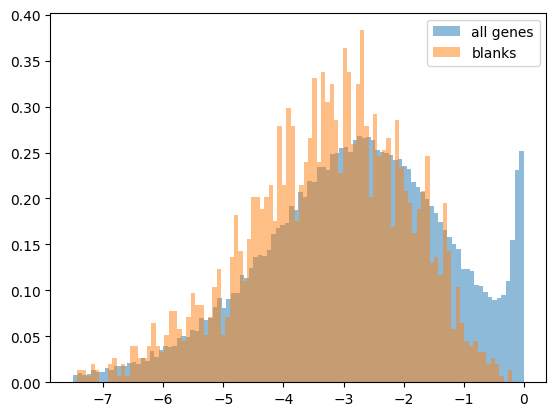

In [77]:
get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs=None,th_min=-7.5,include_dbits=True)

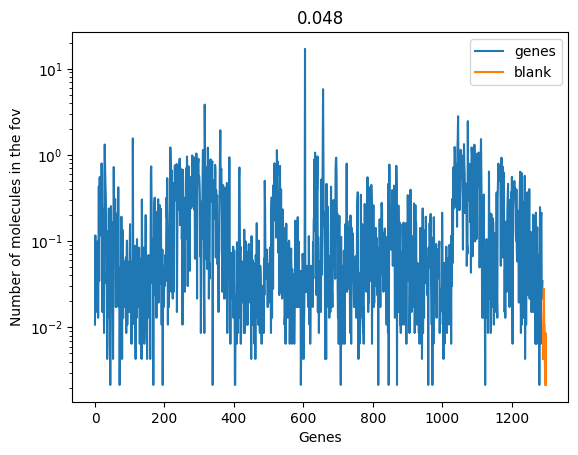

In [86]:
dec.th = -1
plot_statistics(dec)

In [108]:
dec.XH_pruned.shape

(15766311, 4, 10)

In [107]:
keep = dec.scoreA>-3
keepReg = [ign for ign,gn in enumerate(dec.gns_names) if 'chr10_50297882_50948743' in gn]
ekeep = np.in1d(dec.icodesN[keep],keepReg)
XC = np.nanmean(dec.XH_pruned[keep][ekeep],axis=1)[:,:3]
napari.view_points(XC,size=2)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1386.3914187749226, 1384.2921104431155), zoom=0.41751895658860105, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(24.09507554769516, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((-0.9049244523048401, 48.94511604309082, 1.0), (-20.90995216369629, 2794.6927897135415, 1.0), (-24.500577290852863, 2794.0847981770835, 1.0)), current_step=(25, 1407, 1409), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Points layer 'XC' at 0x291ef2dafa0>], scale_bar=ScaleBar(visible=False, colored=False, color=array([1., 0., 1., 1.], dtype=float32), ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, box=False, box_color=array([0. , 0. , 0. , 0.6], dtype=float32), unit=None), text_overlay=T

In [67]:
scores_ref_fl = save_folder+os.sep+r'scoresRefV2.pkl'
pickle.dump(scoresRefT,open(scores_ref_fl,'wb'))
print(scores_ref_fl)

\\merfish10.ucsd.edu\volume1\RNA_ANALYSIS_D111\scoresRefV2.pkl


In [36]:
from ioMicro import *

In [24]:
XH_fs=keep_best_per_cell_fast(dec.XH_f,nbest=20)

In [27]:
len(XH_fs),len(dec.XH_f)

(270652, 298645)

In [45]:
X = np.nanmean(dec.XH_f[:,:,:3],axis=1)
from scipy.spatial import KDTree
tree = KDTree(X)

Loaded decoded: -24.947842836380005


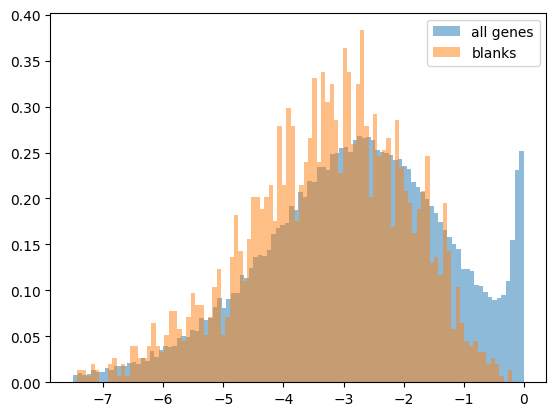

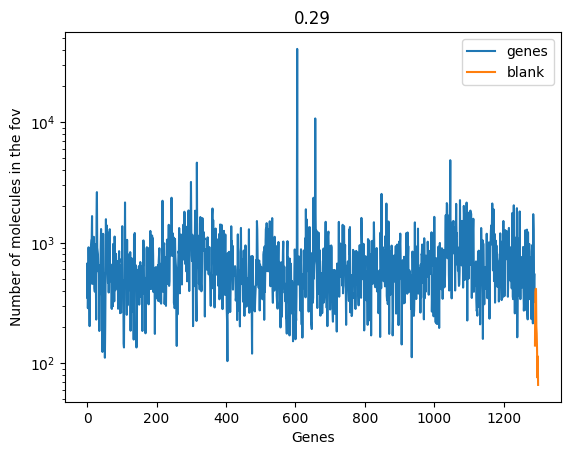

In [47]:
dec = main_f(fov=fov,th=-7,force=True)

In [48]:
np.mean(np.nanmean(dec.XH_f[:,:,-1],axis=1)>0)

0.930743350405806

In [49]:
from ioMicroPostFits import *
def keep_best_per_cell_fastComb(XH_f,nbest=20):
    ###sort molecules by brightness and keep only within cells (CELLs>0)
    XH_f_ = XH_f.copy()
    H = np.nanmean(XH_f_[:,:,-5],axis=1) #brightness
    XH_f_ = XH_f[np.argsort(H)]
    CELLs = np.nanmean(XH_f_[:,:,-1],axis=1).astype(int) #cell index
    keep = CELLs>0
    XH_f_ = XH_f_[keep]
    
    
    #################################
    CELLs = np.nanmean(XH_f_[:,:,-1],axis=1).astype(int) #cell index
    H = np.nanmean(XH_f_[:,:,-5],axis=1) #brightness
    ### find index combining cell id an redout id
    Rs = np.nanmean(XH_f_[:,:,-2],axis=1).astype(int) #region
    
    
    
    
    cellsu = np.unique(CELLs)
    Rsu = np.unique(Rs)
    MR = np.max(Rsu)+1
    mix_index = CELLs*MR+Rs ### unique index combining cell and readout info
    
    #### find the inverse and prealocate space that you fill cyclically
    miu,rinv = np.unique(mix_index,return_inverse=True)
    miu_,cts_ = np.unique(mix_index,return_counts=True)

    
    XH_f_pruned = np.zeros([len(miu),nbest,XH_f.shape[1],XH_f.shape[2]],dtype=XH_f.dtype)+np.nan
    ind_best = np.argsort(np.argsort(rinv))%nbest
    XH_f_pruned[rinv,ind_best,:,:]=XH_f_######
    XH_f_pruned = XH_f_pruned.reshape([-1,XH_f_pruned.shape[-2],XH_f_pruned.shape[-1]])
    good = ~np.all(np.isnan(XH_f_pruned)[:,:,0],axis=1)
    XH_f_pruned = XH_f_pruned[good]
    return XH_f_pruned
def get_XComb(XH_fsTB,cell,pix=[0.3,0.10833,0.10833]):
    XH_cell = XH_fsTB[XH_fsTB[:,0,-1]==cell]
    hs = np.nanmean(XH_cell[:,:,-5],1)
    Xs = np.nanmean(XH_cell[:,:,:3]*pix,axis=1)
    Rs = XH_cell[:,0,-2]
    icols = XH_cell[:,0,-4]
    return Xs,hs,Rs,icols
def get_X(XH_fsTB,cell,pix=[0.3,0.10833,0.10833]):
    XH_cell = XH_fsTB[XH_fsTB[:,-1]==cell]
    hs = XH_cell[:,-5]
    Xs = XH_cell[:,:3]*pix
    Rs = XH_cell[:,-2]
    icols = XH_cell[:,-4]
    return Xs,hs,Rs,icols
def get_X_cands(self,XH_fs,nchr_=2,pix=[0.300,0.1083,0.1083],
                     radius_chr = 2,radius_cand =3,fr_th=0.4,nelems=2,plt_val = False):
        self.pix = pix
        XH_fsTB = keep_best_per_cell_fastComb(XH_fs,nbest=nelems)
        XH_fsTB = np.nanmean(XH_fsTB,axis=1)
        cells = get_cells(XH_fsTB)
        self.cells = cells
        X_cands = []
        icell_cands = []
        for icell in tqdm(cells):
            Xs,hs,Rs,icols = get_X(XH_fsTB,icell,pix=pix)
            Rs = Rs-np.min(Rs)
            X_chrs = determine_number_of_chromosomes(Xs,hs,Rs,nchr_=nchr_,radius_chr = radius_chr,fr_th=fr_th,plt_val=False)
            
            
            if len(X_chrs)>0:
                XH_fs_ = np.nanmean(XH_fs,axis=1)
                Xs,hs,Rs,icols = get_X(XH_fs_,icell,pix=pix)
                Rs = Rs-np.min(Rs)
                mat = cdist(X_chrs,Xs)
                nchr = len(X_chrs)
                best_asign = np.argmin(mat,axis=0)

                for ichr in range(nchr):
                    keep = (best_asign==ichr)&(mat[ichr]<radius_cand)
                    X_cands_ = np.array([Xs[keep,0],Xs[keep,1],Xs[keep,2],hs[keep],hs[keep],icols[keep],Rs[keep]]).T
                    X_cands.append(X_cands_)
                    icell_cands.append(icell)

        self.X_cands =X_cands
        self.icell_cands=icell_cands


        print("Detected number of chromosomes:" + str(len(self.icell_cands)))
        ploidy,ncells = np.unique(np.unique(self.icell_cands,return_counts=True)[-1],return_counts=True)
        for pl,nc in zip(ploidy,ncells):
            print("Number of cells with "+str(pl) +" chromosomes: "+str(nc))
class Dummy:
    pass
dummy = Dummy()

In [29]:
gene_names = dec.gns_names
dic_chrs = {}
for ign,gn_name in enumerate(gene_names):
    if 'blank' not in gn_name:
        loc_nm = '_'.join(gn_name.split('_')[:3])
        if loc_nm not in dic_chrs: dic_chrs[loc_nm]=[]
        dic_chrs[loc_nm].append(ign)

In [123]:
pickle.dump(dec.gns_names,open('genes_names.pkl','wb'))

In [50]:
save_fld_f = os.path.dirname(save_folder)+os.sep+'best_per_cellComb'
files = glob.glob(save_fld_f+os.sep+'*.npz')
element = files[0]
region_tag = list(dic_chrs.keys())[0]
save_flf= element.replace('.npz','_'+region_tag+'_traces.npz')
print("Saving to:",save_flf)
XH_fso = np.load(element)['XH_fs']

Saving to: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\best_per_cellComb\Conv_zscan__200.zarr__XHfs_finedrft_chr10_50297882_50948743_traces.npz


In [51]:
XH_fso.shape

(859281, 4, 12)

In [58]:
XH_fs

array([[[ 4.10253525e+00, -1.18317842e+00,  1.01052783e+03, ...,
          1.10000000e+01,  0.00000000e+00,  1.00000000e+00],
        [ 4.34651995e+00, -8.62417221e-01,  1.01076221e+03, ...,
          2.90000000e+01,  1.22600000e+03,  1.00000000e+00],
        [ 3.50070906e+00, -1.57577419e+00,  1.01037939e+03, ...,
          4.10000000e+01,  1.22600000e+03,  1.00000000e+00],
        [ 3.96382499e+00, -1.86086655e+00,  1.01115210e+03, ...,
          5.00000000e+01,  1.22600000e+03,  1.00000000e+00]],

       [[            nan,             nan,             nan, ...,
                     nan,  2.00000000e+00,  1.00000000e+00],
        [ 6.43745279e+00,  1.99555931e+01,  9.92008484e+02, ...,
          5.80000000e+01,  1.22800000e+03,  1.00000000e+00],
        [ 5.39783621e+00,  1.93179626e+01,  9.92438599e+02, ...,
          6.70000000e+01,  1.22800000e+03,  1.00000000e+00],
        [ 5.31032562e+00,  1.93419361e+01,  9.93500427e+02, ...,
          7.60000000e+01,  1.22800000e+03,  1.00000

Saving to: \\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\best_per_cellComb\Conv_zscan__200.zarr__XHfs_finedrft_chr11_22408906_22969049_traces.npz


100%|████████████████████████████████████████████████████████████████████████████████| 425/425 [00:06<00:00, 63.44it/s]


Detected number of chromosomes:286
Number of cells with 1 chromosomes: 170
Number of cells with 2 chromosomes: 55
Number of cells with 3 chromosomes: 2


100%|██████████████████████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 1562.83it/s]


EM iteration number:  1


100%|███████████████████████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 708.76it/s]


fraction the same: 0.9952547452547452
fraction nan: 0.8608266733266733
EM iteration number:  2


100%|███████████████████████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 566.33it/s]


fraction the same: 0.999438061938062
fraction nan: 0.8608266733266733
EM iteration number:  3


100%|███████████████████████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 556.09it/s]


fraction the same: 0.9998751248751249
fraction nan: 0.8608266733266733
EM iteration number:  4


100%|███████████████████████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 928.81it/s]


fraction the same: 0.9999375624375625
fraction nan: 0.8608266733266733


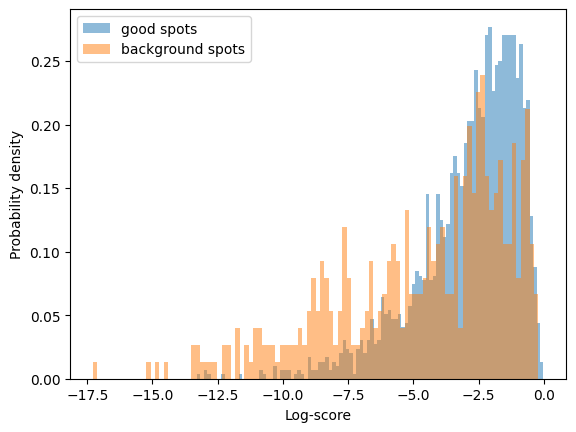

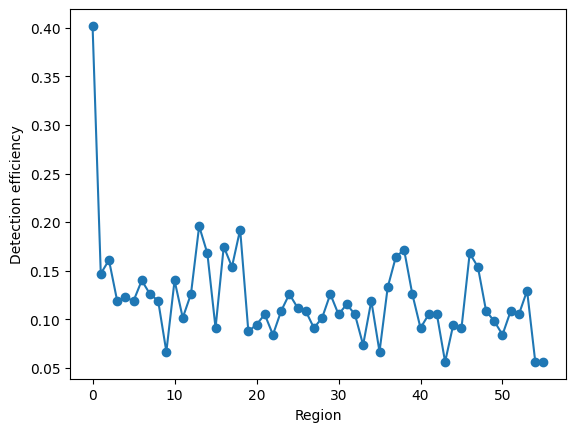

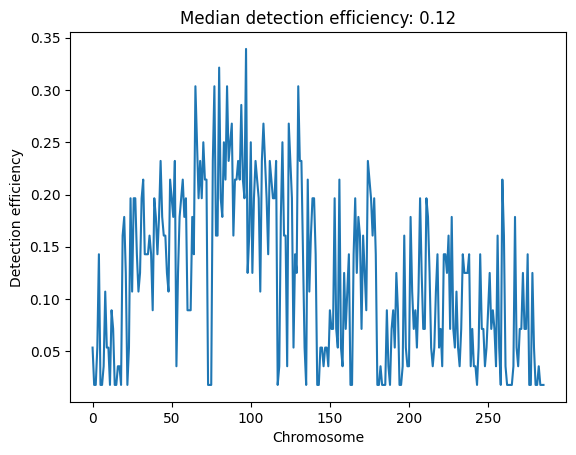

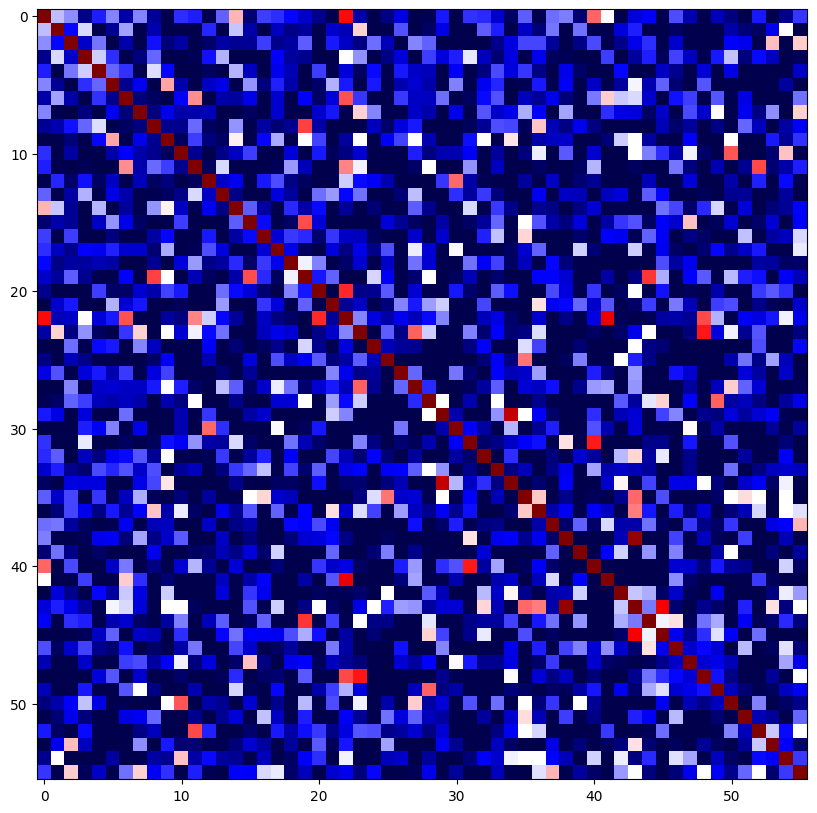

ValueError: invalid literal for int() with base 10: '200.zarr'

In [59]:
region_tag = list(dic_chrs.keys())[1]
save_flf= element.replace('.npz','_'+region_tag+'_traces.npz')
print("Saving to:",save_flf)
XH_fso = np.load(element)['XH_fs']
cp=Dummy()
XH_fs = XH_fso.copy()
Rs = XH_fs[:,0,-2]#.astype(int)
ind_Rs = dic_chrs[region_tag]
keep = np.in1d(Rs,ind_Rs)
XH_fs=XH_fs[keep]
Rs = XH_fs[:,0,-2]
XH_fs[:,0,-2]=Rs-np.min(Rs)

get_X_cands(cp,XH_fs,nchr_=3,pix=[0.300,0.1083,0.1083],  # 10 is the top number of candidates per cell
            radius_chr = 2,radius_cand =2.,fr_th=0.35,nelems=3,plt_val = False) ################### nelems - the number of spots per cell conisdered for homolog separation
Rs = np.unique(XH_fs[:,0,-2])
uRs = np.arange(np.max(Rs)+1).astype(int)#np.unique(Rs).astype(int)
initialize_with_max_brightness(cp,nkeep = 8000,Rs_u = uRs)
normalize_color_brightnesses(cp)
run_EM(cp,nkeep = 80000,niter = 4,Rs_u = uRs)
get_scores_and_threshold(cp,th_score = -5)
plot_matrix(cp,th_score=-5,lazy_color_correction = True,vmin=0,vmax=1.5)
plt.show()

cells = cp.icell_cands
def get_fov(fl): return int(os.path.basename(fl).split('__X')[0].split('__')[-1])
ifov = get_fov(element)
cells_f = np.array(cells)+ifov*10**5

np.savez(save_flf,zxys_f = cp.zxys_f,hs_f = cp.hs_f,cells_f=cells_f,scores_f=cp.scores_f)
print("Final Selection complete for", element)

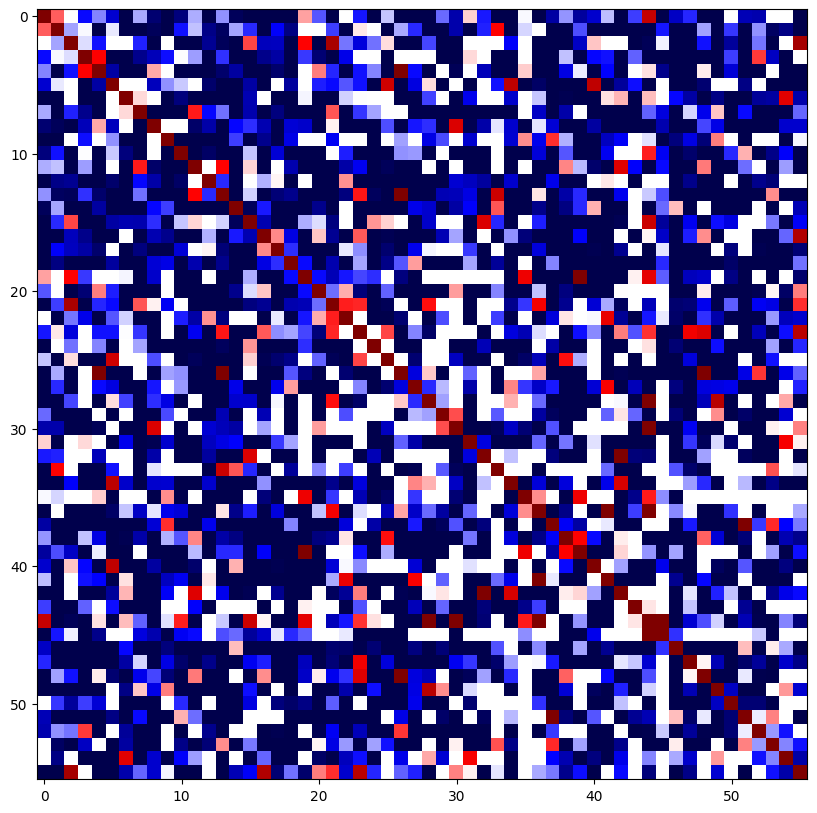

In [60]:
plot_matrix(cp,th_score=-2.5,lazy_color_correction = True,vmin=0,vmax=1.)

In [ ]:
fl_save = r'\\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\AnalysisDeconvolveCG_fixed\decodedNew_Conv_zscan__200--.npz'


### Perform cell segmentation

In [8]:
def compute_mask(file,segm_folder,model='nuclei',cell_diameter=17,psf = np.load(r'D:\Carlos\Scripts/psfs/psf_750_Scope4_final.npy'),
                 deconvolve=True,save=True,max_image = 0,snorm=0,cell_vol_min=1000,
                 flat_field_fl = r'D:\Carlos\Scripts/flat_field/Scope4_med_col_raw3.npz',redo=False,plt_val=False):
    if not os.path.exists(segm_folder): os.makedirs(segm_folder)
    save_fl  = segm_folder+os.sep+os.path.basename(file).split('.')[0]+'--'+os.path.basename(os.path.dirname(file))+'--CYTO_segm.npz'
    print("Working on : " + save_fl)
    masks_,tensor,cast = None,None,None
    if not os.path.exists(save_fl) or redo:
        #load image
        load = read_im(file)
        #cast image
        cast = np.array(load[-1],dtype=np.float32)#####mistake
        ### Flat field correct
        im_med = np.load(flat_field_fl)['im']
        im_med = cv2.blur(im_med,(2,2))
        cast = cast/im_med*np.median(im_med)
        tensor = cast
        if deconvolve:
            #using psf and getting tensor
            #tensor = full_deconv(cast,s_=500,pad=100,psf=psf,parameters={'method': 'lucy',  'niter': 30},gpu=True,force=False)
            tensor = full_deconv(cast,s_=500,pad=100,psf=psf,parameters={'method': 'wiener',  'beta': 0.01},gpu=True,force=False)
        if snorm>0:
            tensor = norm_slice(cast,snorm)
        #running the cellpose:
        #step 4 is running the cell i was working with last week.
        use_gpu = True
        def blur(tensor,s=100):
            return np.array([cv2.blur(im_,(s,s)) for im_ in tensor],dtype=np.float32)
        from cellpose import models,io,utils
        model = models.Cellpose(gpu=use_gpu, model_type=model)
        #img = tensor[:,::4,::4]
        #img = blur(tensor,2)[::4,::4,::4]
        img = tensor[::2,::3,::3]
        if max_image==0:
            img_final = img#np.clip(img/max_image,0,1)
            normalize=True
        else:
            img_final = np.clip(img/max_image,0,1)
            normalize=False
        masks, flows, styles, diams = model.eval(img_final,z_axis=0, 
                                                 diameter=cell_diameter, 
                                                 channels=[0,0],do_3D=False,
                                                 normalize=normalize,
                                                 flow_threshold=-10,
                                                 cellprob_threshold=-10,stitch_threshold=0.5,min_size=100) 
        masks_=masks
        shape = np.array(tensor.shape)
        if cell_vol_min>0:
            cellids,cts = np.unique(masks,return_counts=True)
            masks_ = replace_mat(masks,cellids[cts<cell_vol_min],0)
            
        if plt_val:
            import napari
            V = napari.view_image(img_final);#[[len(img_final)//2]]
            V.add_labels(masks_)
        if save:
            #step 5: saving the mask and shape in the appropriate location
            np.savez_compressed(save_fl,segm = masks_,shape = shape)
    return masks_,tensor,cast

In [4]:
import glob
import sys
sys.path.append(r'../')
from ioMicro import *
path = r'\\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\H1_DMER_1\*zarr'
files = np.sort(glob.glob(path))#[926:1126]

In [5]:
len(files)

511

In [ ]:
file = files[100]
for file in tqdm(files):
    try:
        mask,tensor,cast = compute_mask(file,segm_folder=r'\\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation')
    except:
        print("Failed:",file)

 17%|█████████████▎                                                                  | 85/511 [00:00<00:01, 423.41it/s]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__000--H1_DMER_1--CYTO_segm.npz
Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__001--H1_DMER_1--CYTO_segm.npz
Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__002--H1_DMER_1--CYTO_segm.npz
Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__003--H1_DMER_1--CYTO_segm.npz
Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__004--H1_DMER_1--CYTO_segm.npz
Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__005--H1_DMER_1--CYTO_segm.npz
Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__006--H1_DMER_1--CYTO_segm.npz
Working on : \\merfish13.ucsd.edu\


 20%|███████████████▉                                                                | 102/511 [00:54<05:25,  1.26it/s]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__102--H1_DMER_1--CYTO_segm.npz



 20%|████████████████▏                                                               | 103/511 [01:38<11:30,  1.69s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__103--H1_DMER_1--CYTO_segm.npz



 20%|████████████████▎                                                               | 104/511 [02:23<19:51,  2.93s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__104--H1_DMER_1--CYTO_segm.npz



 21%|████████████████▍                                                               | 105/511 [03:08<31:03,  4.59s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__105--H1_DMER_1--CYTO_segm.npz



 21%|████████████████▌                                                               | 106/511 [03:49<43:57,  6.51s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__106--H1_DMER_1--CYTO_segm.npz



 21%|████████████████▎                                                             | 107/511 [04:40<1:04:49,  9.63s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__107--H1_DMER_1--CYTO_segm.npz



 21%|████████████████▍                                                             | 108/511 [05:28<1:28:39, 13.20s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__108--H1_DMER_1--CYTO_segm.npz



 21%|████████████████▋                                                             | 109/511 [06:18<1:56:37, 17.41s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__109--H1_DMER_1--CYTO_segm.npz



 22%|████████████████▊                                                             | 110/511 [07:11<2:30:15, 22.48s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__110--H1_DMER_1--CYTO_segm.npz



 22%|████████████████▉                                                             | 111/511 [07:53<2:51:57, 25.79s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__111--H1_DMER_1--CYTO_segm.npz



 22%|█████████████████                                                             | 112/511 [08:32<3:08:56, 28.41s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__112--H1_DMER_1--CYTO_segm.npz



 22%|█████████████████▏                                                            | 113/511 [09:10<3:22:15, 30.49s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__113--H1_DMER_1--CYTO_segm.npz



 22%|█████████████████▍                                                            | 114/511 [09:54<3:41:25, 33.47s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__114--H1_DMER_1--CYTO_segm.npz



 23%|█████████████████▌                                                            | 115/511 [10:46<4:13:14, 38.37s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__115--H1_DMER_1--CYTO_segm.npz



 23%|█████████████████▋                                                            | 116/511 [11:33<4:26:53, 40.54s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__116--H1_DMER_1--CYTO_segm.npz



 23%|█████████████████▊                                                            | 117/511 [12:11<4:22:31, 39.98s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__117--H1_DMER_1--CYTO_segm.npz



 23%|██████████████████                                                            | 118/511 [12:57<4:32:12, 41.56s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__118--H1_DMER_1--CYTO_segm.npz



 23%|██████████████████▏                                                           | 119/511 [13:41<4:35:24, 42.15s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__119--H1_DMER_1--CYTO_segm.npz



 23%|██████████████████▎                                                           | 120/511 [14:20<4:29:39, 41.38s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__120--H1_DMER_1--CYTO_segm.npz



 24%|██████████████████▍                                                           | 121/511 [15:00<4:25:48, 40.89s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__121--H1_DMER_1--CYTO_segm.npz



 24%|██████████████████▌                                                           | 122/511 [15:37<4:17:12, 39.67s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__122--H1_DMER_1--CYTO_segm.npz



 24%|██████████████████▊                                                           | 123/511 [16:18<4:19:04, 40.06s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__123--H1_DMER_1--CYTO_segm.npz



 24%|██████████████████▉                                                           | 124/511 [16:54<4:11:26, 38.98s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__124--H1_DMER_1--CYTO_segm.npz



 24%|███████████████████                                                           | 125/511 [17:32<4:08:25, 38.62s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__125--H1_DMER_1--CYTO_segm.npz



 25%|███████████████████▏                                                          | 126/511 [18:10<4:06:45, 38.46s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__126--H1_DMER_1--CYTO_segm.npz



 25%|███████████████████▍                                                          | 127/511 [18:48<4:04:40, 38.23s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__127--H1_DMER_1--CYTO_segm.npz



 25%|███████████████████▌                                                          | 128/511 [19:26<4:04:00, 38.23s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__128--H1_DMER_1--CYTO_segm.npz



 25%|███████████████████▋                                                          | 129/511 [20:07<4:09:21, 39.17s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__129--H1_DMER_1--CYTO_segm.npz



 25%|███████████████████▊                                                          | 130/511 [20:50<4:16:17, 40.36s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__130--H1_DMER_1--CYTO_segm.npz



 26%|███████████████████▉                                                          | 131/511 [21:33<4:19:46, 41.02s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__131--H1_DMER_1--CYTO_segm.npz



 26%|████████████████████▏                                                         | 132/511 [22:16<4:23:49, 41.77s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__132--H1_DMER_1--CYTO_segm.npz



 26%|████████████████████▎                                                         | 133/511 [22:56<4:19:28, 41.19s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__133--H1_DMER_1--CYTO_segm.npz



 26%|████████████████████▍                                                         | 134/511 [23:38<4:19:41, 41.33s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__134--H1_DMER_1--CYTO_segm.npz



 26%|████████████████████▌                                                         | 135/511 [24:21<4:21:59, 41.81s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__135--H1_DMER_1--CYTO_segm.npz



 27%|████████████████████▊                                                         | 136/511 [25:02<4:19:12, 41.47s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__136--H1_DMER_1--CYTO_segm.npz



 27%|████████████████████▉                                                         | 137/511 [25:41<4:14:09, 40.77s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__137--H1_DMER_1--CYTO_segm.npz



 27%|█████████████████████                                                         | 138/511 [26:22<4:13:41, 40.81s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__138--H1_DMER_1--CYTO_segm.npz



 27%|█████████████████████▏                                                        | 139/511 [27:03<4:14:05, 40.98s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__139--H1_DMER_1--CYTO_segm.npz



 27%|█████████████████████▎                                                        | 140/511 [27:43<4:11:51, 40.73s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__140--H1_DMER_1--CYTO_segm.npz



 28%|█████████████████████▌                                                        | 141/511 [28:23<4:10:15, 40.58s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__141--H1_DMER_1--CYTO_segm.npz



 28%|█████████████████████▋                                                        | 142/511 [29:05<4:10:59, 40.81s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__142--H1_DMER_1--CYTO_segm.npz



 28%|█████████████████████▊                                                        | 143/511 [29:43<4:05:07, 39.97s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__143--H1_DMER_1--CYTO_segm.npz



 28%|█████████████████████▉                                                        | 144/511 [30:23<4:06:01, 40.22s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__144--H1_DMER_1--CYTO_segm.npz



 28%|██████████████████████▏                                                       | 145/511 [31:02<4:03:04, 39.85s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__145--H1_DMER_1--CYTO_segm.npz



 29%|██████████████████████▎                                                       | 146/511 [31:41<4:00:35, 39.55s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__146--H1_DMER_1--CYTO_segm.npz



 29%|██████████████████████▍                                                       | 147/511 [32:23<4:02:58, 40.05s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__147--H1_DMER_1--CYTO_segm.npz



 29%|██████████████████████▌                                                       | 148/511 [33:01<4:00:18, 39.72s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__148--H1_DMER_1--CYTO_segm.npz



 29%|██████████████████████▋                                                       | 149/511 [33:41<3:59:00, 39.61s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__149--H1_DMER_1--CYTO_segm.npz



 29%|██████████████████████▉                                                       | 150/511 [34:20<3:57:23, 39.45s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__150--H1_DMER_1--CYTO_segm.npz



 30%|███████████████████████                                                       | 151/511 [35:03<4:02:33, 40.43s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__151--H1_DMER_1--CYTO_segm.npz



 30%|███████████████████████▏                                                      | 152/511 [35:42<3:59:32, 40.03s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__152--H1_DMER_1--CYTO_segm.npz



 30%|███████████████████████▎                                                      | 153/511 [36:23<4:01:55, 40.54s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__153--H1_DMER_1--CYTO_segm.npz



 30%|███████████████████████▌                                                      | 154/511 [37:07<4:06:25, 41.42s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__154--H1_DMER_1--CYTO_segm.npz



 30%|███████████████████████▋                                                      | 155/511 [37:51<4:10:15, 42.18s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__155--H1_DMER_1--CYTO_segm.npz



 31%|███████████████████████▊                                                      | 156/511 [38:33<4:09:13, 42.12s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__156--H1_DMER_1--CYTO_segm.npz



 31%|███████████████████████▉                                                      | 157/511 [39:15<4:09:09, 42.23s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__157--H1_DMER_1--CYTO_segm.npz



 31%|████████████████████████                                                      | 158/511 [39:56<4:05:21, 41.70s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__158--H1_DMER_1--CYTO_segm.npz



 31%|████████████████████████▎                                                     | 159/511 [40:43<4:13:33, 43.22s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__159--H1_DMER_1--CYTO_segm.npz



 31%|████████████████████████▍                                                     | 160/511 [41:27<4:14:32, 43.51s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__160--H1_DMER_1--CYTO_segm.npz



 32%|████████████████████████▌                                                     | 161/511 [42:12<4:16:36, 43.99s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__161--H1_DMER_1--CYTO_segm.npz



 32%|████████████████████████▋                                                     | 162/511 [42:55<4:14:00, 43.67s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__162--H1_DMER_1--CYTO_segm.npz



 32%|████████████████████████▉                                                     | 163/511 [43:37<4:10:28, 43.18s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__163--H1_DMER_1--CYTO_segm.npz



 32%|█████████████████████████                                                     | 164/511 [44:19<4:07:38, 42.82s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__164--H1_DMER_1--CYTO_segm.npz



 32%|█████████████████████████▏                                                    | 165/511 [45:02<4:07:24, 42.90s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__165--H1_DMER_1--CYTO_segm.npz



 32%|█████████████████████████▎                                                    | 166/511 [45:48<4:11:36, 43.76s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__166--H1_DMER_1--CYTO_segm.npz



 33%|█████████████████████████▍                                                    | 167/511 [46:29<4:06:00, 42.91s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__167--H1_DMER_1--CYTO_segm.npz



 33%|█████████████████████████▋                                                    | 168/511 [47:12<4:05:28, 42.94s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__168--H1_DMER_1--CYTO_segm.npz



 33%|█████████████████████████▊                                                    | 169/511 [47:55<4:06:04, 43.17s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__169--H1_DMER_1--CYTO_segm.npz



 33%|█████████████████████████▉                                                    | 170/511 [48:46<4:18:01, 45.40s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__170--H1_DMER_1--CYTO_segm.npz



 33%|██████████████████████████                                                    | 171/511 [49:29<4:12:44, 44.60s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__171--H1_DMER_1--CYTO_segm.npz



 34%|██████████████████████████▎                                                   | 172/511 [50:10<4:06:02, 43.55s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__172--H1_DMER_1--CYTO_segm.npz



 34%|██████████████████████████▍                                                   | 173/511 [50:51<4:01:08, 42.80s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__173--H1_DMER_1--CYTO_segm.npz



 34%|██████████████████████████▌                                                   | 174/511 [51:36<4:04:54, 43.60s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__174--H1_DMER_1--CYTO_segm.npz



 34%|██████████████████████████▋                                                   | 175/511 [52:21<4:05:17, 43.80s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__175--H1_DMER_1--CYTO_segm.npz



 34%|██████████████████████████▊                                                   | 176/511 [53:06<4:07:29, 44.33s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__176--H1_DMER_1--CYTO_segm.npz



 35%|███████████████████████████                                                   | 177/511 [53:52<4:10:06, 44.93s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__177--H1_DMER_1--CYTO_segm.npz



 35%|███████████████████████████▏                                                  | 178/511 [54:38<4:10:49, 45.20s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__178--H1_DMER_1--CYTO_segm.npz



 35%|███████████████████████████▎                                                  | 179/511 [55:23<4:08:33, 44.92s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__179--H1_DMER_1--CYTO_segm.npz



 35%|███████████████████████████▍                                                  | 180/511 [56:07<4:07:42, 44.90s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__180--H1_DMER_1--CYTO_segm.npz



 35%|███████████████████████████▋                                                  | 181/511 [56:50<4:03:12, 44.22s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__181--H1_DMER_1--CYTO_segm.npz



 36%|███████████████████████████▊                                                  | 182/511 [57:31<3:57:05, 43.24s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__182--H1_DMER_1--CYTO_segm.npz



 36%|███████████████████████████▉                                                  | 183/511 [58:15<3:58:06, 43.56s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__183--H1_DMER_1--CYTO_segm.npz



 36%|████████████████████████████                                                  | 184/511 [59:01<4:00:05, 44.05s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__184--H1_DMER_1--CYTO_segm.npz



 36%|████████████████████████████▏                                                 | 185/511 [59:42<3:55:12, 43.29s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__185--H1_DMER_1--CYTO_segm.npz



 36%|███████████████████████████▋                                                | 186/511 [1:00:25<3:54:28, 43.29s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__186--H1_DMER_1--CYTO_segm.npz



 37%|███████████████████████████▊                                                | 187/511 [1:01:10<3:56:30, 43.80s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__187--H1_DMER_1--CYTO_segm.npz



 37%|███████████████████████████▉                                                | 188/511 [1:02:00<4:04:40, 45.45s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__188--H1_DMER_1--CYTO_segm.npz



 37%|████████████████████████████                                                | 189/511 [1:02:44<4:02:22, 45.16s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__189--H1_DMER_1--CYTO_segm.npz



 37%|████████████████████████████▎                                               | 190/511 [1:03:29<4:01:34, 45.15s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__190--H1_DMER_1--CYTO_segm.npz



 37%|████████████████████████████▍                                               | 191/511 [1:04:15<4:01:16, 45.24s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__191--H1_DMER_1--CYTO_segm.npz



 38%|████████████████████████████▌                                               | 192/511 [1:04:59<3:59:14, 45.00s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__192--H1_DMER_1--CYTO_segm.npz



 38%|████████████████████████████▋                                               | 193/511 [1:05:38<3:49:31, 43.31s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__193--H1_DMER_1--CYTO_segm.npz



 38%|████████████████████████████▊                                               | 194/511 [1:06:20<3:46:03, 42.79s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__194--H1_DMER_1--CYTO_segm.npz



 38%|█████████████████████████████                                               | 195/511 [1:07:04<3:47:20, 43.17s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__195--H1_DMER_1--CYTO_segm.npz



 38%|█████████████████████████████▏                                              | 196/511 [1:07:48<3:47:59, 43.43s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__196--H1_DMER_1--CYTO_segm.npz



 39%|█████████████████████████████▎                                              | 197/511 [1:08:31<3:46:48, 43.34s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__197--H1_DMER_1--CYTO_segm.npz



 39%|█████████████████████████████▍                                              | 198/511 [1:09:14<3:45:14, 43.18s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__198--H1_DMER_1--CYTO_segm.npz



 39%|█████████████████████████████▌                                              | 199/511 [1:10:00<3:48:12, 43.89s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__199--H1_DMER_1--CYTO_segm.npz



 39%|█████████████████████████████▉                                              | 201/511 [1:10:42<2:37:37, 30.51s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__200--H1_DMER_1--CYTO_segm.npz
Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__201--H1_DMER_1--CYTO_segm.npz



 40%|██████████████████████████████                                              | 202/511 [1:11:27<2:58:50, 34.72s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__202--H1_DMER_1--CYTO_segm.npz



 40%|██████████████████████████████▏                                             | 203/511 [1:12:07<3:07:07, 36.45s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__203--H1_DMER_1--CYTO_segm.npz



 40%|██████████████████████████████▎                                             | 204/511 [1:12:48<3:12:20, 37.59s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__204--H1_DMER_1--CYTO_segm.npz



 40%|██████████████████████████████▍                                             | 205/511 [1:13:28<3:16:13, 38.48s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__205--H1_DMER_1--CYTO_segm.npz



 40%|██████████████████████████████▋                                             | 206/511 [1:14:10<3:20:45, 39.49s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__206--H1_DMER_1--CYTO_segm.npz



 41%|██████████████████████████████▊                                             | 207/511 [1:14:50<3:20:27, 39.56s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__207--H1_DMER_1--CYTO_segm.npz



 41%|██████████████████████████████▉                                             | 208/511 [1:15:39<3:34:32, 42.48s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__208--H1_DMER_1--CYTO_segm.npz



 41%|███████████████████████████████                                             | 209/511 [1:16:35<3:53:48, 46.45s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__209--H1_DMER_1--CYTO_segm.npz



 41%|███████████████████████████████▏                                            | 210/511 [1:17:33<4:10:54, 50.02s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__210--H1_DMER_1--CYTO_segm.npz



 41%|███████████████████████████████▍                                            | 211/511 [1:18:32<4:23:12, 52.64s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__211--H1_DMER_1--CYTO_segm.npz



 41%|███████████████████████████████▌                                            | 212/511 [1:19:16<4:08:57, 49.96s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__212--H1_DMER_1--CYTO_segm.npz



 42%|███████████████████████████████▋                                            | 213/511 [1:20:12<4:17:31, 51.85s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__213--H1_DMER_1--CYTO_segm.npz



 42%|███████████████████████████████▊                                            | 214/511 [1:21:03<4:15:49, 51.68s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__214--H1_DMER_1--CYTO_segm.npz



 42%|███████████████████████████████▉                                            | 215/511 [1:21:56<4:17:04, 52.11s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__215--H1_DMER_1--CYTO_segm.npz



 42%|████████████████████████████████▏                                           | 216/511 [1:22:46<4:12:27, 51.35s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__216--H1_DMER_1--CYTO_segm.npz



 42%|████████████████████████████████▎                                           | 217/511 [1:23:33<4:05:31, 50.11s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__217--H1_DMER_1--CYTO_segm.npz



 43%|████████████████████████████████▍                                           | 218/511 [1:24:21<4:01:59, 49.56s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__218--H1_DMER_1--CYTO_segm.npz



 43%|████████████████████████████████▌                                           | 219/511 [1:25:10<4:00:11, 49.36s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__219--H1_DMER_1--CYTO_segm.npz



 43%|████████████████████████████████▋                                           | 220/511 [1:25:58<3:57:39, 49.00s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__220--H1_DMER_1--CYTO_segm.npz



 43%|████████████████████████████████▊                                           | 221/511 [1:26:38<3:42:30, 46.04s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__221--H1_DMER_1--CYTO_segm.npz



 43%|█████████████████████████████████                                           | 222/511 [1:27:19<3:35:22, 44.71s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__222--H1_DMER_1--CYTO_segm.npz



 44%|█████████████████████████████████▏                                          | 223/511 [1:27:57<3:25:06, 42.73s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__223--H1_DMER_1--CYTO_segm.npz



 44%|█████████████████████████████████▎                                          | 224/511 [1:28:37<3:20:02, 41.82s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__224--H1_DMER_1--CYTO_segm.npz



 44%|█████████████████████████████████▍                                          | 225/511 [1:29:18<3:18:14, 41.59s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__225--H1_DMER_1--CYTO_segm.npz



 44%|█████████████████████████████████▌                                          | 226/511 [1:29:57<3:13:49, 40.80s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__226--H1_DMER_1--CYTO_segm.npz



 44%|█████████████████████████████████▊                                          | 227/511 [1:30:37<3:11:45, 40.51s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__227--H1_DMER_1--CYTO_segm.npz



 45%|█████████████████████████████████▉                                          | 228/511 [1:31:17<3:10:37, 40.42s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__228--H1_DMER_1--CYTO_segm.npz



 45%|██████████████████████████████████                                          | 229/511 [1:31:57<3:09:34, 40.33s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__229--H1_DMER_1--CYTO_segm.npz



 45%|██████████████████████████████████▏                                         | 230/511 [1:32:39<3:11:08, 40.81s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__230--H1_DMER_1--CYTO_segm.npz



 45%|██████████████████████████████████▎                                         | 231/511 [1:33:18<3:07:48, 40.24s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__231--H1_DMER_1--CYTO_segm.npz



 45%|██████████████████████████████████▌                                         | 232/511 [1:33:56<3:04:00, 39.57s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__232--H1_DMER_1--CYTO_segm.npz



 46%|██████████████████████████████████▋                                         | 233/511 [1:34:34<3:00:50, 39.03s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__233--H1_DMER_1--CYTO_segm.npz



 46%|██████████████████████████████████▊                                         | 234/511 [1:35:12<2:58:59, 38.77s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__234--H1_DMER_1--CYTO_segm.npz



 46%|██████████████████████████████████▉                                         | 235/511 [1:35:52<3:00:26, 39.23s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__235--H1_DMER_1--CYTO_segm.npz



 46%|███████████████████████████████████                                         | 236/511 [1:36:34<3:02:50, 39.89s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__236--H1_DMER_1--CYTO_segm.npz



 46%|███████████████████████████████████▏                                        | 237/511 [1:37:18<3:08:40, 41.32s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__237--H1_DMER_1--CYTO_segm.npz



 47%|███████████████████████████████████▍                                        | 238/511 [1:37:59<3:07:37, 41.24s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__238--H1_DMER_1--CYTO_segm.npz



 47%|███████████████████████████████████▌                                        | 239/511 [1:38:46<3:14:10, 42.83s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__239--H1_DMER_1--CYTO_segm.npz



 47%|███████████████████████████████████▋                                        | 240/511 [1:39:30<3:15:30, 43.29s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__240--H1_DMER_1--CYTO_segm.npz



 47%|███████████████████████████████████▊                                        | 241/511 [1:40:12<3:12:59, 42.89s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__241--H1_DMER_1--CYTO_segm.npz



 47%|███████████████████████████████████▉                                        | 242/511 [1:40:51<3:07:07, 41.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__242--H1_DMER_1--CYTO_segm.npz



 48%|████████████████████████████████████▏                                       | 243/511 [1:41:31<3:04:18, 41.26s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__243--H1_DMER_1--CYTO_segm.npz



 48%|████████████████████████████████████▎                                       | 244/511 [1:42:12<3:02:28, 41.01s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__244--H1_DMER_1--CYTO_segm.npz



 48%|████████████████████████████████████▍                                       | 245/511 [1:42:53<3:02:38, 41.20s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__245--H1_DMER_1--CYTO_segm.npz



 48%|████████████████████████████████████▌                                       | 246/511 [1:43:37<3:04:57, 41.88s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__246--H1_DMER_1--CYTO_segm.npz



 48%|████████████████████████████████████▋                                       | 247/511 [1:44:23<3:09:40, 43.11s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__247--H1_DMER_1--CYTO_segm.npz



 49%|████████████████████████████████████▉                                       | 248/511 [1:45:04<3:06:07, 42.46s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__248--H1_DMER_1--CYTO_segm.npz



 49%|█████████████████████████████████████                                       | 249/511 [1:45:44<3:02:23, 41.77s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__249--H1_DMER_1--CYTO_segm.npz



 49%|█████████████████████████████████████▏                                      | 250/511 [1:46:24<2:59:11, 41.19s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__250--H1_DMER_1--CYTO_segm.npz



 49%|█████████████████████████████████████▎                                      | 251/511 [1:47:04<2:56:31, 40.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__251--H1_DMER_1--CYTO_segm.npz



 49%|█████████████████████████████████████▍                                      | 252/511 [1:47:44<2:55:49, 40.73s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__252--H1_DMER_1--CYTO_segm.npz



 50%|█████████████████████████████████████▋                                      | 253/511 [1:48:23<2:53:10, 40.27s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__253--H1_DMER_1--CYTO_segm.npz



 50%|█████████████████████████████████████▊                                      | 254/511 [1:49:03<2:51:23, 40.01s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__254--H1_DMER_1--CYTO_segm.npz



 50%|█████████████████████████████████████▉                                      | 255/511 [1:49:42<2:50:12, 39.89s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__255--H1_DMER_1--CYTO_segm.npz



 50%|██████████████████████████████████████                                      | 256/511 [1:50:32<3:01:51, 42.79s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__256--H1_DMER_1--CYTO_segm.npz



 50%|██████████████████████████████████████▏                                     | 257/511 [1:51:12<2:57:21, 41.90s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__257--H1_DMER_1--CYTO_segm.npz



 50%|██████████████████████████████████████▎                                     | 258/511 [1:51:55<2:58:21, 42.30s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__258--H1_DMER_1--CYTO_segm.npz



 51%|██████████████████████████████████████▌                                     | 259/511 [1:52:36<2:55:46, 41.85s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__259--H1_DMER_1--CYTO_segm.npz



 51%|██████████████████████████████████████▋                                     | 260/511 [1:53:25<3:03:45, 43.93s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__260--H1_DMER_1--CYTO_segm.npz



 51%|██████████████████████████████████████▊                                     | 261/511 [1:54:11<3:05:53, 44.62s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__261--H1_DMER_1--CYTO_segm.npz



 51%|██████████████████████████████████████▉                                     | 262/511 [1:54:57<3:07:04, 45.08s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__262--H1_DMER_1--CYTO_segm.npz



 51%|███████████████████████████████████████                                     | 263/511 [1:55:45<3:10:27, 46.08s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__263--H1_DMER_1--CYTO_segm.npz



 52%|███████████████████████████████████████▎                                    | 264/511 [1:56:30<3:07:50, 45.63s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__264--H1_DMER_1--CYTO_segm.npz



 52%|███████████████████████████████████████▍                                    | 265/511 [1:57:20<3:12:18, 46.90s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__265--H1_DMER_1--CYTO_segm.npz



 52%|███████████████████████████████████████▌                                    | 266/511 [1:58:04<3:08:16, 46.11s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__266--H1_DMER_1--CYTO_segm.npz



 52%|███████████████████████████████████████▋                                    | 267/511 [1:58:50<3:07:04, 46.00s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__267--H1_DMER_1--CYTO_segm.npz



 52%|███████████████████████████████████████▊                                    | 268/511 [1:59:34<3:03:33, 45.32s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__268--H1_DMER_1--CYTO_segm.npz



 53%|████████████████████████████████████████                                    | 269/511 [2:00:17<3:00:42, 44.80s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__269--H1_DMER_1--CYTO_segm.npz



 53%|████████████████████████████████████████▏                                   | 270/511 [2:01:04<3:02:14, 45.37s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__270--H1_DMER_1--CYTO_segm.npz



 53%|████████████████████████████████████████▎                                   | 271/511 [2:01:47<2:58:52, 44.72s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__271--H1_DMER_1--CYTO_segm.npz



 53%|████████████████████████████████████████▍                                   | 272/511 [2:02:32<2:58:12, 44.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__272--H1_DMER_1--CYTO_segm.npz



 53%|████████████████████████████████████████▌                                   | 273/511 [2:03:13<2:52:52, 43.58s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__273--H1_DMER_1--CYTO_segm.npz



 54%|████████████████████████████████████████▊                                   | 274/511 [2:03:57<2:53:18, 43.88s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__274--H1_DMER_1--CYTO_segm.npz



 54%|████████████████████████████████████████▉                                   | 275/511 [2:04:40<2:50:30, 43.35s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__275--H1_DMER_1--CYTO_segm.npz



 54%|█████████████████████████████████████████                                   | 276/511 [2:05:20<2:46:42, 42.56s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__276--H1_DMER_1--CYTO_segm.npz



 54%|█████████████████████████████████████████▏                                  | 277/511 [2:06:04<2:47:12, 42.88s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__277--H1_DMER_1--CYTO_segm.npz



 54%|█████████████████████████████████████████▎                                  | 278/511 [2:06:45<2:44:52, 42.46s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__278--H1_DMER_1--CYTO_segm.npz



 55%|█████████████████████████████████████████▍                                  | 279/511 [2:07:30<2:46:40, 43.11s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__279--H1_DMER_1--CYTO_segm.npz



 55%|█████████████████████████████████████████▋                                  | 280/511 [2:08:11<2:43:03, 42.35s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__280--H1_DMER_1--CYTO_segm.npz



 55%|█████████████████████████████████████████▊                                  | 281/511 [2:08:55<2:44:35, 42.94s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__281--H1_DMER_1--CYTO_segm.npz



 55%|█████████████████████████████████████████▉                                  | 282/511 [2:09:36<2:41:45, 42.38s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__282--H1_DMER_1--CYTO_segm.npz



 55%|██████████████████████████████████████████                                  | 283/511 [2:10:21<2:43:37, 43.06s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__283--H1_DMER_1--CYTO_segm.npz



 56%|██████████████████████████████████████████▏                                 | 284/511 [2:11:02<2:41:23, 42.66s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__284--H1_DMER_1--CYTO_segm.npz



 56%|██████████████████████████████████████████▍                                 | 285/511 [2:11:45<2:40:14, 42.54s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__285--H1_DMER_1--CYTO_segm.npz



 56%|██████████████████████████████████████████▌                                 | 286/511 [2:12:26<2:37:52, 42.10s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__286--H1_DMER_1--CYTO_segm.npz



 56%|██████████████████████████████████████████▋                                 | 287/511 [2:13:06<2:35:14, 41.58s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__287--H1_DMER_1--CYTO_segm.npz



 56%|██████████████████████████████████████████▊                                 | 288/511 [2:13:44<2:31:01, 40.63s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__288--H1_DMER_1--CYTO_segm.npz



 57%|██████████████████████████████████████████▉                                 | 289/511 [2:14:23<2:28:10, 40.05s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__289--H1_DMER_1--CYTO_segm.npz



 57%|███████████████████████████████████████████▏                                | 290/511 [2:15:01<2:25:11, 39.42s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__290--H1_DMER_1--CYTO_segm.npz



 57%|███████████████████████████████████████████▎                                | 291/511 [2:15:43<2:27:49, 40.32s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__291--H1_DMER_1--CYTO_segm.npz



 57%|███████████████████████████████████████████▍                                | 292/511 [2:16:22<2:25:13, 39.79s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__292--H1_DMER_1--CYTO_segm.npz



 57%|███████████████████████████████████████████▌                                | 293/511 [2:17:05<2:28:03, 40.75s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__293--H1_DMER_1--CYTO_segm.npz



 58%|███████████████████████████████████████████▋                                | 294/511 [2:17:43<2:24:09, 39.86s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__294--H1_DMER_1--CYTO_segm.npz



 58%|███████████████████████████████████████████▊                                | 295/511 [2:18:24<2:25:09, 40.32s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__295--H1_DMER_1--CYTO_segm.npz



 58%|████████████████████████████████████████████                                | 296/511 [2:19:02<2:22:07, 39.66s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__296--H1_DMER_1--CYTO_segm.npz



 58%|████████████████████████████████████████████▏                               | 297/511 [2:19:42<2:21:58, 39.81s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__297--H1_DMER_1--CYTO_segm.npz



 58%|████████████████████████████████████████████▎                               | 298/511 [2:20:21<2:19:38, 39.34s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__298--H1_DMER_1--CYTO_segm.npz



 59%|████████████████████████████████████████████▍                               | 299/511 [2:20:59<2:17:45, 38.99s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__299--H1_DMER_1--CYTO_segm.npz



 59%|████████████████████████████████████████████▌                               | 300/511 [2:21:44<2:23:14, 40.73s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__300--H1_DMER_1--CYTO_segm.npz


 59%|████████████████████████████████████████████▊                               | 301/511 [2:21:44<1:40:25, 28.69s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__301--H1_DMER_1--CYTO_segm.npz


 59%|████████████████████████████████████████████▉                               | 302/511 [2:22:24<1:51:13, 31.93s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__302--H1_DMER_1--CYTO_segm.npz



 59%|█████████████████████████████████████████████                               | 303/511 [2:23:01<1:55:53, 33.43s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__303--H1_DMER_1--CYTO_segm.npz



 59%|█████████████████████████████████████████████▏                              | 304/511 [2:23:46<2:07:18, 36.90s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__304--H1_DMER_1--CYTO_segm.npz



 60%|█████████████████████████████████████████████▎                              | 305/511 [2:24:27<2:10:43, 38.07s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__305--H1_DMER_1--CYTO_segm.npz



 60%|█████████████████████████████████████████████▌                              | 306/511 [2:25:11<2:16:15, 39.88s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__306--H1_DMER_1--CYTO_segm.npz



 60%|█████████████████████████████████████████████▋                              | 307/511 [2:25:56<2:21:05, 41.50s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__307--H1_DMER_1--CYTO_segm.npz



 60%|█████████████████████████████████████████████▊                              | 308/511 [2:26:40<2:22:42, 42.18s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__308--H1_DMER_1--CYTO_segm.npz



 60%|█████████████████████████████████████████████▉                              | 309/511 [2:27:31<2:30:58, 44.85s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__309--H1_DMER_1--CYTO_segm.npz



 61%|██████████████████████████████████████████████                              | 310/511 [2:28:22<2:36:34, 46.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__310--H1_DMER_1--CYTO_segm.npz



 61%|██████████████████████████████████████████████▎                             | 311/511 [2:29:09<2:35:44, 46.72s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__311--H1_DMER_1--CYTO_segm.npz



 61%|██████████████████████████████████████████████▍                             | 312/511 [2:29:57<2:36:17, 47.12s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__312--H1_DMER_1--CYTO_segm.npz



 61%|██████████████████████████████████████████████▌                             | 313/511 [2:30:42<2:33:51, 46.63s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__313--H1_DMER_1--CYTO_segm.npz



 61%|██████████████████████████████████████████████▋                             | 314/511 [2:31:27<2:31:19, 46.09s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__314--H1_DMER_1--CYTO_segm.npz



 62%|██████████████████████████████████████████████▊                             | 315/511 [2:32:20<2:37:43, 48.28s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__315--H1_DMER_1--CYTO_segm.npz



 62%|██████████████████████████████████████████████▉                             | 316/511 [2:33:10<2:38:29, 48.77s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__316--H1_DMER_1--CYTO_segm.npz



 62%|███████████████████████████████████████████████▏                            | 317/511 [2:34:01<2:39:43, 49.40s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__317--H1_DMER_1--CYTO_segm.npz



 62%|███████████████████████████████████████████████▎                            | 318/511 [2:34:47<2:35:47, 48.43s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__318--H1_DMER_1--CYTO_segm.npz



 62%|███████████████████████████████████████████████▍                            | 319/511 [2:35:36<2:35:11, 48.50s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__319--H1_DMER_1--CYTO_segm.npz



 63%|███████████████████████████████████████████████▌                            | 320/511 [2:36:30<2:39:35, 50.13s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__320--H1_DMER_1--CYTO_segm.npz



 63%|███████████████████████████████████████████████▋                            | 321/511 [2:37:11<2:30:16, 47.46s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__321--H1_DMER_1--CYTO_segm.npz



 63%|███████████████████████████████████████████████▉                            | 322/511 [2:37:53<2:24:41, 45.93s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__322--H1_DMER_1--CYTO_segm.npz



 63%|████████████████████████████████████████████████                            | 323/511 [2:38:47<2:30:44, 48.11s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__323--H1_DMER_1--CYTO_segm.npz



 63%|████████████████████████████████████████████████▏                           | 324/511 [2:39:45<2:39:43, 51.25s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__324--H1_DMER_1--CYTO_segm.npz



 64%|████████████████████████████████████████████████▎                           | 325/511 [2:40:37<2:39:28, 51.44s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__325--H1_DMER_1--CYTO_segm.npz



 64%|████████████████████████████████████████████████▍                           | 326/511 [2:41:35<2:44:10, 53.25s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__326--H1_DMER_1--CYTO_segm.npz



 64%|████████████████████████████████████████████████▋                           | 327/511 [2:42:32<2:47:11, 54.52s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__327--H1_DMER_1--CYTO_segm.npz



 64%|████████████████████████████████████████████████▊                           | 328/511 [2:43:11<2:31:37, 49.71s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__328--H1_DMER_1--CYTO_segm.npz



 64%|████████████████████████████████████████████████▉                           | 329/511 [2:43:57<2:27:50, 48.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__329--H1_DMER_1--CYTO_segm.npz



 65%|█████████████████████████████████████████████████                           | 330/511 [2:44:50<2:31:13, 50.13s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__330--H1_DMER_1--CYTO_segm.npz



 65%|█████████████████████████████████████████████████▏                          | 331/511 [2:45:47<2:36:31, 52.17s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__331--H1_DMER_1--CYTO_segm.npz



 65%|█████████████████████████████████████████████████▍                          | 332/511 [2:46:45<2:40:26, 53.78s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__332--H1_DMER_1--CYTO_segm.npz



 65%|█████████████████████████████████████████████████▌                          | 333/511 [2:47:46<2:46:29, 56.12s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__333--H1_DMER_1--CYTO_segm.npz



 65%|█████████████████████████████████████████████████▋                          | 334/511 [2:48:47<2:49:23, 57.42s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__334--H1_DMER_1--CYTO_segm.npz



 66%|█████████████████████████████████████████████████▊                          | 335/511 [2:49:44<2:48:27, 57.43s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__335--H1_DMER_1--CYTO_segm.npz



 66%|█████████████████████████████████████████████████▉                          | 336/511 [2:50:40<2:46:09, 56.97s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__336--H1_DMER_1--CYTO_segm.npz



 66%|██████████████████████████████████████████████████                          | 337/511 [2:51:28<2:36:47, 54.07s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__337--H1_DMER_1--CYTO_segm.npz



 66%|██████████████████████████████████████████████████▎                         | 338/511 [2:52:21<2:35:29, 53.93s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__338--H1_DMER_1--CYTO_segm.npz



 66%|██████████████████████████████████████████████████▍                         | 339/511 [2:53:04<2:24:48, 50.52s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__339--H1_DMER_1--CYTO_segm.npz



 67%|██████████████████████████████████████████████████▌                         | 340/511 [2:53:42<2:13:53, 46.98s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__340--H1_DMER_1--CYTO_segm.npz



 67%|██████████████████████████████████████████████████▋                         | 341/511 [2:54:24<2:08:06, 45.21s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__341--H1_DMER_1--CYTO_segm.npz



 67%|██████████████████████████████████████████████████▊                         | 342/511 [2:55:05<2:04:11, 44.09s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__342--H1_DMER_1--CYTO_segm.npz



 67%|███████████████████████████████████████████████████                         | 343/511 [2:55:44<1:59:14, 42.58s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__343--H1_DMER_1--CYTO_segm.npz



 67%|███████████████████████████████████████████████████▏                        | 344/511 [2:56:22<1:54:32, 41.15s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__344--H1_DMER_1--CYTO_segm.npz



 68%|███████████████████████████████████████████████████▎                        | 345/511 [2:57:04<1:54:17, 41.31s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__345--H1_DMER_1--CYTO_segm.npz



 68%|███████████████████████████████████████████████████▍                        | 346/511 [2:57:43<1:52:21, 40.86s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__346--H1_DMER_1--CYTO_segm.npz



 68%|███████████████████████████████████████████████████▌                        | 347/511 [2:58:23<1:50:37, 40.47s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__347--H1_DMER_1--CYTO_segm.npz



 68%|███████████████████████████████████████████████████▊                        | 348/511 [2:59:02<1:48:54, 40.09s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__348--H1_DMER_1--CYTO_segm.npz



 68%|███████████████████████████████████████████████████▉                        | 349/511 [2:59:44<1:49:42, 40.63s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__349--H1_DMER_1--CYTO_segm.npz



 68%|████████████████████████████████████████████████████                        | 350/511 [3:00:23<1:47:34, 40.09s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__350--H1_DMER_1--CYTO_segm.npz



 69%|████████████████████████████████████████████████████▏                       | 351/511 [3:01:05<1:48:48, 40.80s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__351--H1_DMER_1--CYTO_segm.npz



 69%|████████████████████████████████████████████████████▎                       | 352/511 [3:01:50<1:51:09, 41.95s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__352--H1_DMER_1--CYTO_segm.npz



 69%|████████████████████████████████████████████████████▌                       | 353/511 [3:02:34<1:52:05, 42.57s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__353--H1_DMER_1--CYTO_segm.npz



 69%|████████████████████████████████████████████████████▋                       | 354/511 [3:03:17<1:51:51, 42.75s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__354--H1_DMER_1--CYTO_segm.npz



 69%|████████████████████████████████████████████████████▊                       | 355/511 [3:04:08<1:57:22, 45.14s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__355--H1_DMER_1--CYTO_segm.npz



 70%|████████████████████████████████████████████████████▉                       | 356/511 [3:05:05<2:05:54, 48.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__356--H1_DMER_1--CYTO_segm.npz



 70%|█████████████████████████████████████████████████████                       | 357/511 [3:06:02<2:11:45, 51.33s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__357--H1_DMER_1--CYTO_segm.npz



 70%|█████████████████████████████████████████████████████▏                      | 358/511 [3:07:03<2:17:42, 54.00s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__358--H1_DMER_1--CYTO_segm.npz



 70%|█████████████████████████████████████████████████████▍                      | 359/511 [3:08:02<2:21:11, 55.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__359--H1_DMER_1--CYTO_segm.npz



 70%|█████████████████████████████████████████████████████▌                      | 360/511 [3:09:02<2:23:02, 56.84s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__360--H1_DMER_1--CYTO_segm.npz



 71%|█████████████████████████████████████████████████████▋                      | 361/511 [3:09:58<2:21:34, 56.63s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__361--H1_DMER_1--CYTO_segm.npz



 71%|█████████████████████████████████████████████████████▊                      | 362/511 [3:10:53<2:19:44, 56.27s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__362--H1_DMER_1--CYTO_segm.npz



 71%|█████████████████████████████████████████████████████▉                      | 363/511 [3:11:43<2:13:51, 54.27s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__363--H1_DMER_1--CYTO_segm.npz



 71%|██████████████████████████████████████████████████████▏                     | 364/511 [3:12:37<2:12:41, 54.16s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__364--H1_DMER_1--CYTO_segm.npz



 71%|██████████████████████████████████████████████████████▎                     | 365/511 [3:13:15<2:00:14, 49.41s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__365--H1_DMER_1--CYTO_segm.npz



 72%|██████████████████████████████████████████████████████▍                     | 366/511 [3:13:56<1:53:04, 46.79s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__366--H1_DMER_1--CYTO_segm.npz



 72%|██████████████████████████████████████████████████████▌                     | 367/511 [3:14:49<1:56:35, 48.58s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__367--H1_DMER_1--CYTO_segm.npz



 72%|██████████████████████████████████████████████████████▋                     | 368/511 [3:15:42<1:59:06, 49.97s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__368--H1_DMER_1--CYTO_segm.npz



 72%|██████████████████████████████████████████████████████▉                     | 369/511 [3:16:35<2:00:31, 50.93s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__369--H1_DMER_1--CYTO_segm.npz



 72%|███████████████████████████████████████████████████████                     | 370/511 [3:17:28<2:01:01, 51.50s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__370--H1_DMER_1--CYTO_segm.npz



 73%|███████████████████████████████████████████████████████▏                    | 371/511 [3:18:13<1:55:59, 49.71s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__371--H1_DMER_1--CYTO_segm.npz



 73%|███████████████████████████████████████████████████████▎                    | 372/511 [3:19:00<1:52:39, 48.63s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__372--H1_DMER_1--CYTO_segm.npz



 73%|███████████████████████████████████████████████████████▍                    | 373/511 [3:19:46<1:50:03, 47.85s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__373--H1_DMER_1--CYTO_segm.npz



 73%|███████████████████████████████████████████████████████▌                    | 374/511 [3:20:34<1:49:34, 47.99s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__374--H1_DMER_1--CYTO_segm.npz



 73%|███████████████████████████████████████████████████████▊                    | 375/511 [3:21:14<1:43:08, 45.50s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__375--H1_DMER_1--CYTO_segm.npz



 74%|███████████████████████████████████████████████████████▉                    | 376/511 [3:22:02<1:44:39, 46.52s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__376--H1_DMER_1--CYTO_segm.npz



 74%|████████████████████████████████████████████████████████                    | 377/511 [3:22:56<1:48:47, 48.71s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__377--H1_DMER_1--CYTO_segm.npz



 74%|████████████████████████████████████████████████████████▏                   | 378/511 [3:23:55<1:54:48, 51.79s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__378--H1_DMER_1--CYTO_segm.npz



 74%|████████████████████████████████████████████████████████▎                   | 379/511 [3:24:53<1:57:57, 53.62s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__379--H1_DMER_1--CYTO_segm.npz



 74%|████████████████████████████████████████████████████████▌                   | 380/511 [3:25:37<1:50:50, 50.77s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__380--H1_DMER_1--CYTO_segm.npz



 75%|████████████████████████████████████████████████████████▋                   | 381/511 [3:26:23<1:46:50, 49.31s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__381--H1_DMER_1--CYTO_segm.npz



 75%|████████████████████████████████████████████████████████▊                   | 382/511 [3:27:28<1:55:55, 53.92s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__382--H1_DMER_1--CYTO_segm.npz



 75%|████████████████████████████████████████████████████████▉                   | 383/511 [3:28:35<2:03:16, 57.79s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__383--H1_DMER_1--CYTO_segm.npz



 75%|█████████████████████████████████████████████████████████                   | 384/511 [3:29:32<2:01:48, 57.54s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__384--H1_DMER_1--CYTO_segm.npz



 75%|█████████████████████████████████████████████████████████▎                  | 385/511 [3:30:31<2:01:59, 58.09s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__385--H1_DMER_1--CYTO_segm.npz



 76%|█████████████████████████████████████████████████████████▍                  | 386/511 [3:31:29<2:01:00, 58.08s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__386--H1_DMER_1--CYTO_segm.npz



 76%|█████████████████████████████████████████████████████████▌                  | 387/511 [3:32:24<1:57:50, 57.02s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__387--H1_DMER_1--CYTO_segm.npz



 76%|█████████████████████████████████████████████████████████▋                  | 388/511 [3:33:23<1:58:33, 57.83s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__388--H1_DMER_1--CYTO_segm.npz



 76%|█████████████████████████████████████████████████████████▊                  | 389/511 [3:34:05<1:47:45, 53.00s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__389--H1_DMER_1--CYTO_segm.npz



 76%|██████████████████████████████████████████████████████████                  | 390/511 [3:34:44<1:38:08, 48.66s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__390--H1_DMER_1--CYTO_segm.npz



 77%|██████████████████████████████████████████████████████████▏                 | 391/511 [3:35:24<1:32:28, 46.24s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__391--H1_DMER_1--CYTO_segm.npz



 77%|██████████████████████████████████████████████████████████▎                 | 392/511 [3:36:06<1:29:08, 44.95s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__392--H1_DMER_1--CYTO_segm.npz



 77%|██████████████████████████████████████████████████████████▍                 | 393/511 [3:36:48<1:26:22, 43.92s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__393--H1_DMER_1--CYTO_segm.npz



 77%|██████████████████████████████████████████████████████████▌                 | 394/511 [3:37:29<1:24:15, 43.21s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__394--H1_DMER_1--CYTO_segm.npz



 77%|██████████████████████████████████████████████████████████▋                 | 395/511 [3:38:08<1:21:16, 42.04s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__395--H1_DMER_1--CYTO_segm.npz



 77%|██████████████████████████████████████████████████████████▉                 | 396/511 [3:38:49<1:19:56, 41.71s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__396--H1_DMER_1--CYTO_segm.npz



 78%|███████████████████████████████████████████████████████████                 | 397/511 [3:39:28<1:17:31, 40.81s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__397--H1_DMER_1--CYTO_segm.npz



 78%|███████████████████████████████████████████████████████████▏                | 398/511 [3:40:10<1:17:14, 41.01s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__398--H1_DMER_1--CYTO_segm.npz



 78%|███████████████████████████████████████████████████████████▎                | 399/511 [3:40:52<1:17:32, 41.54s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__399--H1_DMER_1--CYTO_segm.npz



 78%|███████████████████████████████████████████████████████████▍                | 400/511 [3:41:29<1:13:51, 39.93s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__400--H1_DMER_1--CYTO_segm.npz



 78%|███████████████████████████████████████████████████████████▋                | 401/511 [3:42:09<1:13:12, 39.94s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__401--H1_DMER_1--CYTO_segm.npz



 79%|███████████████████████████████████████████████████████████▊                | 402/511 [3:42:50<1:13:24, 40.41s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__402--H1_DMER_1--CYTO_segm.npz



 79%|███████████████████████████████████████████████████████████▉                | 403/511 [3:43:33<1:13:54, 41.06s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__403--H1_DMER_1--CYTO_segm.npz



 79%|████████████████████████████████████████████████████████████                | 404/511 [3:44:18<1:15:32, 42.36s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__404--H1_DMER_1--CYTO_segm.npz



 79%|████████████████████████████████████████████████████████████▏               | 405/511 [3:45:00<1:14:44, 42.31s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__405--H1_DMER_1--CYTO_segm.npz



 79%|████████████████████████████████████████████████████████████▍               | 406/511 [3:45:42<1:13:44, 42.14s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__406--H1_DMER_1--CYTO_segm.npz



 80%|████████████████████████████████████████████████████████████▌               | 407/511 [3:46:21<1:11:39, 41.34s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__407--H1_DMER_1--CYTO_segm.npz



 80%|████████████████████████████████████████████████████████████▋               | 408/511 [3:47:01<1:09:53, 40.72s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__408--H1_DMER_1--CYTO_segm.npz



 80%|████████████████████████████████████████████████████████████▊               | 409/511 [3:47:41<1:09:12, 40.72s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__409--H1_DMER_1--CYTO_segm.npz



 80%|████████████████████████████████████████████████████████████▉               | 410/511 [3:48:22<1:08:22, 40.62s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__410--H1_DMER_1--CYTO_segm.npz



 80%|█████████████████████████████████████████████████████████████▏              | 411/511 [3:49:07<1:09:58, 41.99s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__411--H1_DMER_1--CYTO_segm.npz



 81%|█████████████████████████████████████████████████████████████▎              | 412/511 [3:49:44<1:06:58, 40.59s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__412--H1_DMER_1--CYTO_segm.npz



 81%|█████████████████████████████████████████████████████████████▍              | 413/511 [3:50:35<1:11:14, 43.61s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__413--H1_DMER_1--CYTO_segm.npz



 81%|█████████████████████████████████████████████████████████████▌              | 414/511 [3:51:37<1:19:39, 49.27s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__414--H1_DMER_1--CYTO_segm.npz



 81%|█████████████████████████████████████████████████████████████▋              | 415/511 [3:52:35<1:22:44, 51.72s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__415--H1_DMER_1--CYTO_segm.npz



 81%|█████████████████████████████████████████████████████████████▊              | 416/511 [3:53:24<1:20:30, 50.84s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__416--H1_DMER_1--CYTO_segm.npz



 82%|██████████████████████████████████████████████████████████████              | 417/511 [3:54:20<1:22:19, 52.54s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__417--H1_DMER_1--CYTO_segm.npz



 82%|██████████████████████████████████████████████████████████████▏             | 418/511 [3:55:15<1:22:37, 53.31s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__418--H1_DMER_1--CYTO_segm.npz



 82%|██████████████████████████████████████████████████████████████▎             | 419/511 [3:56:06<1:20:23, 52.42s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__419--H1_DMER_1--CYTO_segm.npz



 82%|██████████████████████████████████████████████████████████████▍             | 420/511 [3:57:03<1:21:46, 53.92s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__420--H1_DMER_1--CYTO_segm.npz



 82%|██████████████████████████████████████████████████████████████▌             | 421/511 [3:58:05<1:24:37, 56.41s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__421--H1_DMER_1--CYTO_segm.npz



 83%|██████████████████████████████████████████████████████████████▊             | 422/511 [3:59:08<1:26:17, 58.18s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__422--H1_DMER_1--CYTO_segm.npz



 83%|██████████████████████████████████████████████████████████████▉             | 423/511 [3:59:58<1:22:06, 55.98s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__423--H1_DMER_1--CYTO_segm.npz



 83%|███████████████████████████████████████████████████████████████             | 424/511 [4:00:53<1:20:30, 55.53s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__424--H1_DMER_1--CYTO_segm.npz



 83%|███████████████████████████████████████████████████████████████▏            | 425/511 [4:01:34<1:13:28, 51.26s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__425--H1_DMER_1--CYTO_segm.npz



 83%|███████████████████████████████████████████████████████████████▎            | 426/511 [4:02:19<1:09:51, 49.31s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__426--H1_DMER_1--CYTO_segm.npz



 84%|███████████████████████████████████████████████████████████████▌            | 427/511 [4:03:04<1:07:26, 48.18s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__427--H1_DMER_1--CYTO_segm.npz



 84%|███████████████████████████████████████████████████████████████▋            | 428/511 [4:03:47<1:04:23, 46.55s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__428--H1_DMER_1--CYTO_segm.npz



 84%|███████████████████████████████████████████████████████████████▊            | 429/511 [4:04:29<1:01:47, 45.22s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__429--H1_DMER_1--CYTO_segm.npz



 84%|█████████████████████████████████████████████████████████████████▋            | 430/511 [4:05:11<59:26, 44.03s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__430--H1_DMER_1--CYTO_segm.npz



 84%|█████████████████████████████████████████████████████████████████▊            | 431/511 [4:05:49<56:16, 42.20s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__431--H1_DMER_1--CYTO_segm.npz



 85%|█████████████████████████████████████████████████████████████████▉            | 432/511 [4:06:27<54:02, 41.05s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__432--H1_DMER_1--CYTO_segm.npz



 85%|██████████████████████████████████████████████████████████████████            | 433/511 [4:07:07<52:57, 40.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__433--H1_DMER_1--CYTO_segm.npz



 85%|██████████████████████████████████████████████████████████████████▏           | 434/511 [4:07:46<51:50, 40.39s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__434--H1_DMER_1--CYTO_segm.npz



 85%|██████████████████████████████████████████████████████████████████▍           | 435/511 [4:08:24<49:56, 39.43s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__435--H1_DMER_1--CYTO_segm.npz



 85%|██████████████████████████████████████████████████████████████████▌           | 436/511 [4:09:02<48:48, 39.05s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__436--H1_DMER_1--CYTO_segm.npz



 86%|██████████████████████████████████████████████████████████████████▋           | 437/511 [4:09:46<50:01, 40.56s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__437--H1_DMER_1--CYTO_segm.npz



 86%|██████████████████████████████████████████████████████████████████▊           | 438/511 [4:10:27<49:26, 40.63s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__438--H1_DMER_1--CYTO_segm.npz



 86%|███████████████████████████████████████████████████████████████████           | 439/511 [4:11:11<50:05, 41.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__439--H1_DMER_1--CYTO_segm.npz



 86%|███████████████████████████████████████████████████████████████████▏          | 440/511 [4:11:59<51:26, 43.47s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__440--H1_DMER_1--CYTO_segm.npz



 86%|███████████████████████████████████████████████████████████████████▎          | 441/511 [4:12:44<51:16, 43.96s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__441--H1_DMER_1--CYTO_segm.npz



 86%|███████████████████████████████████████████████████████████████████▍          | 442/511 [4:13:26<49:54, 43.40s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__442--H1_DMER_1--CYTO_segm.npz



 87%|███████████████████████████████████████████████████████████████████▌          | 443/511 [4:14:06<48:09, 42.50s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__443--H1_DMER_1--CYTO_segm.npz



 87%|███████████████████████████████████████████████████████████████████▊          | 444/511 [4:14:47<46:49, 41.93s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__444--H1_DMER_1--CYTO_segm.npz



 87%|███████████████████████████████████████████████████████████████████▉          | 445/511 [4:15:32<47:14, 42.95s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__445--H1_DMER_1--CYTO_segm.npz



 87%|████████████████████████████████████████████████████████████████████          | 446/511 [4:16:14<46:03, 42.52s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__446--H1_DMER_1--CYTO_segm.npz



 87%|████████████████████████████████████████████████████████████████████▏         | 447/511 [4:16:54<44:46, 41.98s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__447--H1_DMER_1--CYTO_segm.npz



 88%|████████████████████████████████████████████████████████████████████▍         | 448/511 [4:17:36<43:53, 41.81s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__448--H1_DMER_1--CYTO_segm.npz



 88%|████████████████████████████████████████████████████████████████████▌         | 449/511 [4:18:18<43:19, 41.92s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__449--H1_DMER_1--CYTO_segm.npz



 88%|████████████████████████████████████████████████████████████████████▋         | 450/511 [4:18:58<42:00, 41.32s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__450--H1_DMER_1--CYTO_segm.npz



 88%|████████████████████████████████████████████████████████████████████▊         | 451/511 [4:19:38<40:52, 40.87s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__451--H1_DMER_1--CYTO_segm.npz



 88%|████████████████████████████████████████████████████████████████████▉         | 452/511 [4:20:23<41:31, 42.23s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__452--H1_DMER_1--CYTO_segm.npz



 89%|█████████████████████████████████████████████████████████████████████▏        | 453/511 [4:21:03<40:07, 41.50s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__453--H1_DMER_1--CYTO_segm.npz



 89%|█████████████████████████████████████████████████████████████████████▎        | 454/511 [4:21:45<39:35, 41.68s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__454--H1_DMER_1--CYTO_segm.npz



 89%|█████████████████████████████████████████████████████████████████████▍        | 455/511 [4:22:29<39:31, 42.36s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__455--H1_DMER_1--CYTO_segm.npz



 89%|█████████████████████████████████████████████████████████████████████▌        | 456/511 [4:23:17<40:25, 44.10s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__456--H1_DMER_1--CYTO_segm.npz



 89%|█████████████████████████████████████████████████████████████████████▊        | 457/511 [4:24:00<39:21, 43.74s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__457--H1_DMER_1--CYTO_segm.npz



 90%|█████████████████████████████████████████████████████████████████████▉        | 458/511 [4:24:43<38:32, 43.62s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__458--H1_DMER_1--CYTO_segm.npz



 90%|██████████████████████████████████████████████████████████████████████        | 459/511 [4:25:22<36:37, 42.27s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__459--H1_DMER_1--CYTO_segm.npz



 90%|██████████████████████████████████████████████████████████████████████▏       | 460/511 [4:25:59<34:35, 40.69s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__460--H1_DMER_1--CYTO_segm.npz



 90%|██████████████████████████████████████████████████████████████████████▎       | 461/511 [4:26:37<33:11, 39.83s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__461--H1_DMER_1--CYTO_segm.npz



 90%|██████████████████████████████████████████████████████████████████████▌       | 462/511 [4:27:17<32:31, 39.82s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__462--H1_DMER_1--CYTO_segm.npz



 91%|██████████████████████████████████████████████████████████████████████▋       | 463/511 [4:28:00<32:31, 40.65s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__463--H1_DMER_1--CYTO_segm.npz



 91%|██████████████████████████████████████████████████████████████████████▊       | 464/511 [4:28:42<32:21, 41.31s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__464--H1_DMER_1--CYTO_segm.npz



 91%|██████████████████████████████████████████████████████████████████████▉       | 465/511 [4:29:24<31:44, 41.39s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__465--H1_DMER_1--CYTO_segm.npz



 91%|███████████████████████████████████████████████████████████████████████▏      | 466/511 [4:30:03<30:24, 40.55s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__466--H1_DMER_1--CYTO_segm.npz



 91%|███████████████████████████████████████████████████████████████████████▎      | 467/511 [4:30:43<29:44, 40.55s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__467--H1_DMER_1--CYTO_segm.npz



 92%|███████████████████████████████████████████████████████████████████████▍      | 468/511 [4:31:21<28:23, 39.61s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__468--H1_DMER_1--CYTO_segm.npz



 92%|███████████████████████████████████████████████████████████████████████▌      | 469/511 [4:31:59<27:28, 39.25s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__469--H1_DMER_1--CYTO_segm.npz



 92%|███████████████████████████████████████████████████████████████████████▋      | 470/511 [4:32:38<26:42, 39.08s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__470--H1_DMER_1--CYTO_segm.npz



 92%|███████████████████████████████████████████████████████████████████████▉      | 471/511 [4:33:15<25:46, 38.67s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__471--H1_DMER_1--CYTO_segm.npz



 92%|████████████████████████████████████████████████████████████████████████      | 472/511 [4:33:54<25:06, 38.63s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__472--H1_DMER_1--CYTO_segm.npz



 93%|████████████████████████████████████████████████████████████████████████▏     | 473/511 [4:34:32<24:21, 38.46s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__473--H1_DMER_1--CYTO_segm.npz



 93%|████████████████████████████████████████████████████████████████████████▎     | 474/511 [4:35:08<23:20, 37.85s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__474--H1_DMER_1--CYTO_segm.npz



 93%|████████████████████████████████████████████████████████████████████████▌     | 475/511 [4:35:51<23:33, 39.25s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__475--H1_DMER_1--CYTO_segm.npz



 93%|████████████████████████████████████████████████████████████████████████▋     | 476/511 [4:36:32<23:16, 39.91s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__476--H1_DMER_1--CYTO_segm.npz



 93%|████████████████████████████████████████████████████████████████████████▊     | 477/511 [4:37:17<23:20, 41.19s/it]

Working on : \\merfish13.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\cell_segmentation\Conv_zscan__477--H1_DMER_1--CYTO_segm.npz



100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:04<00:00,  8.10it/s]


In [28]:
import napari
V = napari.view_image(tensor[::2,::3,::3])
V.add_labels(mask)

<Labels layer 'mask' at 0x2d380538f10>

In [17]:
len(fovs)/len(glob.glob(r'\\merfish12.ucsd.edu\Public\Quan\D111_12_01_2023__AJBBqzbb_chr14\H1_DMER_1\*.zarr'))

0.7025440313111546

511